<a href="https://colab.research.google.com/github/mameaicha/gomycodeMAC/blob/main/MachineLearningAlgorithmsCheckpoint2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# objectif:

In this checkpoint, we are going to predict if a patient has chronic kidney disease or not using several classification algorithms of supervised learning. Then we will identify the inherent clusters within our data using clustering algorithms of unsupervised learning.

# Part1: supervised learning

## 1.Load the dataset of kidney disease.

In [ ]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999

<IPython.core.display.Javascript object>

In [1]:
%%capture
!pip install sweetviz

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from itertools import product
import seaborn as sns
import plotly.express as px
import missingno as msno # for missing data
import sweetviz as sv #Sweetviz Library for EDA


from sklearn.model_selection import train_test_split
# Preprocessing Data
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import   StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

# supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,roc_auc_score, roc_curve,classification_report

import time

# unsupervised learning
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

from scipy.cluster.hierarchy import dendrogram, linkage


In [3]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)

In [4]:
url = 'https://drive.google.com/u/0/uc?id=1PfYIHtaUe3QxqTqCLGCBe99MpBRYtJME&export=download'
#data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")
data = pd.read_csv(url, encoding = "ISO-8859-1")

## 2. Use this command to rename the columns:  data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia'},inplace=True)

In [5]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia'},inplace=True)

## Exploratory Data Analysis

-**Analyse de la forme des données**

In [6]:
# make a copy
df = data.copy()

In [7]:
# columns names
print(df.columns.values)

['id' 'age' 'blood_pressure' 'specific gravity' 'albumin' 'sugar'
 'red blood cells' 'pus cell' 'pus cell clumps' 'bacteria'
 'blood glucose random' 'blood urea' 'serum creatinine' 'sodium'
 'potassium' 'hemoglobin' 'packed cell volume' 'white blood cell count'
 'red blood cell count' 'hypertension' 'diabetes mellitus'
 'coronary artery disease' 'appetite' 'pedal edema' 'anemia'
 'classification']


In [8]:
#remove  beginning and end spaces  whith  strip() function
df.columns = [c.strip() for c in df.columns]

In [9]:
# fixing column names
# remplacer les  ' ' par '_' dans le noms des variables
df.columns = [c.replace(' ','_') for c in df.columns]

In [10]:
# print header of dataframe
df.head(10).T

0           1           2           3  \
id                                0           1           2           3   
age                            48.0         7.0        62.0        48.0   
blood_pressure                 80.0        50.0        80.0        70.0   
specific_gravity               1.02        1.02        1.01       1.005   
albumin                         1.0         4.0         2.0         4.0   
sugar                           0.0         0.0         3.0         0.0   
red_blood_cells                 NaN         NaN      normal      normal   
pus_cell                     normal      normal      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent     present   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random          121.0         NaN       423.0       117.0   
blood_urea                     36.0        18.0        53.0        56.0   
serum_creatinine                1.2         0.8         1.8         3.8   
sodium                          NaN         NaN         NaN       111.0   
potassium                       NaN         NaN         NaN         2.5   
hemoglobin                     15.4        11.3         9.6        11.2   
packed_cell_volume               44          38          31          32   
white_blood_cell_count         7800        6000        7500        6700   
red_blood_cell_count            5.2         NaN         NaN         3.9   
hypertension                    yes          no          no         yes   
diabetes_mellitus               yes          no         yes          no   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        poor        poor   
pedal_edema                      no          no          no         yes   
anemia                           no          no         yes         yes   
classification                  ckd         ckd         ckd         ckd   

                                  4           5           6           7  \
id                                4           5           6           7   
age                            51.0        60.0        68.0        24.0   
blood_pressure                 80.0        90.0        70.0         NaN   
specific_gravity               1.01       1.015        1.01       1.015   
albumin                         2.0         3.0         0.0         2.0   
sugar                           0.0         0.0         0.0         4.0   
red_blood_cells              normal         NaN         NaN      normal   
pus_cell                     normal         NaN      normal    abnormal   
pus_cell_clumps          notpresent  notpresent  notpresent  notpresent   
bacteria                 notpresent  notpresent  notpresent  notpresent   
blood_glucose_random          106.0        74.0       100.0       410.0   
blood_urea                     26.0        25.0        54.0        31.0   
serum_creatinine                1.4         1.1        24.0         1.1   
sodium                          NaN       142.0       104.0         NaN   
potassium                       NaN         3.2         4.0         NaN   
hemoglobin                     11.6        12.2        12.4        12.4   
packed_cell_volume               35          39          36          44   
white_blood_cell_count         7300        7800         NaN        6900   
red_blood_cell_count            4.6         4.4         NaN           5   
hypertension                     no         yes          no          no   
diabetes_mellitus                no         yes          no         yes   
coronary_artery_disease          no          no          no          no   
appetite                       good        good        good        good   
pedal_edema                      no         yes          no         yes   
anemia                           no          no          no          no   
classification                  ckd         ckd         ck

In [11]:
# nomber of lines and columns
df.shape

(400, 26)

In [12]:
#types of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [13]:
df.dtypes.value_counts()

object     14
float64    11
int64       1
dtype: int64

<Axes: >

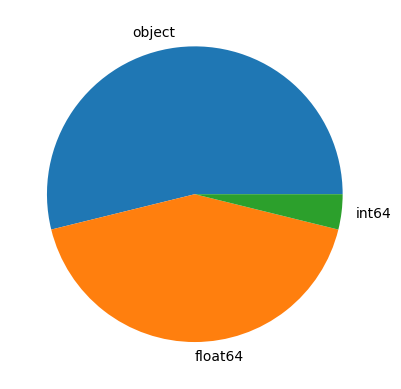

In [ ]:
df.dtypes.value_counts().plot.pie()

<Axes: >

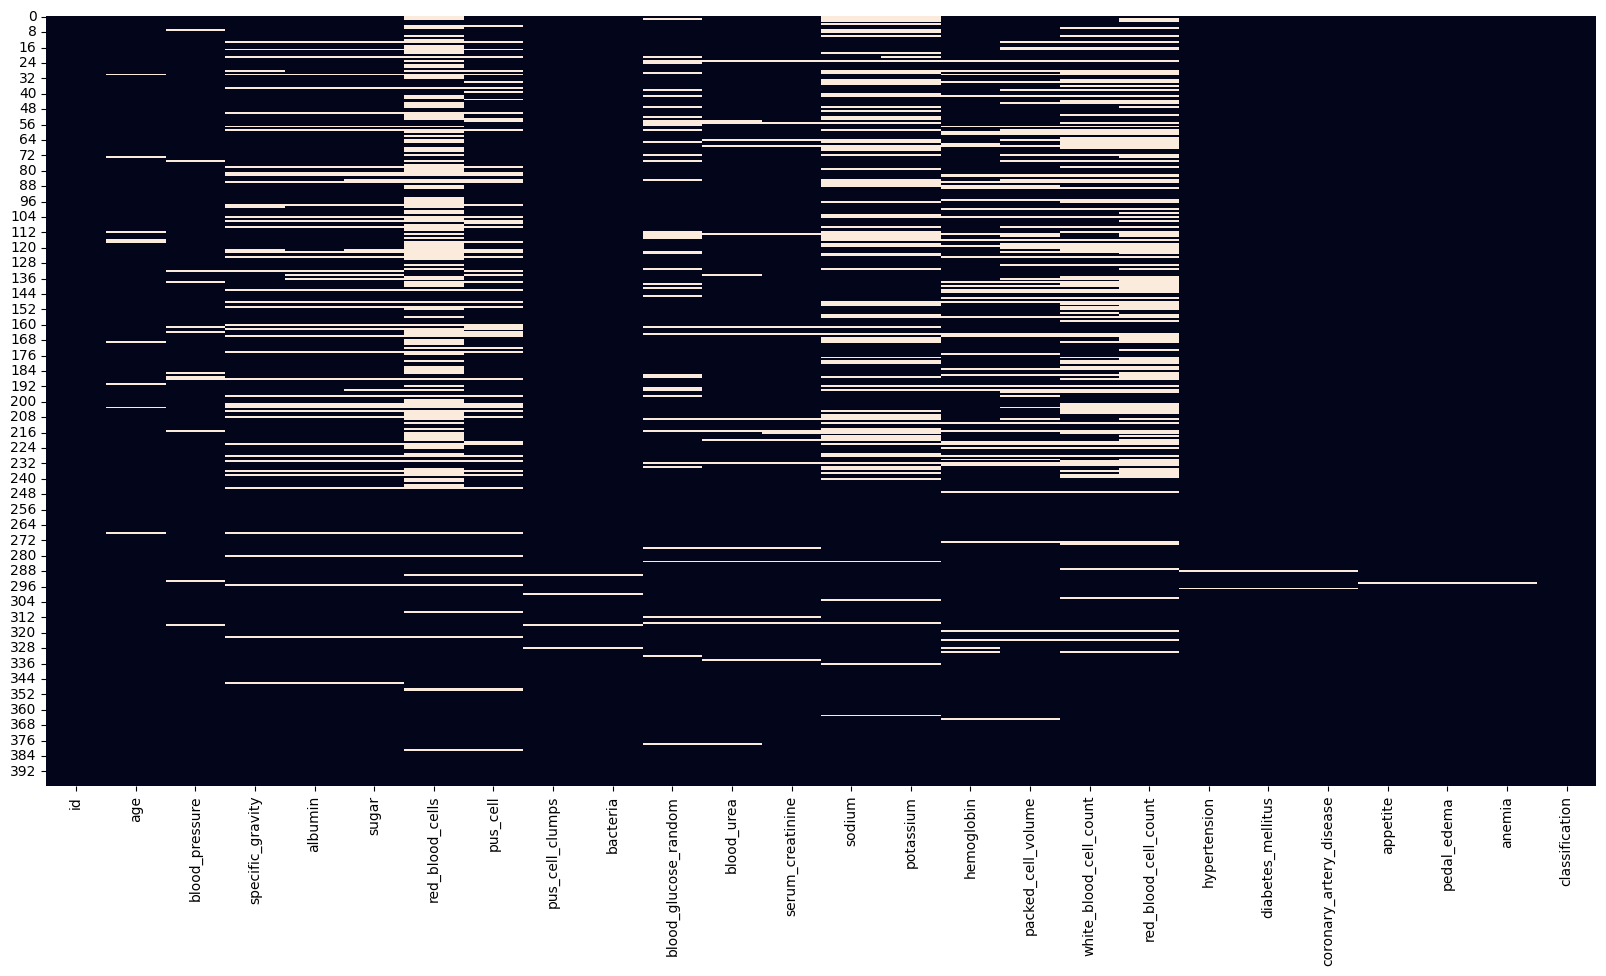

In [14]:
# # Checking missing values
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [15]:
# Checking missing values
df.isnull().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       130
white_blood_cell_count     105
potassium                   88
sodium                      87
packed_cell_volume          70
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
anemia                       1
appetite                     1
pedal_edema                  1
id                           0
classification               0
dtype: int64

In [16]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

red_blood_cells            0.3800
red_blood_cell_count       0.3250
white_blood_cell_count     0.2625
potassium                  0.2200
sodium                     0.2175
packed_cell_volume         0.1750
pus_cell                   0.1625
hemoglobin                 0.1300
sugar                      0.1225
specific_gravity           0.1175
albumin                    0.1150
blood_glucose_random       0.1100
blood_urea                 0.0475
serum_creatinine           0.0425
blood_pressure             0.0300
age                        0.0225
bacteria                   0.0100
pus_cell_clumps            0.0100
hypertension               0.0050
diabetes_mellitus          0.0050
coronary_artery_disease    0.0050
anemia                     0.0025
appetite                   0.0025
pedal_edema                0.0025
id                         0.0000
classification             0.0000
dtype: float64

In [17]:
# Check detailed info for each feature
listItem = []
for col in df.columns :
#for col in num_cols :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'missing value', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

dataFeatures dataType  missing value  nullPct  unique  \
0                        id    int64              0     0.00     400   
1                       age  float64              9     2.25      76   
2            blood_pressure  float64             12     3.00      10   
3          specific_gravity  float64             47    11.75       5   
4                   albumin  float64             46    11.50       6   
5                     sugar  float64             49    12.25       6   
6           red_blood_cells   object            152    38.00       2   
7                  pus_cell   object             65    16.25       2   
8           pus_cell_clumps   object              4     1.00       2   
9                  bacteria   object              4     1.00       2   
10     blood_glucose_random  float64             44    11.00     146   
11               blood_urea  float64             19     4.75     118   
12         serum_creatinine  float64             17     4.25      84   
13                   sodium  float64             87    21.75      34   
14                potassium  float64             88    22.00      40   
15               hemoglobin  float64             52    13.00     115   
16       packed_cell_volume   object             70    17.50      44   
17   white_blood_cell_count   object            105    26.25      92   
18     red_blood_cell_count   object            130    32.50      49   
19             hypertension   object              2     0.50       2   
20        diabetes_mellitus   object              2     0.50       5   
21  coronary_artery_disease   object              2     0.50       3   
22                 appetite   object              1     0.25       2   
23              pedal_edema   object              1     0.25       2   
24                   anemia   object              1     0.25       2   
25           classification   object              0     0.00       3   

             uniqueSample  
0                [7, 262]  
1            [33.0, 83.0]  
2            [180.0, nan]  
3             [1.02, nan]  
4              [0.0, 2.0]  
5              [1.0, 3.0]  
6           [nan, normal]  
7         [nan, abnormal]  
8       [nan, notpresent]  
9   [notpresent, present]  
10         [297.0, 156.0]  
11           [98.0, 41.0]  
12            [5.6, 12.0]  
13         [134.0, 132.0]  
14             [5.6, 4.5]  
15           [12.6, 16.4]  
16               [50, 44]  
17          [9400, 26400]  
18             [5.4, 5.9]  
19              [nan, no]  
20             [no, \tno]  
21            [nan, \tno]  
22           [good, poor]  
23              [yes, no]  
24              [nan, no]  
25           [ckd, ckd\t]

-**Analyse du Fond**

In [18]:

#classification or reclassification of variables according to type or function:
# view on https://www.kaggle.com/code/ozlemilgun/the-prediction-of-titanic-passengers-survival

def grab_col_names(dataframe, cat_th=5, car_th=20):
    """
    This function to perform the selection of numeric and categorical variables in the data set in a parametric way.
    Note: Variables with numeric data type but with categorical properties are included in categorical variables.

    Parameters
    ----------
    dataframe: dataframe
        The data set in which Variable types need to be parsed
    cat_th: int, optional
        The threshold value for number of distinct observations in numerical variables with categorical properties.
        cat_th is used to specify that if number of distinct observations in numerical variable is less than
        cat_th, this variables can be categorized as a categorical variable.

    car_th: int, optional
        The threshold value for categorical variables with  a wide range of cardinality.
        If the number of distinct observations in a categorical variables is greater than car_th, this
        variable can be categorized as a categorical variable.

    Returns
    -------
        cat_cols: list
            List of categorical variables.
        num_cols: list
            List of numerical variables.
        cat_but_car: list
            List of categorical variables with  a wide range of cardinality.

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))

    Notes
    ------
        Sum of elements in lists the cat_cols,num_cols  and  cat_but_car give the total number of variables in dataframe.
    """

    # cat cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and
                   dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and
                   dataframe[col].nunique() > car_th]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" and "ID" not in col.upper()]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    return cat_cols,num_cols,cat_but_car


In [19]:
grab_col_names(df)

(['red_blood_cells',
  'pus_cell',
  'pus_cell_clumps',
  'bacteria',
  'hypertension',
  'diabetes_mellitus',
  'coronary_artery_disease',
  'appetite',
  'pedal_edema',
  'anemia',
  'classification'],
 ['age',
  'blood_pressure',
  'specific_gravity',
  'albumin',
  'sugar',
  'blood_glucose_random',
  'blood_urea',
  'serum_creatinine',
  'sodium',
  'potassium',
  'hemoglobin'],
 ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count'])

In [20]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Correction des variables appartenant à  cat_but_car (Liste de variables catégorielles avec un large éventail de cardinalité).

In [21]:
df['packed_cell_volume'].unique()

array(['44', '38', '31', '32', '35', '39', '36', '33', '29', '28', nan,
       '16', '24', '37', '30', '34', '40', '45', '27', '48', '\t?', '52',
       '14', '22', '18', '42', '17', '46', '23', '19', '25', '41', '26',
       '15', '21', '43', '20', '\t43', '47', '9', '49', '50', '53', '51',
       '54'], dtype=object)

In [22]:
df['packed_cell_volume'].replace(to_replace = {'\t43':'43','\t?':np.NaN},inplace=True)

In [23]:
df['white_blood_cell_count'].unique()

array(['7800', '6000', '7500', '6700', '7300', nan, '6900', '9600',
       '12100', '4500', '12200', '11000', '3800', '11400', '5300', '9200',
       '6200', '8300', '8400', '10300', '9800', '9100', '7900', '6400',
       '8600', '18900', '21600', '4300', '8500', '11300', '7200', '7700',
       '14600', '6300', '\t6200', '7100', '11800', '9400', '5500', '5800',
       '13200', '12500', '5600', '7000', '11900', '10400', '10700',
       '12700', '6800', '6500', '13600', '10200', '9000', '14900', '8200',
       '15200', '5000', '16300', '12400', '\t8400', '10500', '4200',
       '4700', '10900', '8100', '9500', '2200', '12800', '11200', '19100',
       '\t?', '12300', '16700', '2600', '26400', '8800', '7400', '4900',
       '8000', '12000', '15700', '4100', '5700', '11500', '5400', '10800',
       '9900', '5200', '5900', '9300', '9700', '5100', '6600'],
      dtype=object)

In [24]:
df['white_blood_cell_count'].replace(to_replace = {'\t6200':'6200','\t8400':'8400','\t?':np.NaN},inplace=True)


In [ ]:
df['red_blood_cell_count'].unique()

array(['5.2', nan, '3.9', '4.6', '4.4', '5', '4.0', '3.7', '3.8', '3.4',
       '2.6', '2.8', '4.3', '3.2', '3.6', '4', '4.1', '4.9', '2.5', '4.2',
       '4.5', '3.1', '4.7', '3.5', '6.0', '5.0', '2.1', '5.6', '2.3',
       '2.9', '2.7', '8.0', '3.3', '3.0', '3', '2.4', '4.8', '\t?', '5.4',
       '6.1', '6.2', '6.3', '5.1', '5.8', '5.5', '5.3', '6.4', '5.7',
       '5.9', '6.5'], dtype=object)

In [25]:
df['red_blood_cell_count'].replace(to_replace = {'\t?':np.NaN},inplace=True)

In [26]:
# Change to Numerical Dtyp
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

Correction des variables appartenant à  cat_cols (Liste de variables catégorielles)

In [27]:
for col in cat_cols:
    print(f'{col :-<50} {df[col].unique()}')

red_blood_cells----------------------------------- [nan 'normal' 'abnormal']
pus_cell------------------------------------------ ['normal' 'abnormal' nan]
pus_cell_clumps----------------------------------- ['notpresent' 'present' nan]
bacteria------------------------------------------ ['notpresent' 'present' nan]
hypertension-------------------------------------- ['yes' 'no' nan]
diabetes_mellitus--------------------------------- ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary_artery_disease--------------------------- ['no' 'yes' '\tno' nan]
appetite------------------------------------------ ['good' 'poor' nan]
pedal_edema--------------------------------------- ['no' 'yes' nan]
anemia-------------------------------------------- ['no' 'yes' nan]
classification------------------------------------ ['ckd' 'ckd\t' 'notckd']


In [28]:
## Replace incorrect values
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [29]:
# Drop id Column as it is seems to be an unique identifier for each row
df.drop(["id"],axis=1,inplace=True)

In [30]:
grab_col_names(df)

(['red_blood_cells',
  'pus_cell',
  'pus_cell_clumps',
  'bacteria',
  'hypertension',
  'diabetes_mellitus',
  'coronary_artery_disease',
  'appetite',
  'pedal_edema',
  'anemia',
  'classification'],
 ['age',
  'blood_pressure',
  'specific_gravity',
  'albumin',
  'sugar',
  'blood_glucose_random',
  'blood_urea',
  'serum_creatinine',
  'sodium',
  'potassium',
  'hemoglobin',
  'packed_cell_volume',
  'white_blood_cell_count',
  'red_blood_cell_count'],
 [])

In [31]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)


<ipython-input-32-5fe33098b428>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(i)


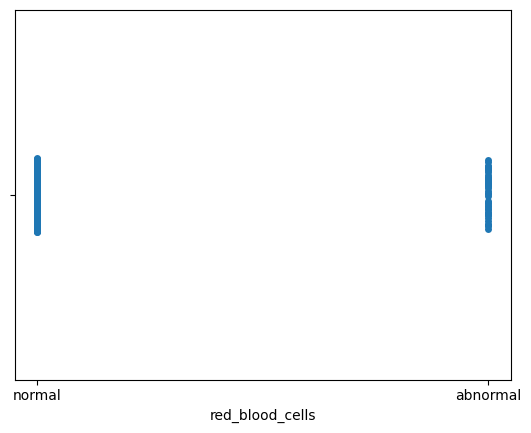

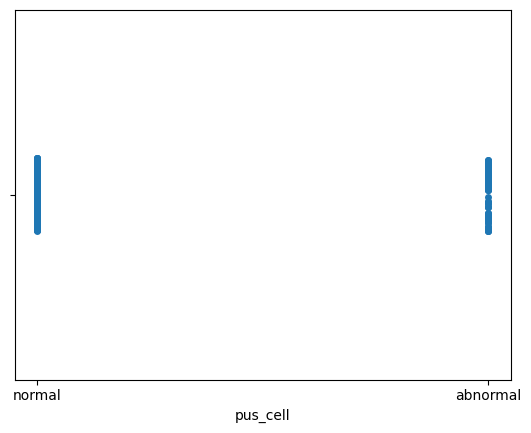

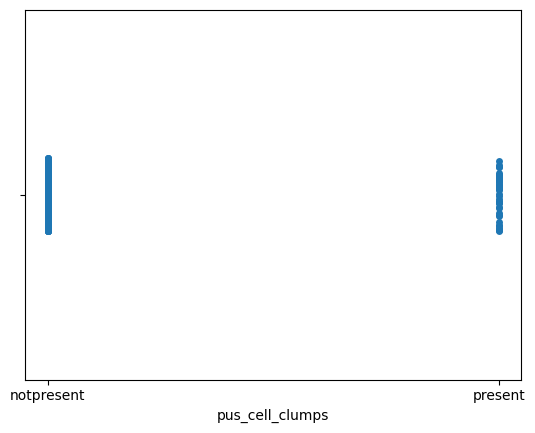

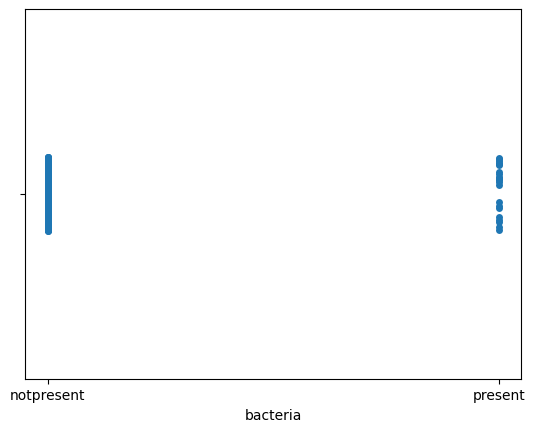

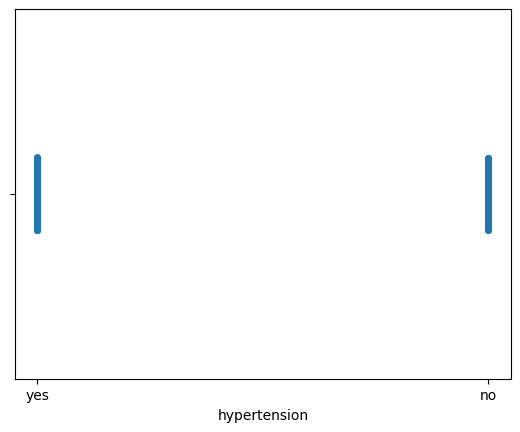

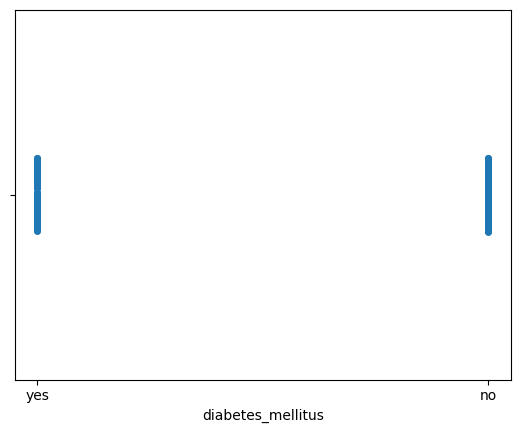

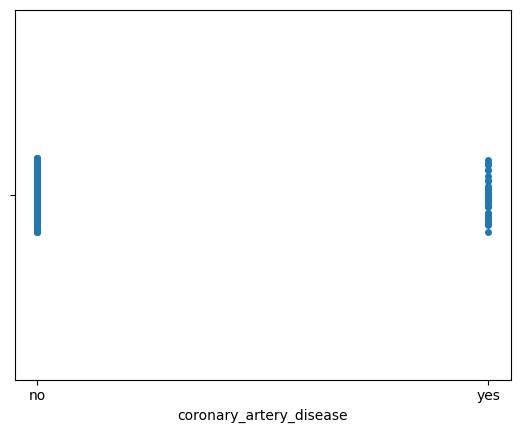

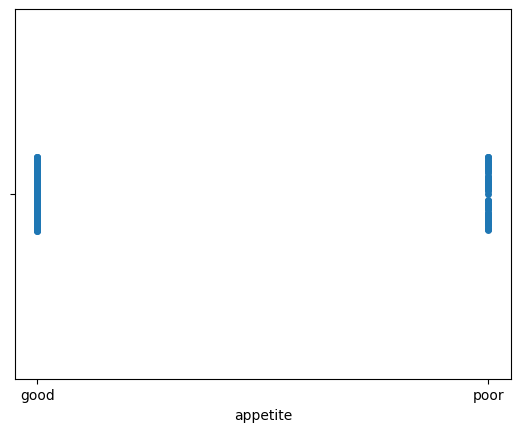

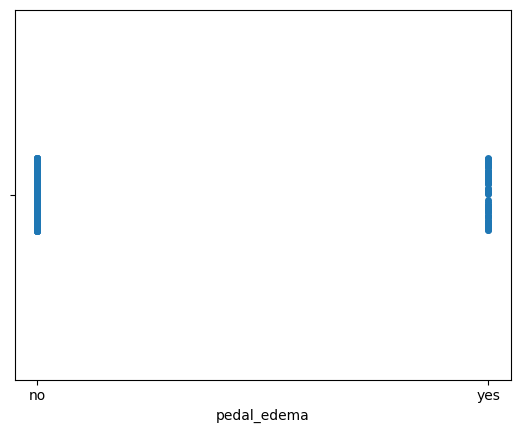

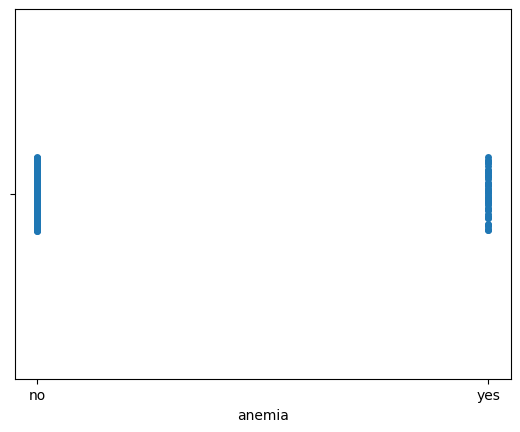

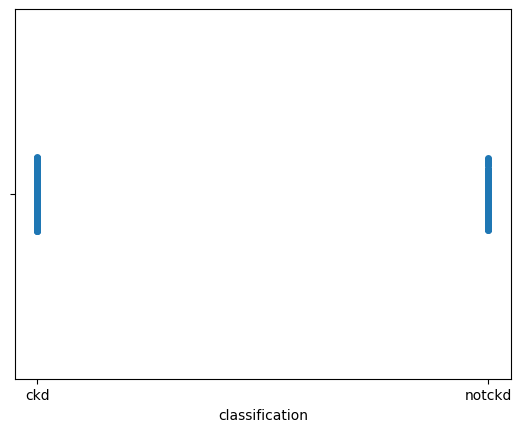

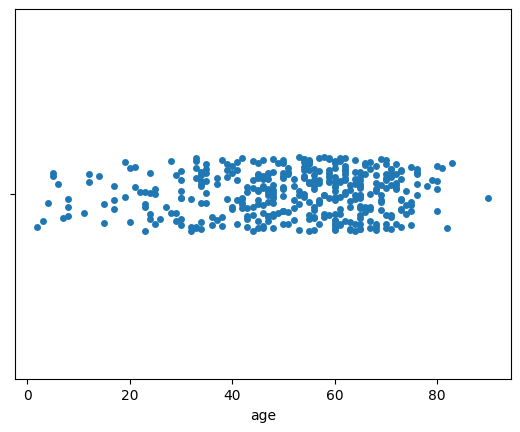

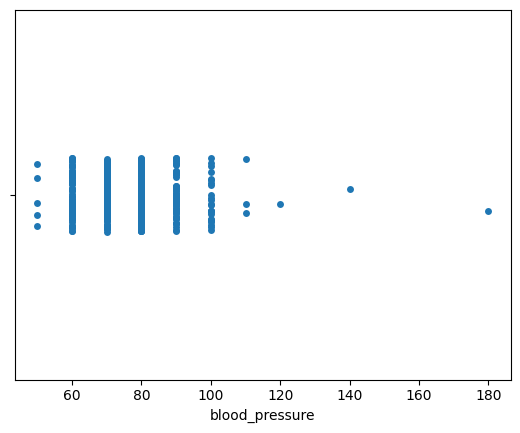

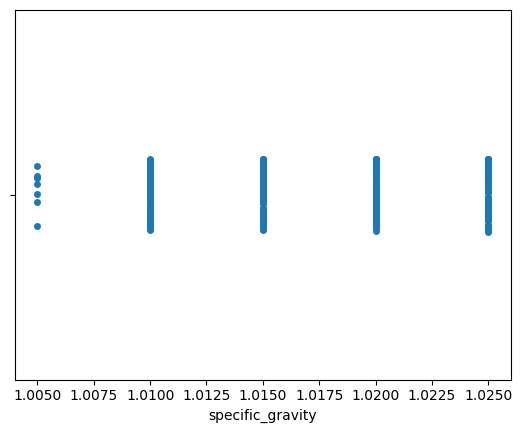

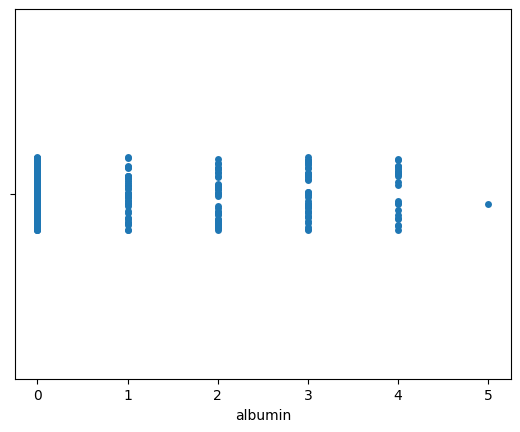

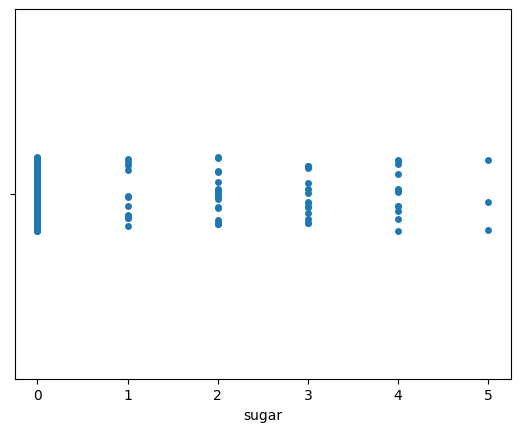

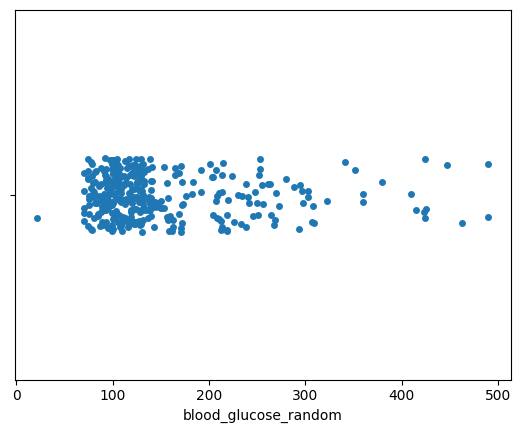

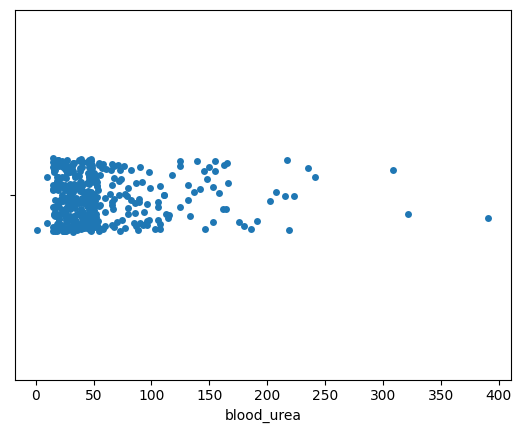

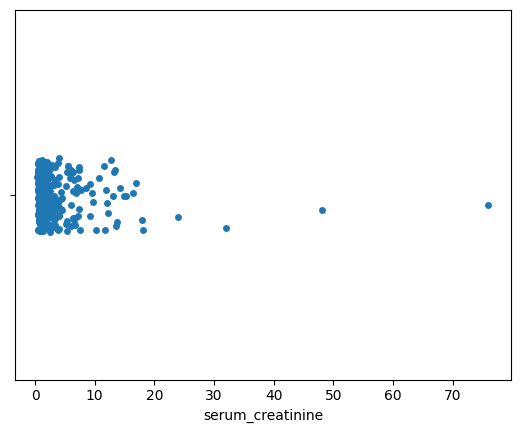

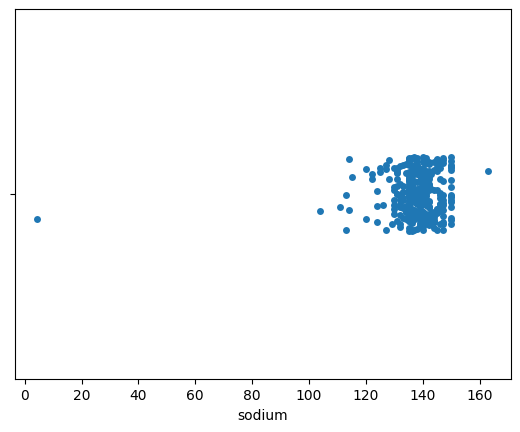

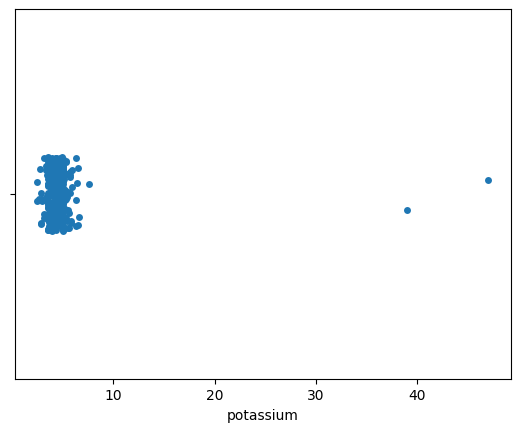

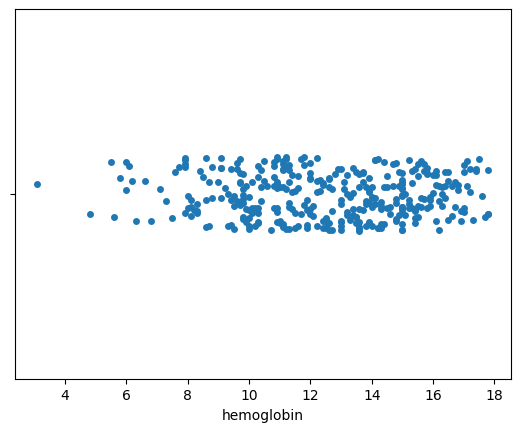

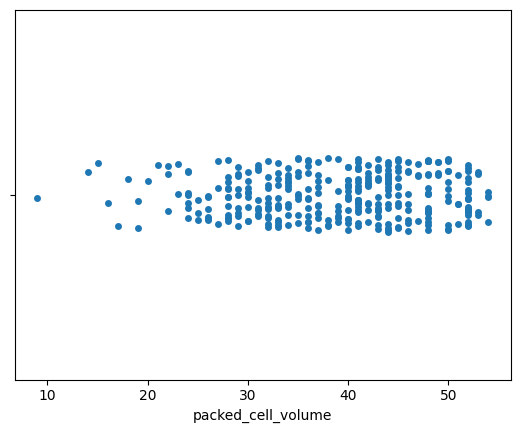

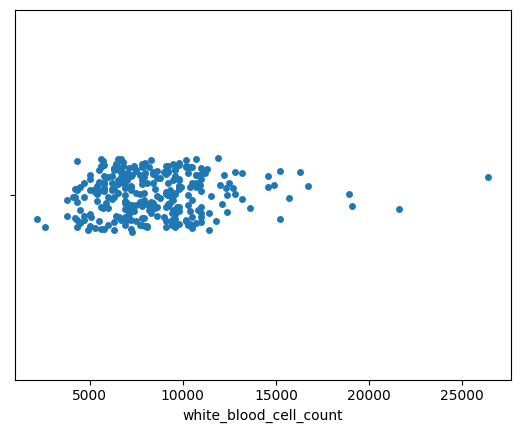

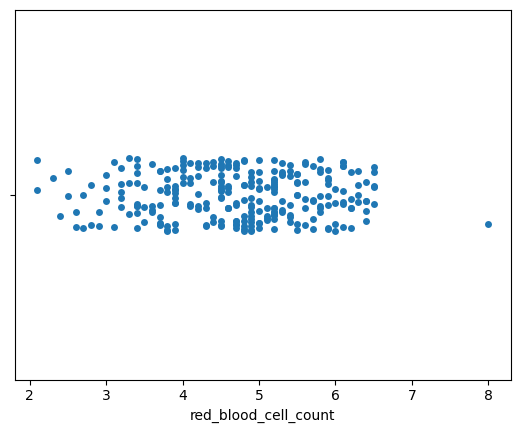

In [32]:

# represent all values on a pseudo point cloud. With striplot
for i, col in enumerate(cat_cols + num_cols ):
    plt.figure(i)
    sns.stripplot(x = col, data = df, jitter = True)

Data visialisation

In [ ]:
%%capture
# creating report
report = sv.analyze(df)


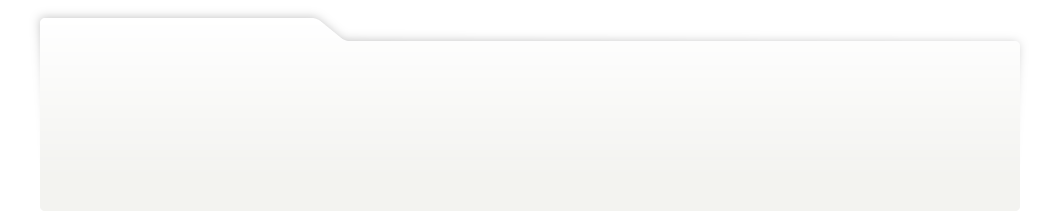
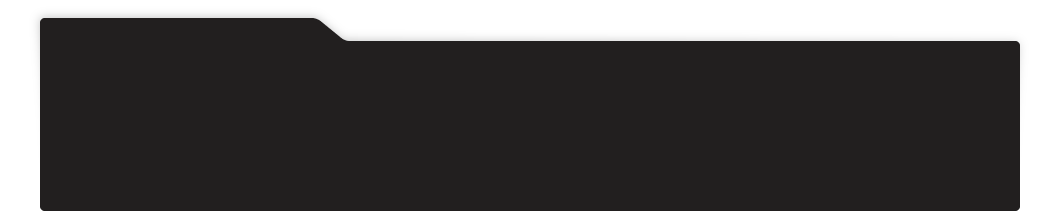
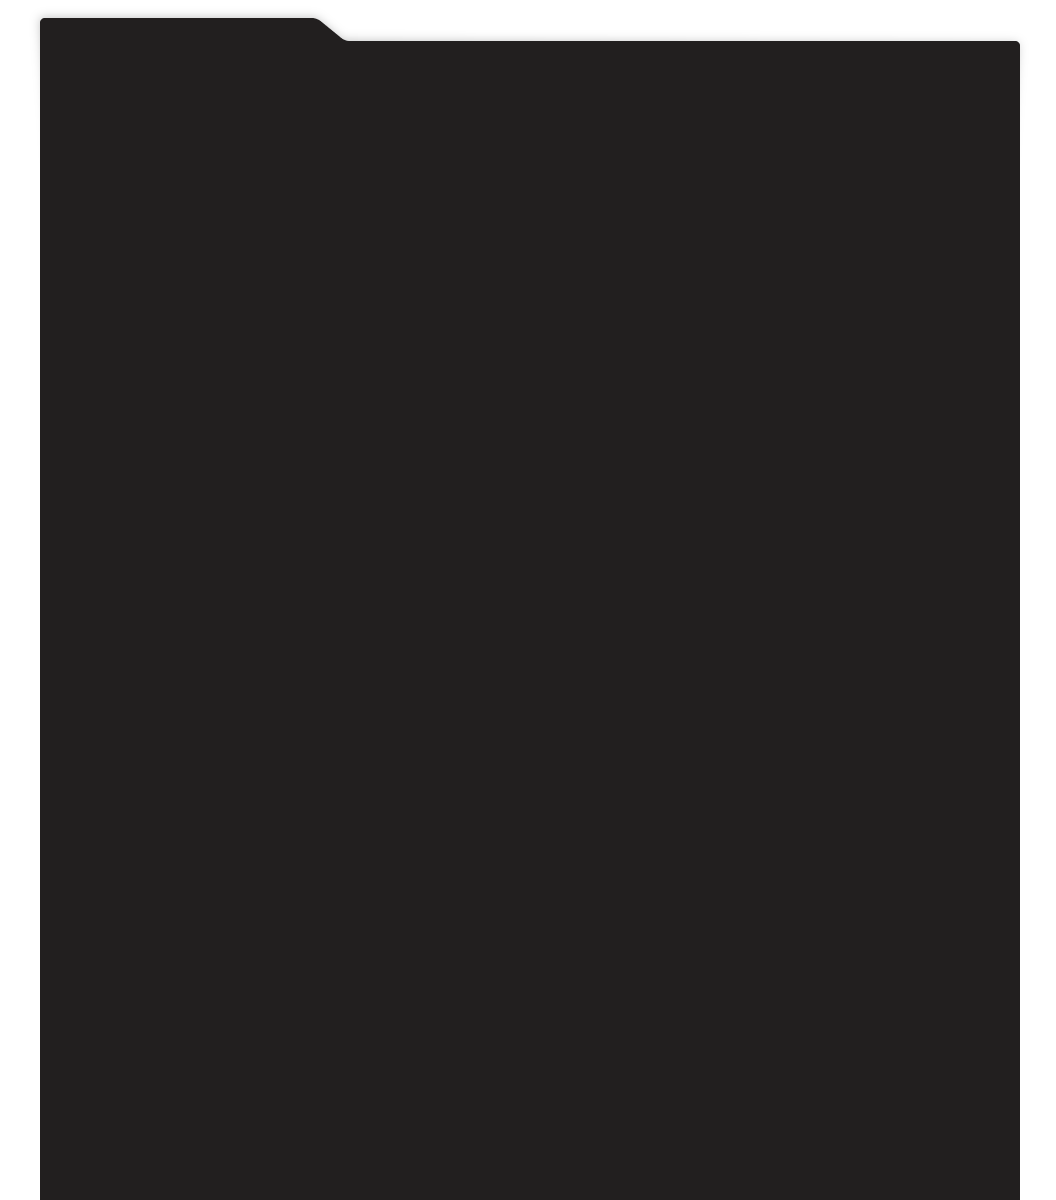
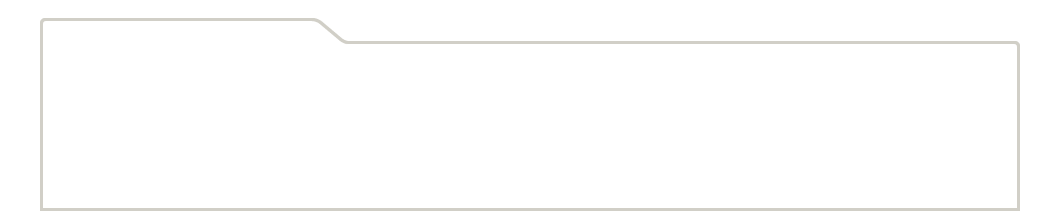
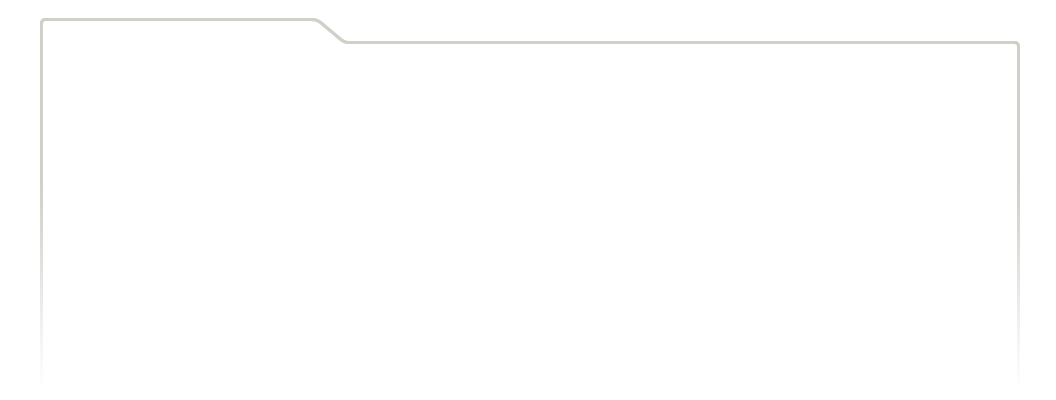
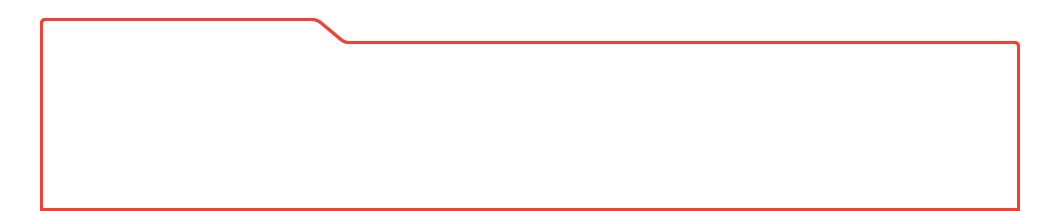
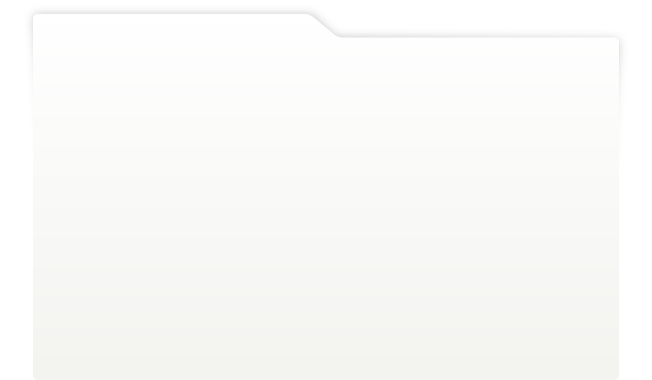
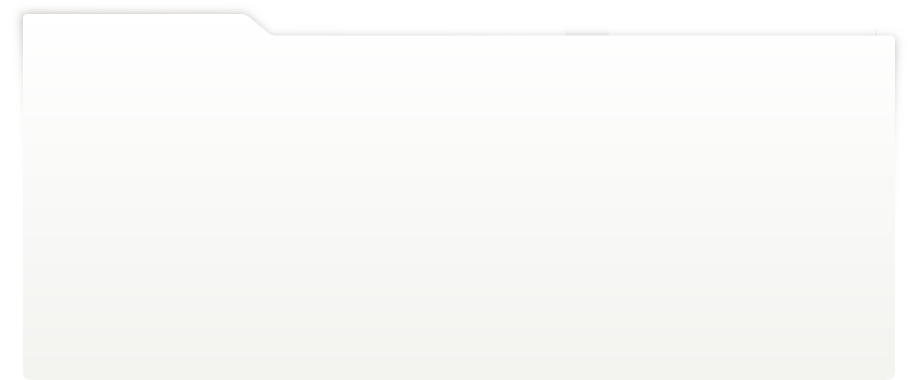
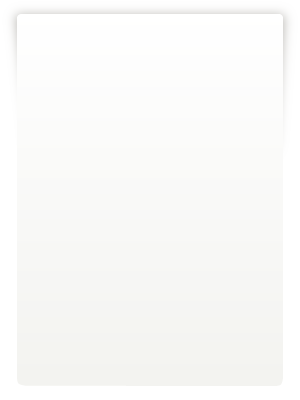
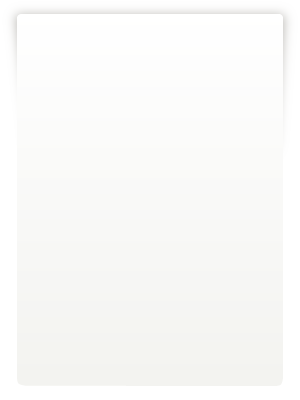
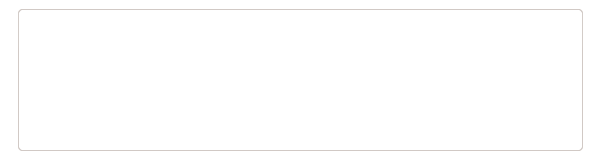
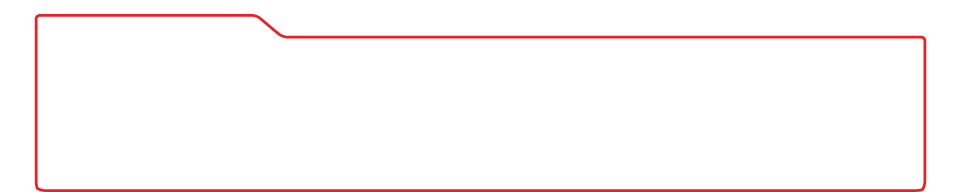
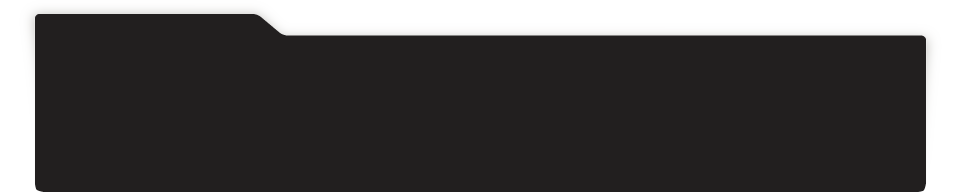
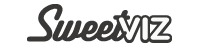
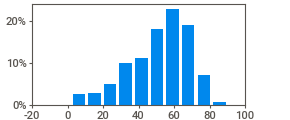
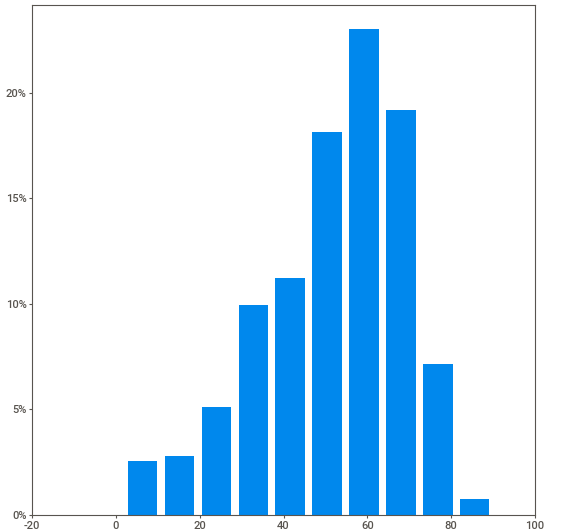
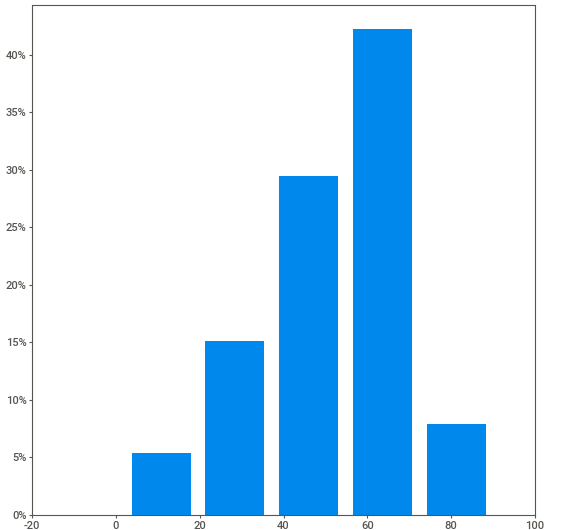
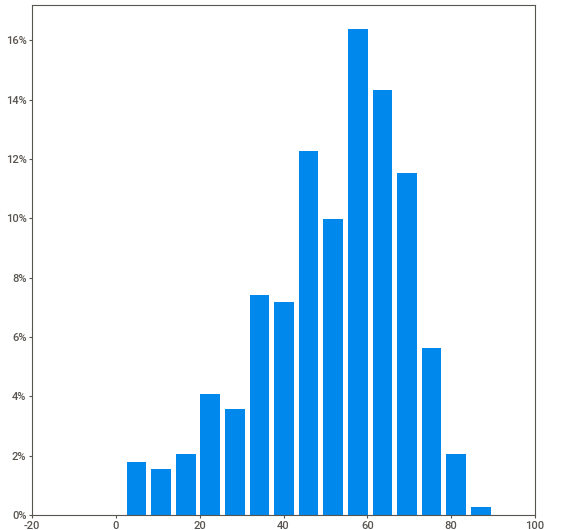
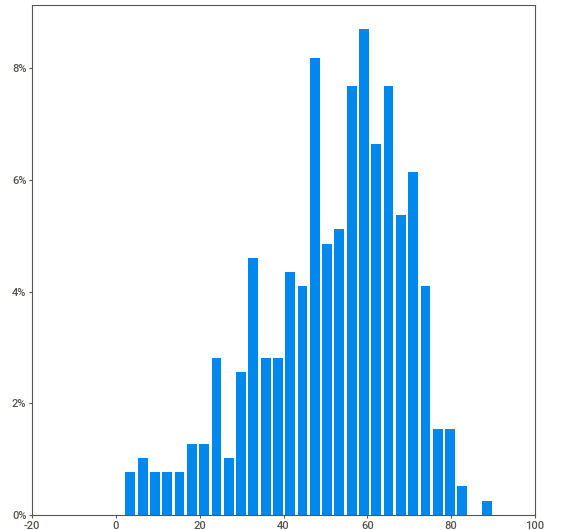
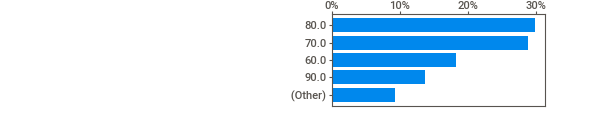
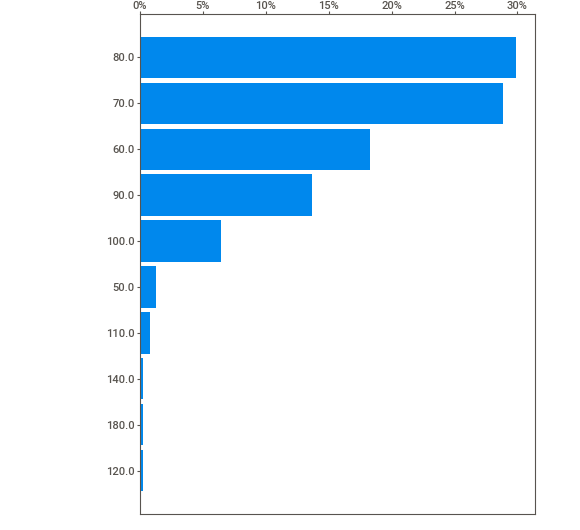
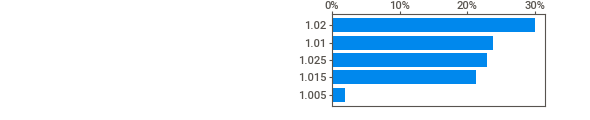
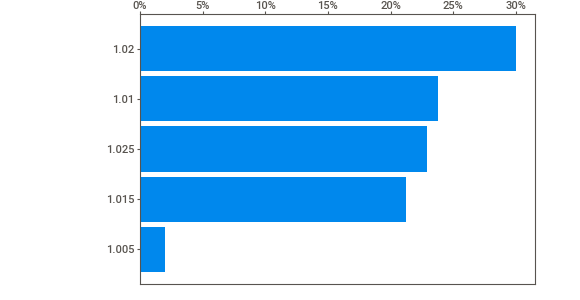
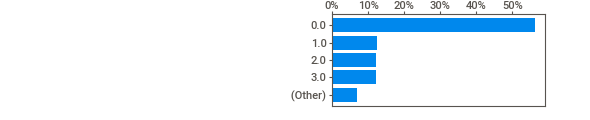
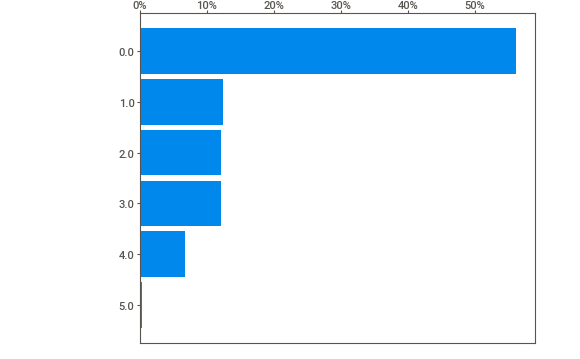
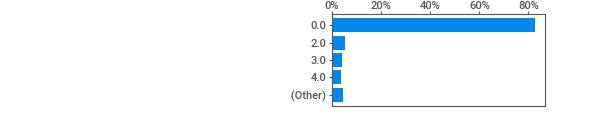
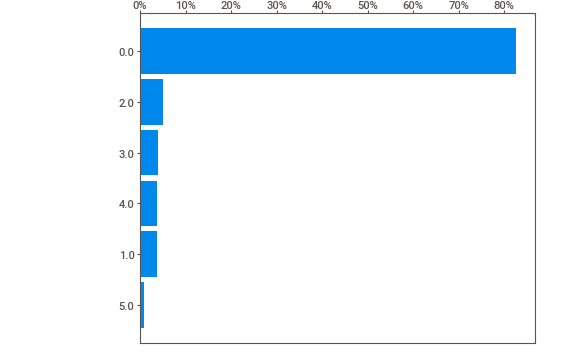
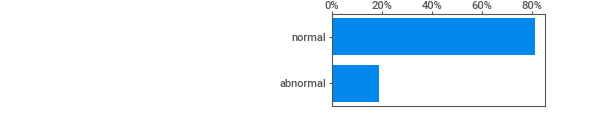
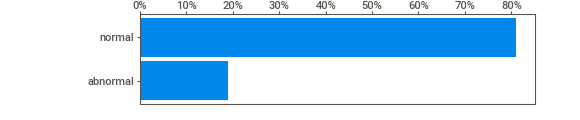
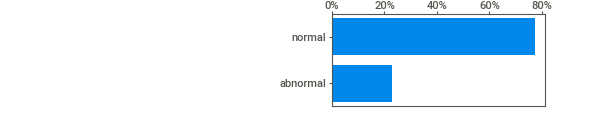
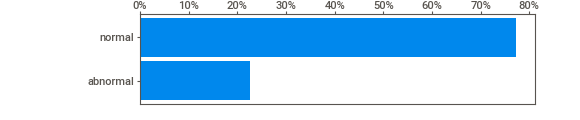
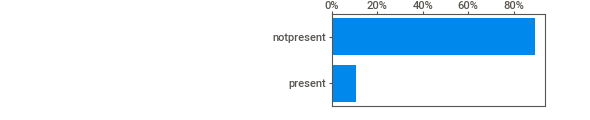
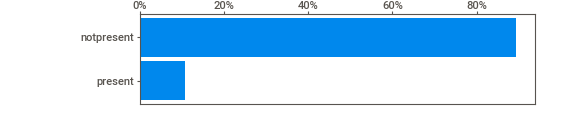
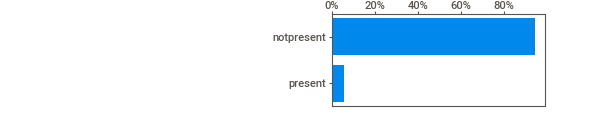
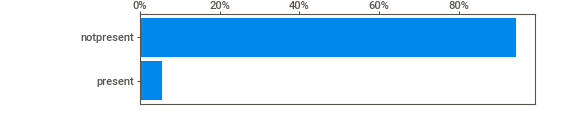
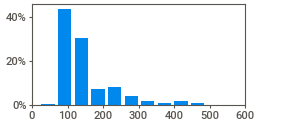
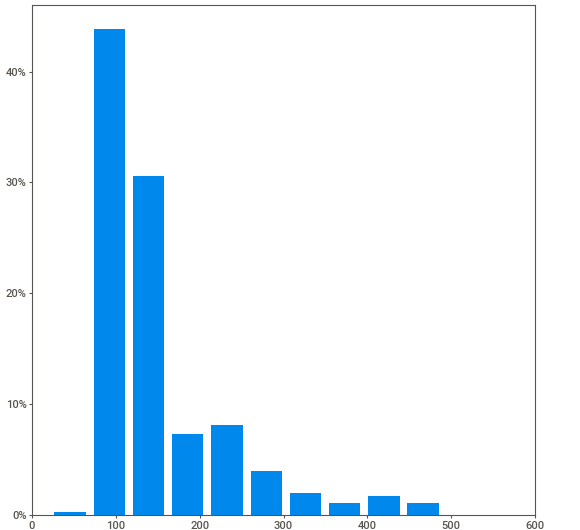
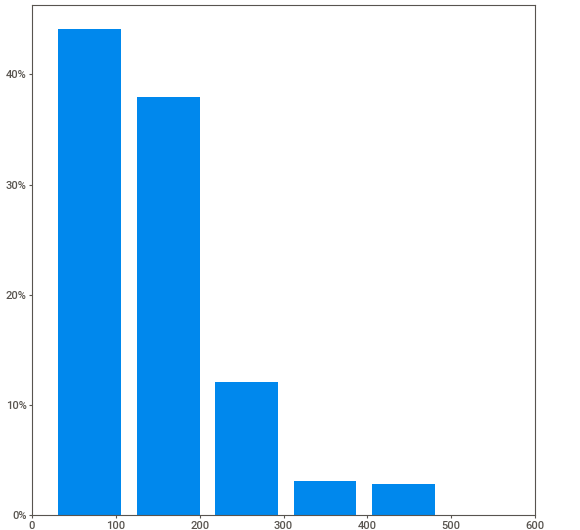
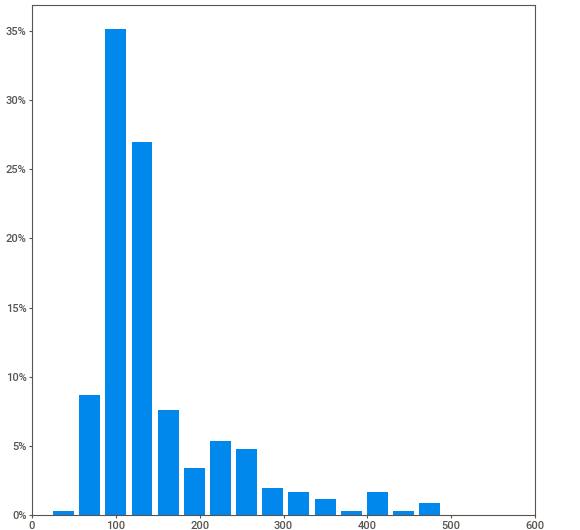
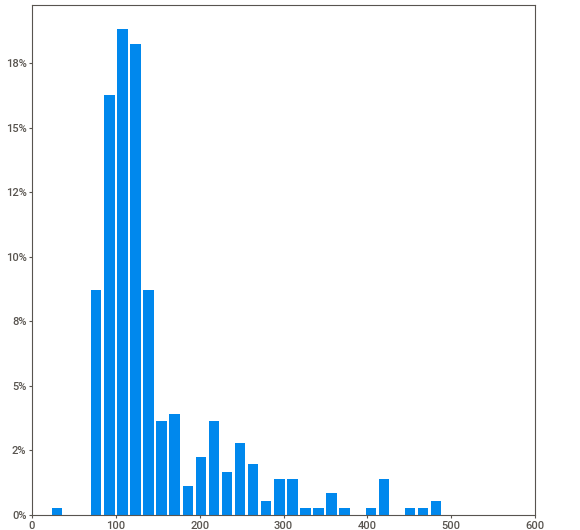
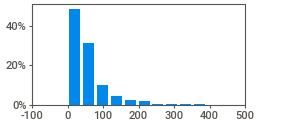
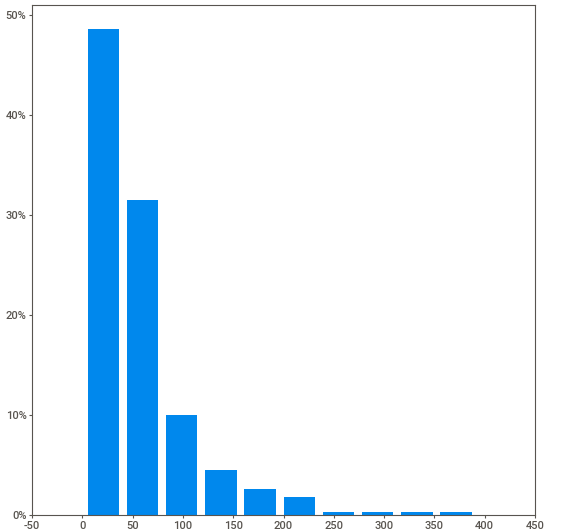
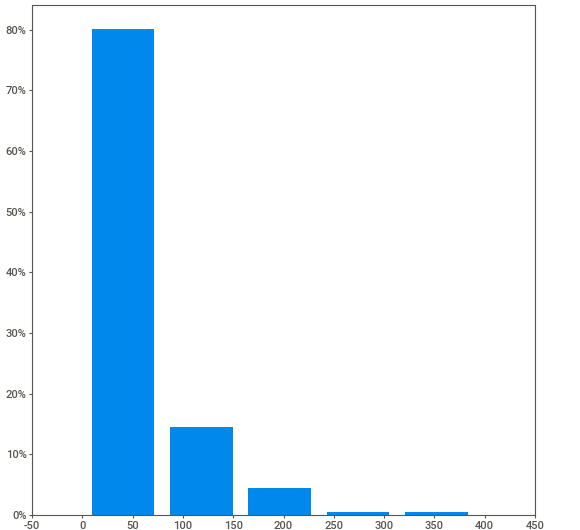
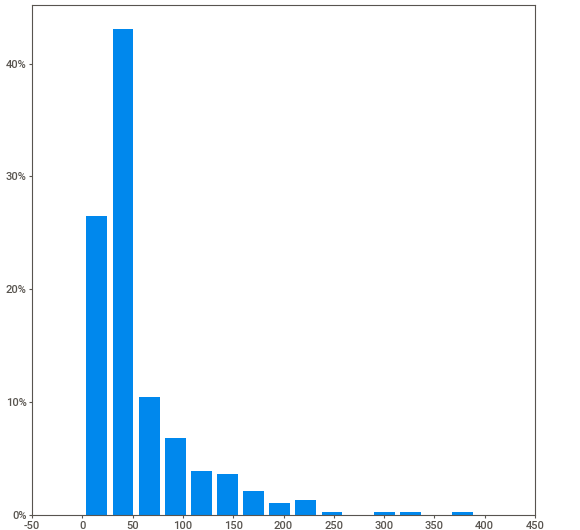
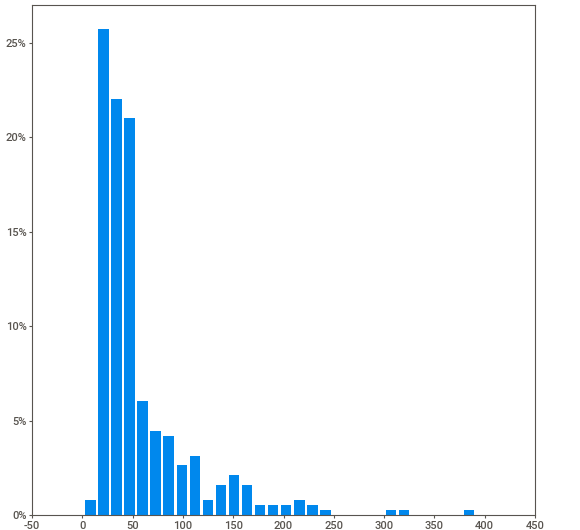
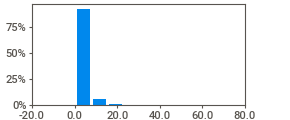
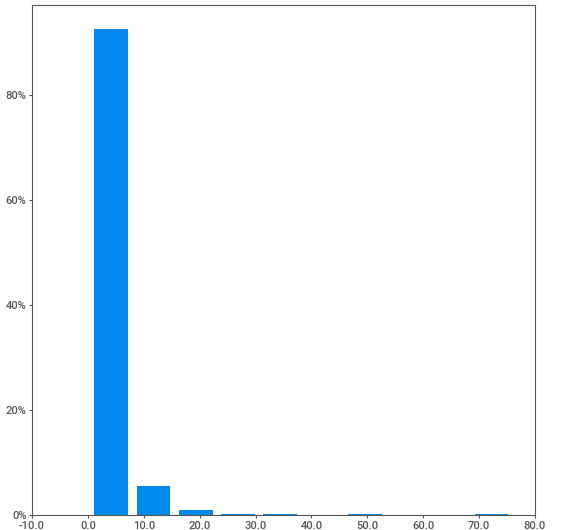
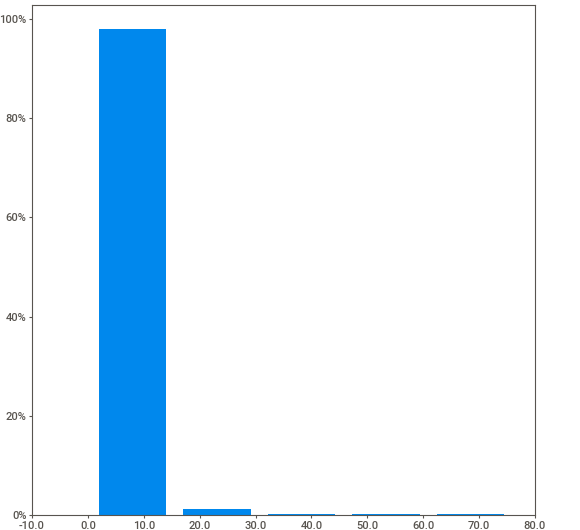
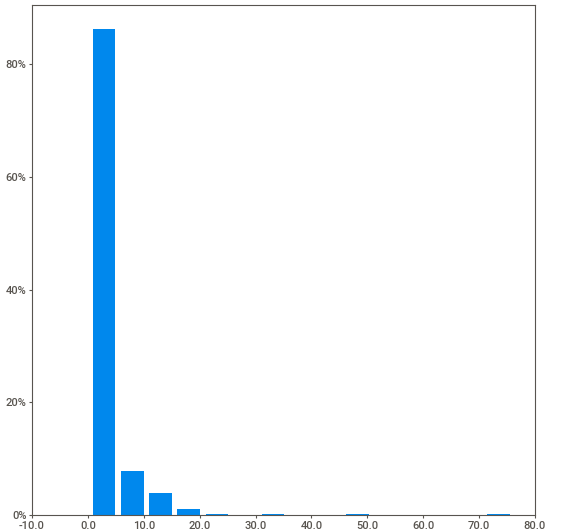
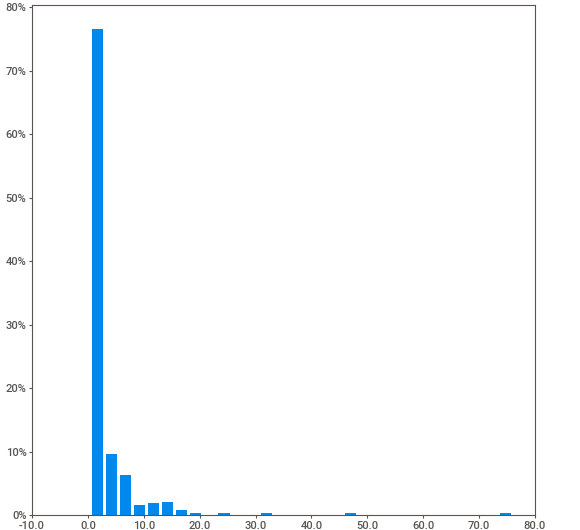
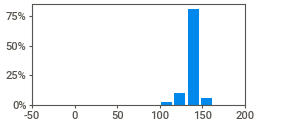
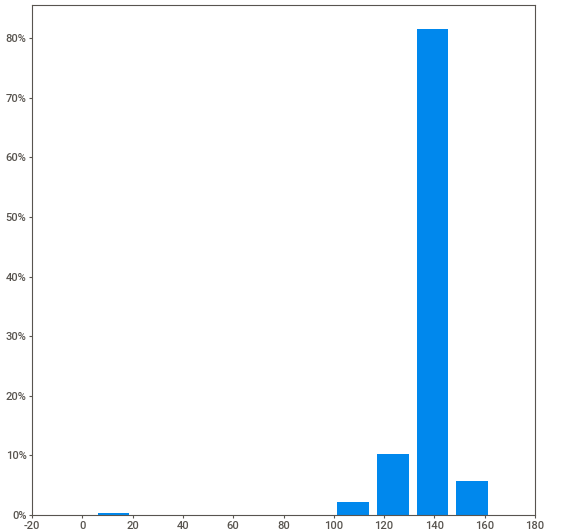
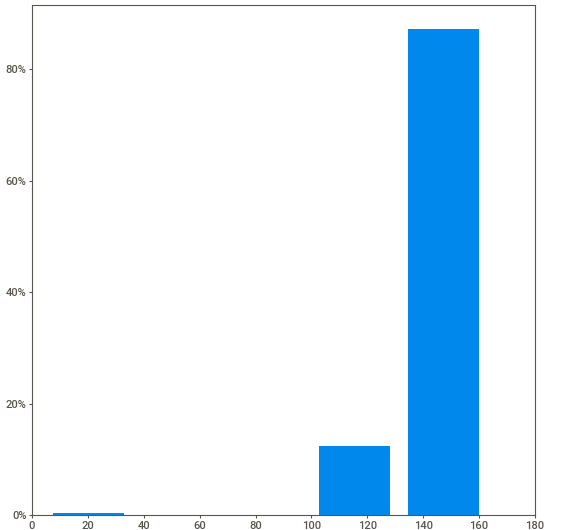
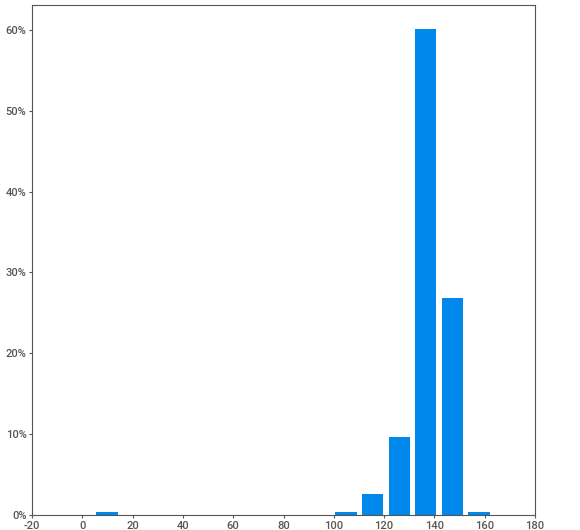
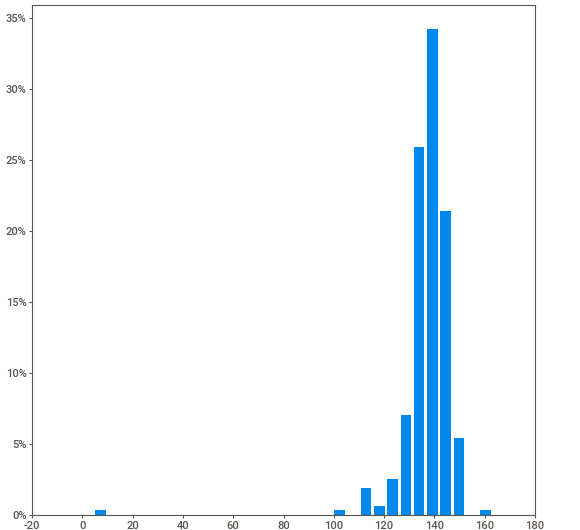
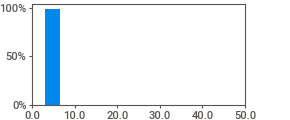
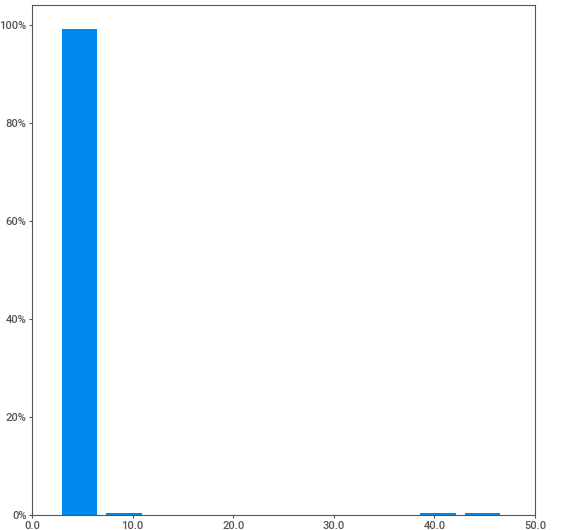
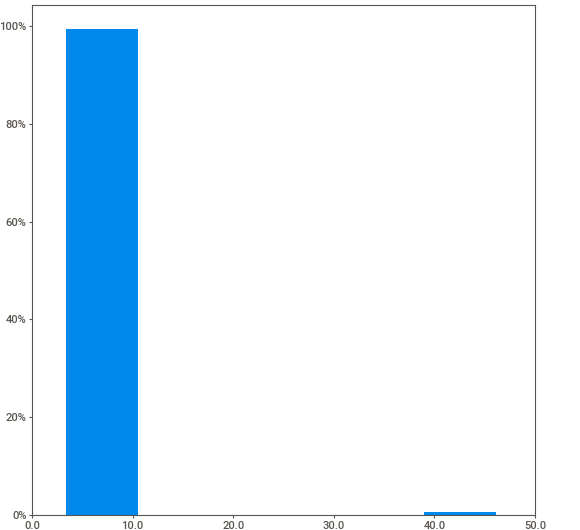
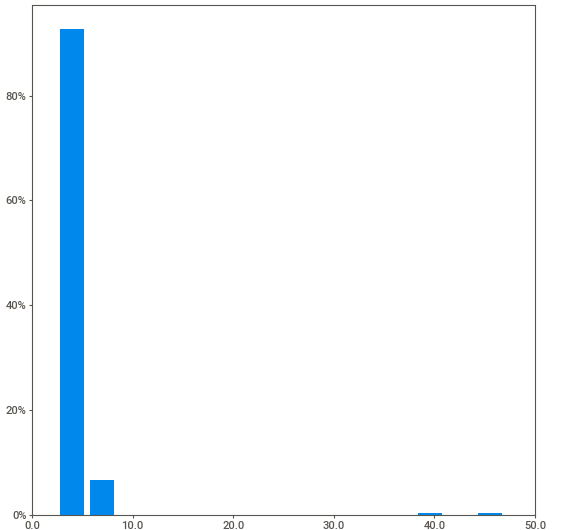
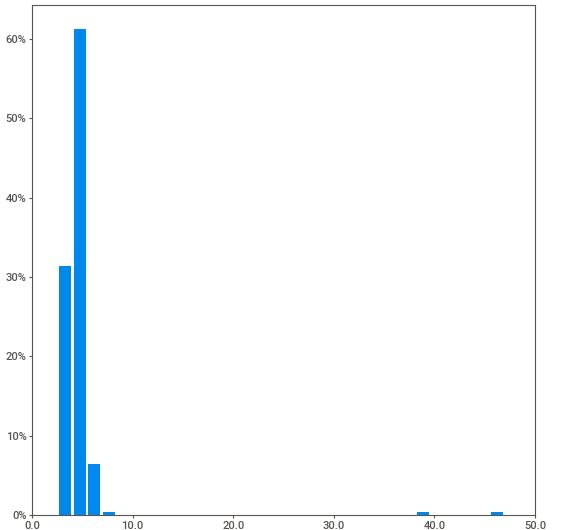
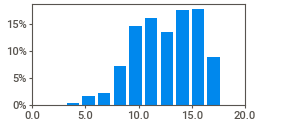
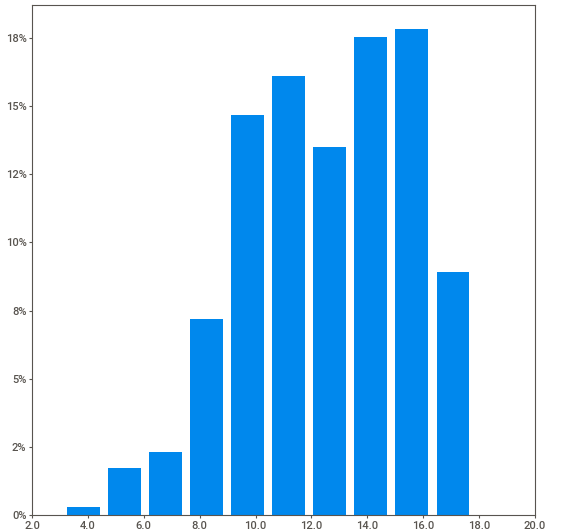
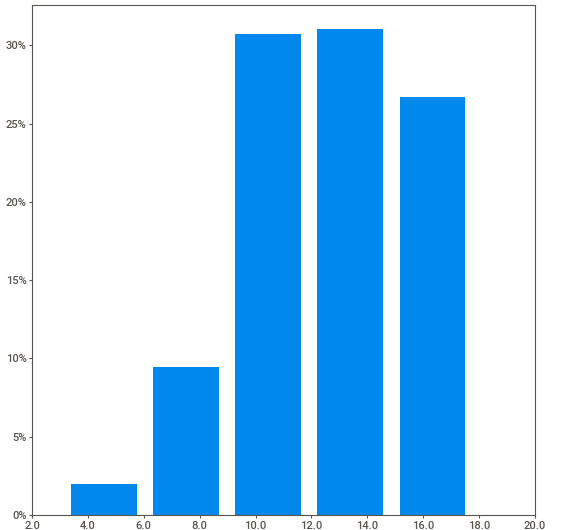
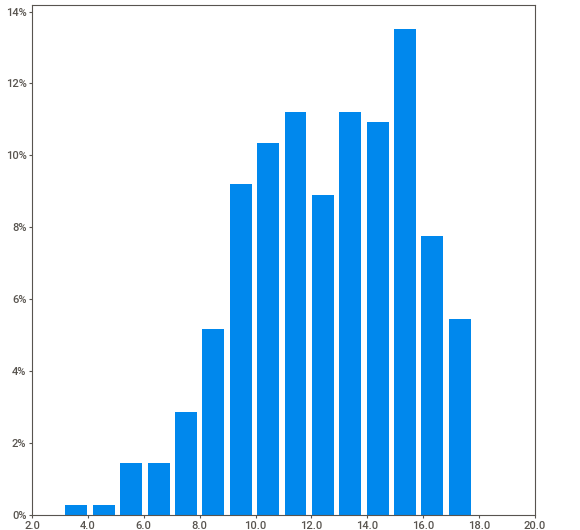
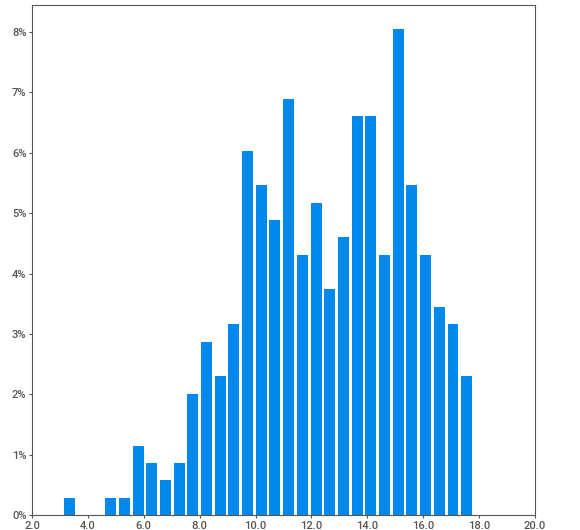
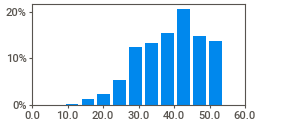
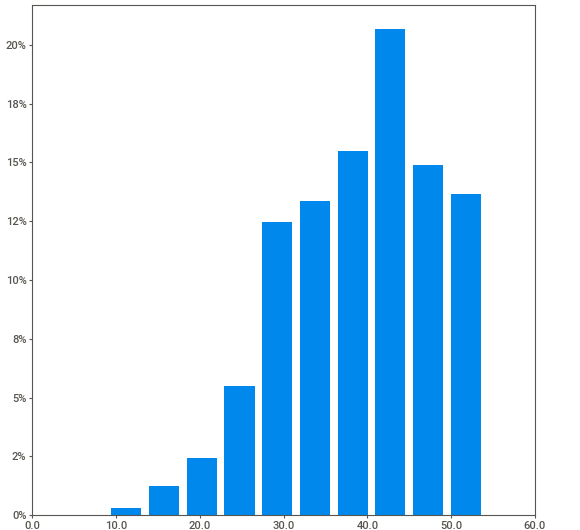
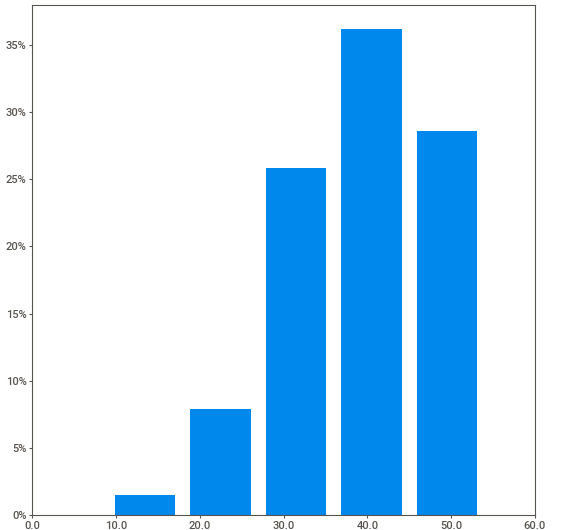
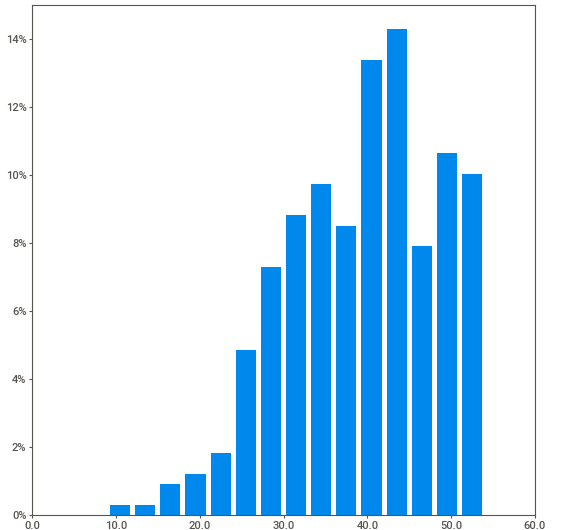
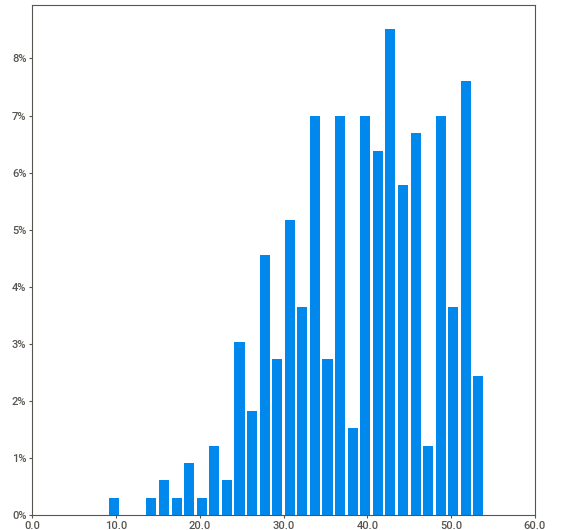
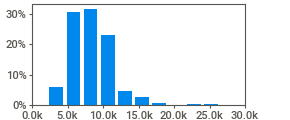
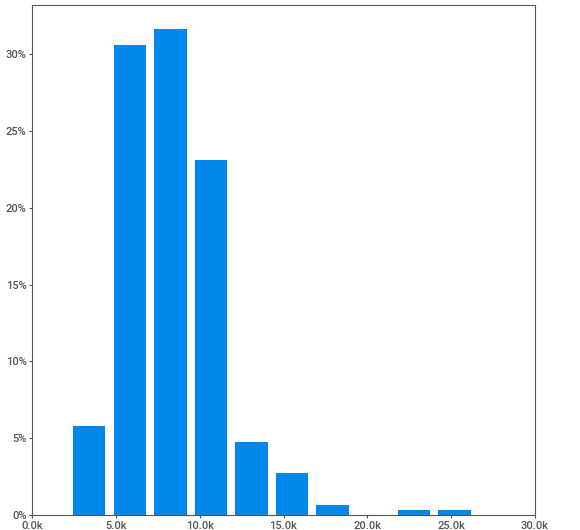
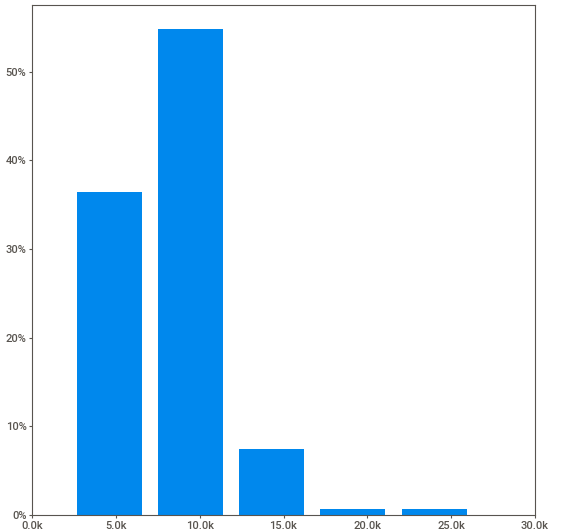
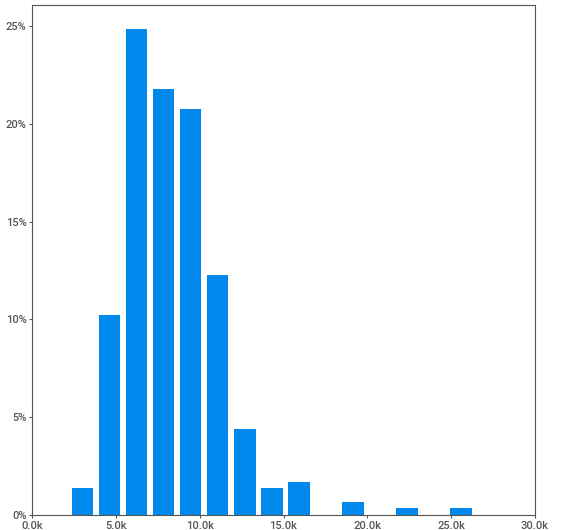
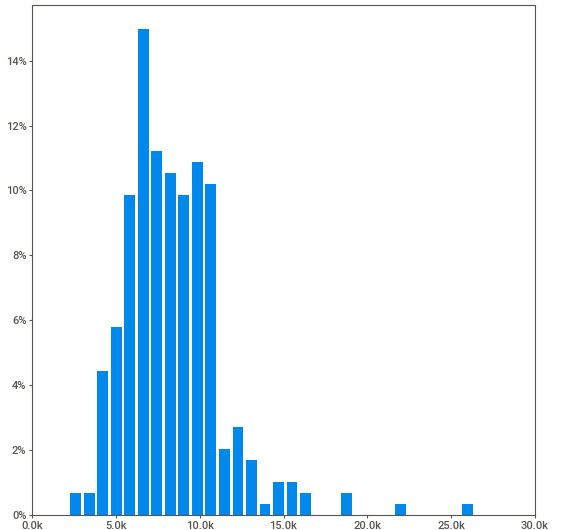
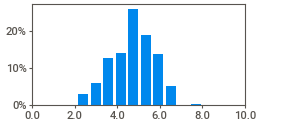
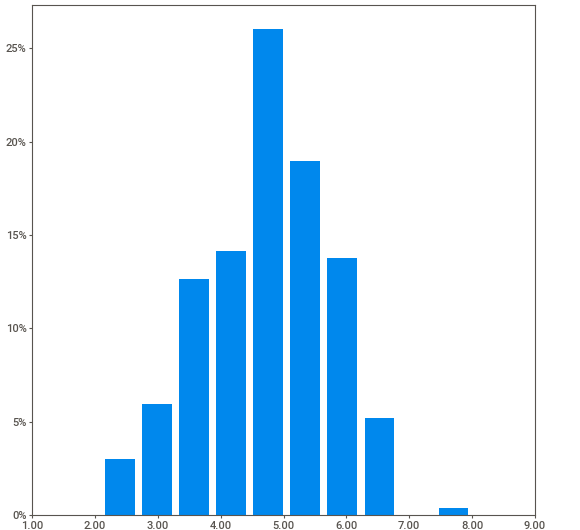
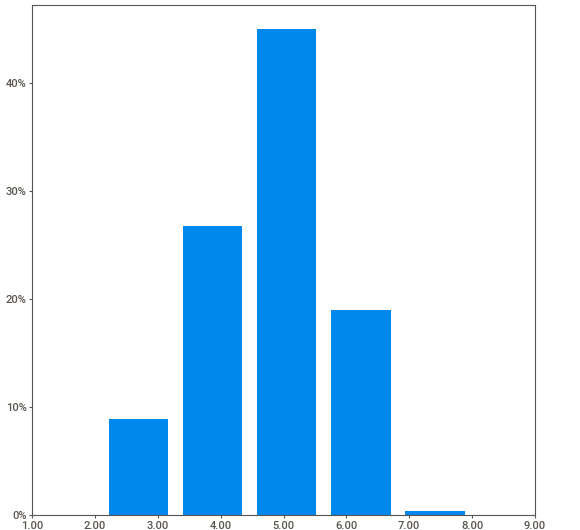
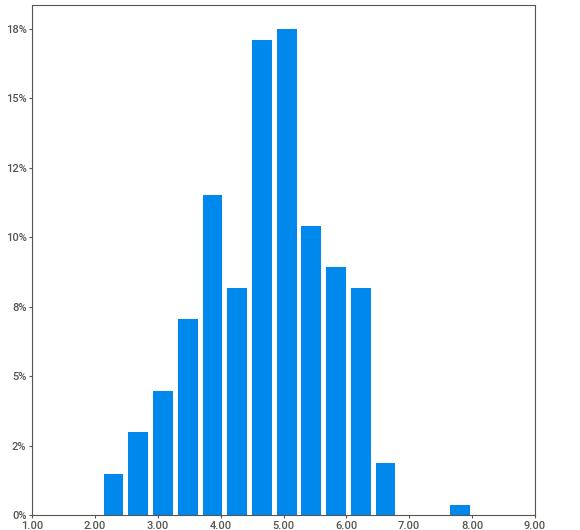
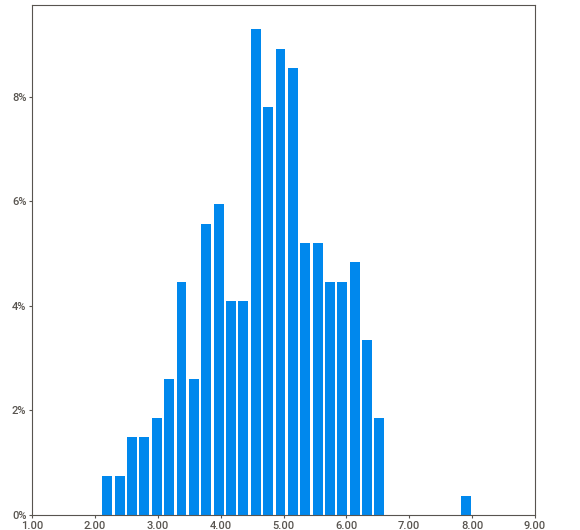
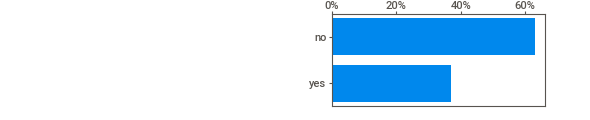
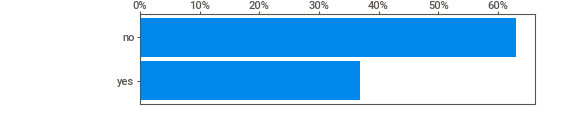
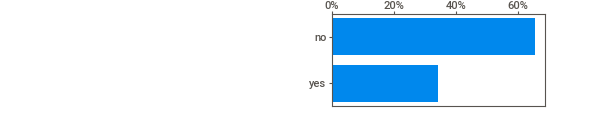
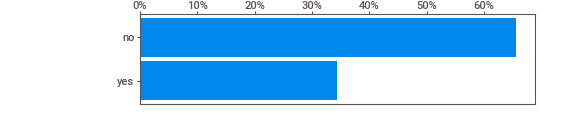
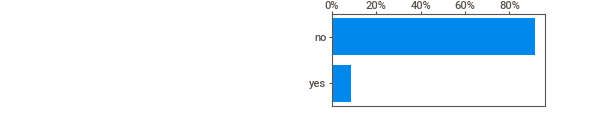
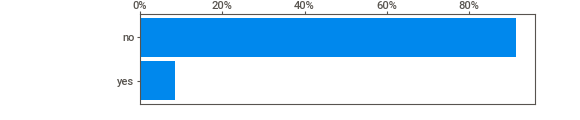
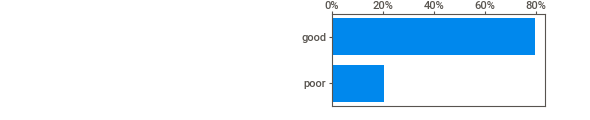
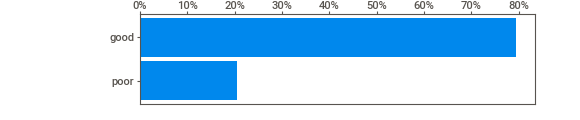
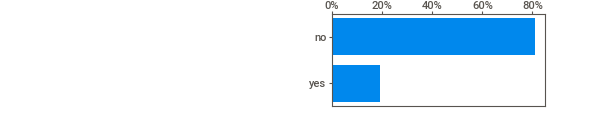
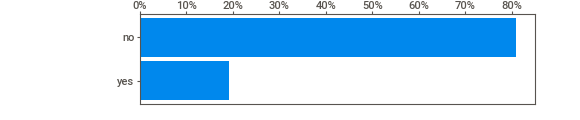
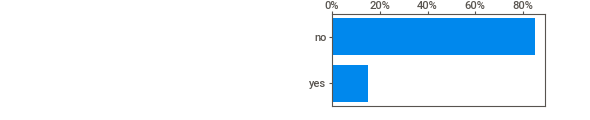
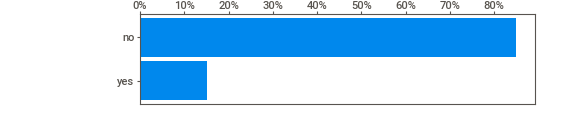
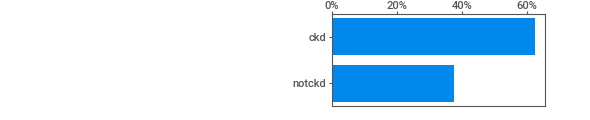
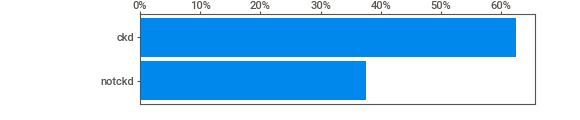
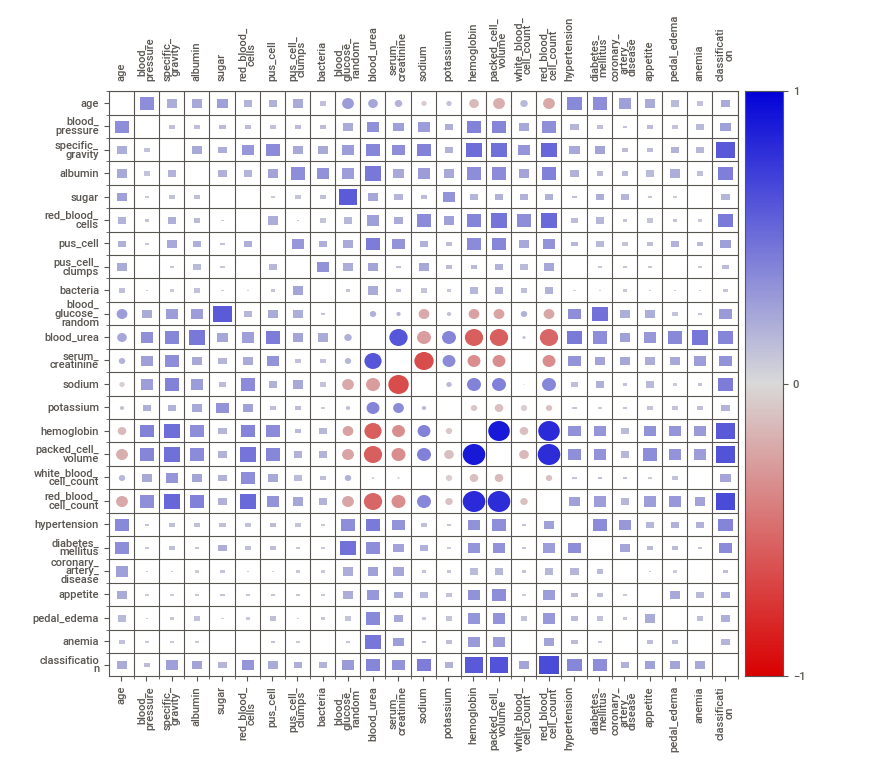
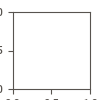

In [ ]:
#Visualizing the notebook
report.show_notebook()

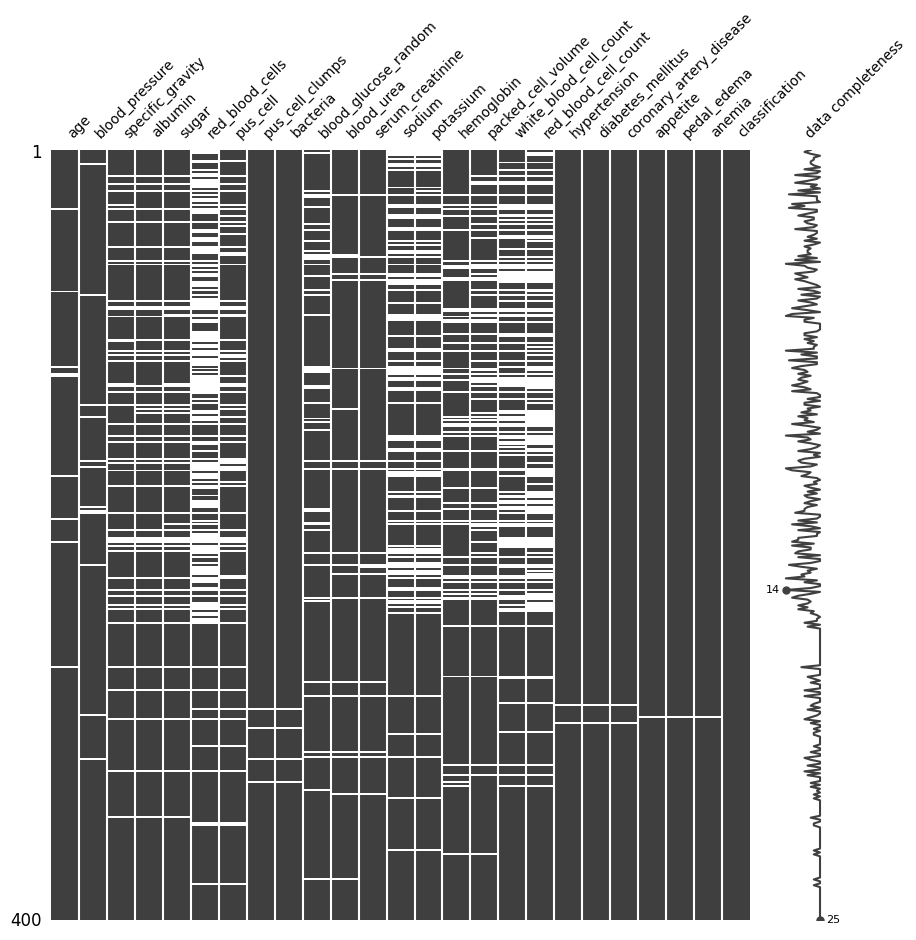

In [ ]:
# La matrice de nullité msno.matrix est un affichage dense en données
#qui  permet de repérer rapidement et visuellement des modèles dans l'achèvement des données.
msno.matrix(df, figsize=(10,10), fontsize=10, labels=8)
plt.show()

<Axes: >

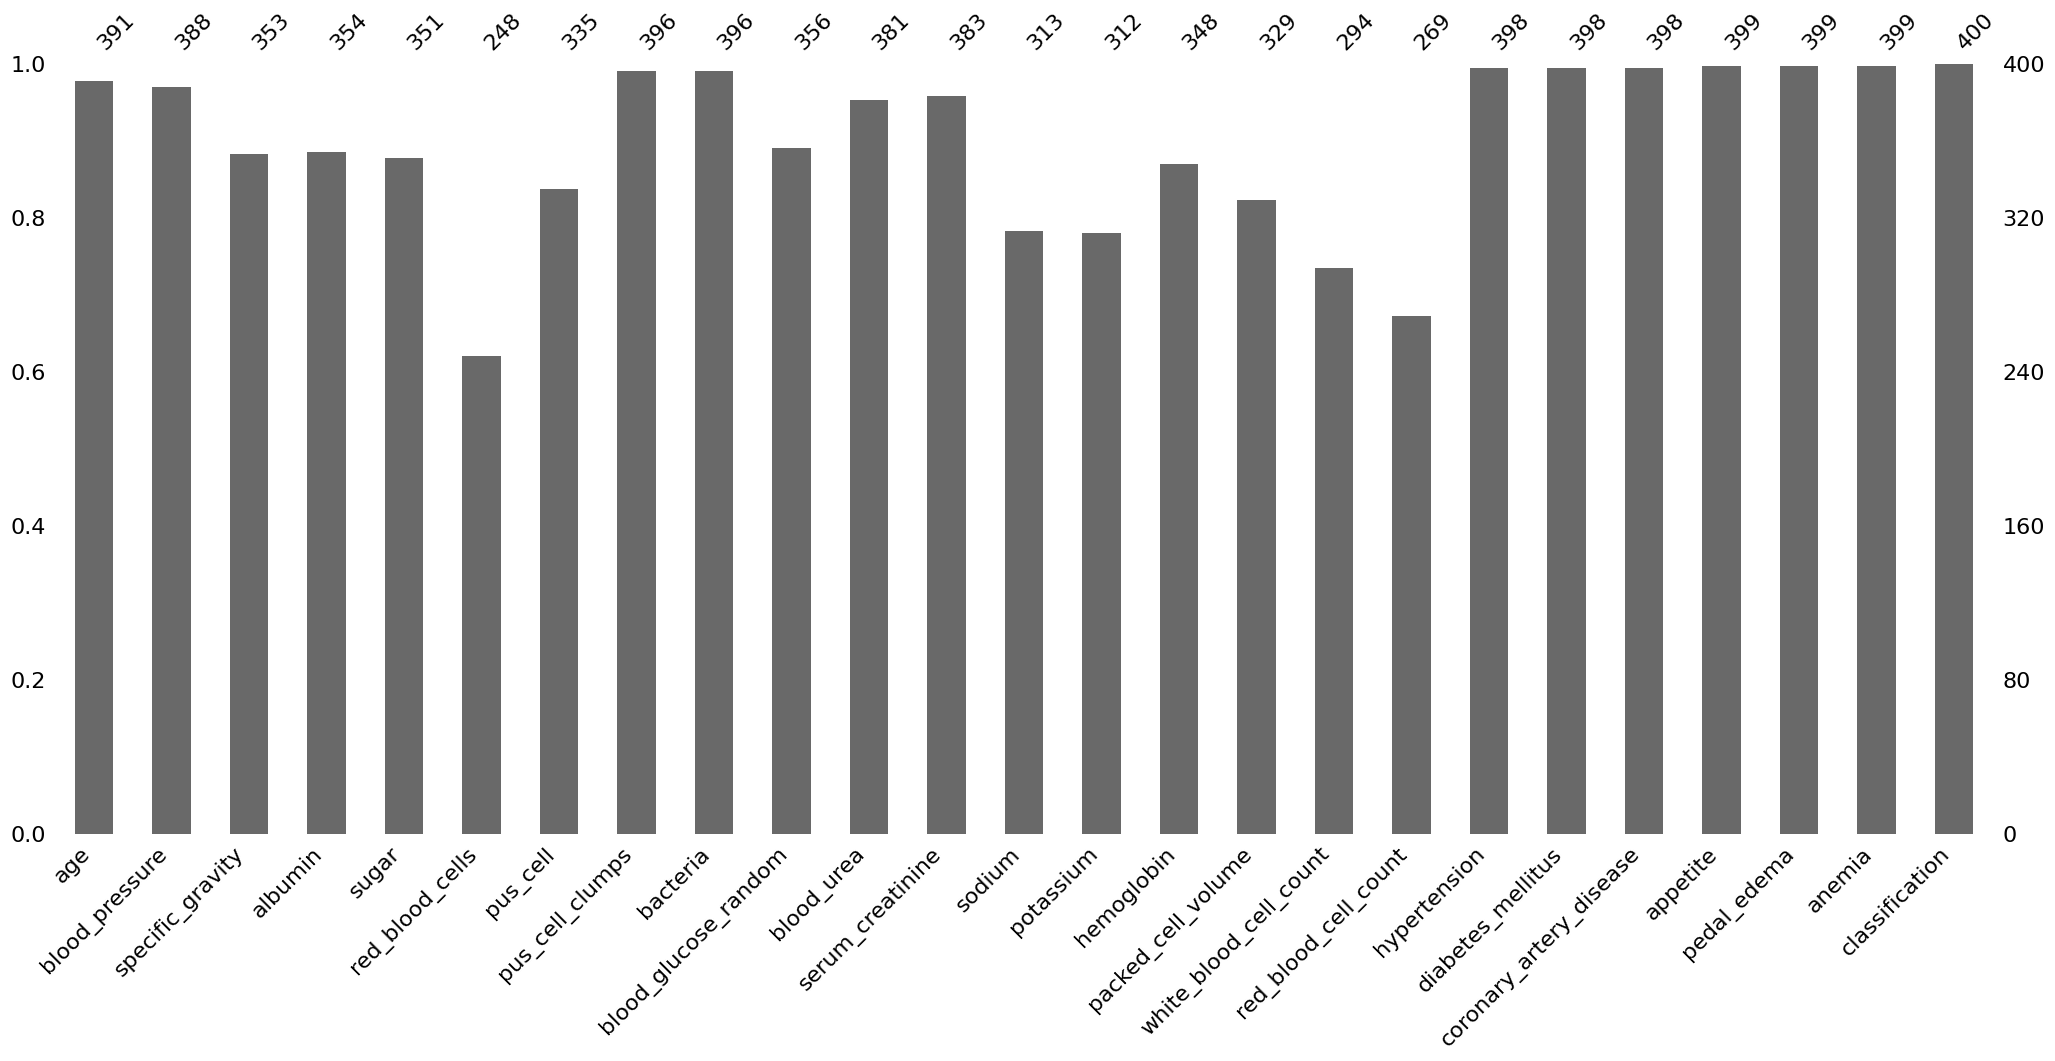

In [ ]:
# Visualize the number of missing
# values as a bar chart
# msno.bar est une simple visualisation de la nullité par colonne
msno.bar(df)

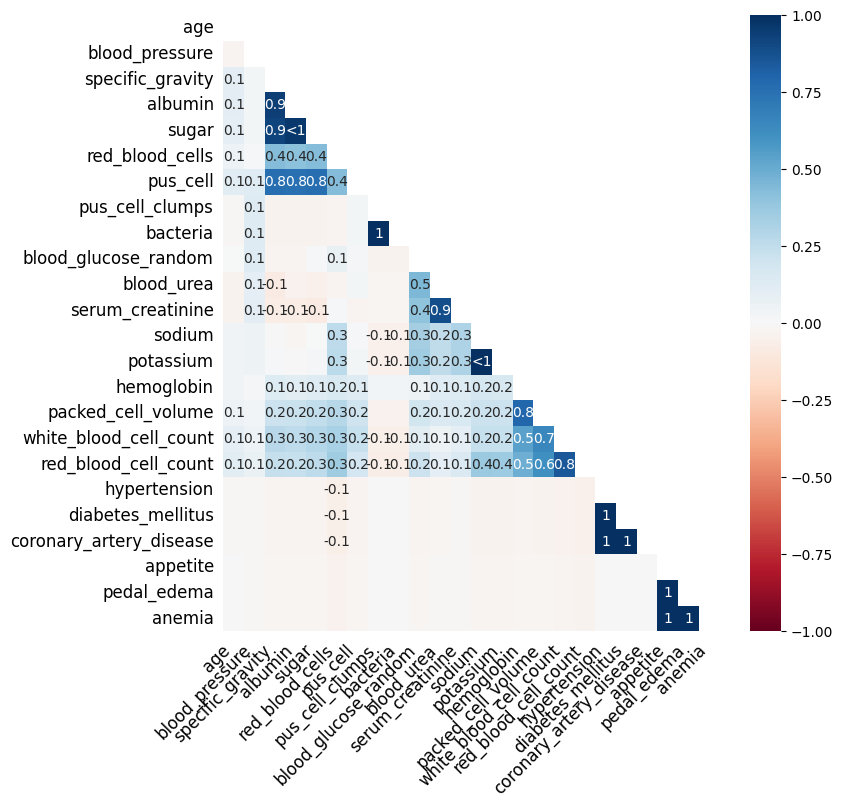

In [ ]:
#msno.heatmap mesure la corrélation de nullité : l'influence de la présence ou de l'absence d'une variable sur la présence d'une autre variable.
msno.heatmap(df, figsize=(8,8), fontsize=12)
plt.show()

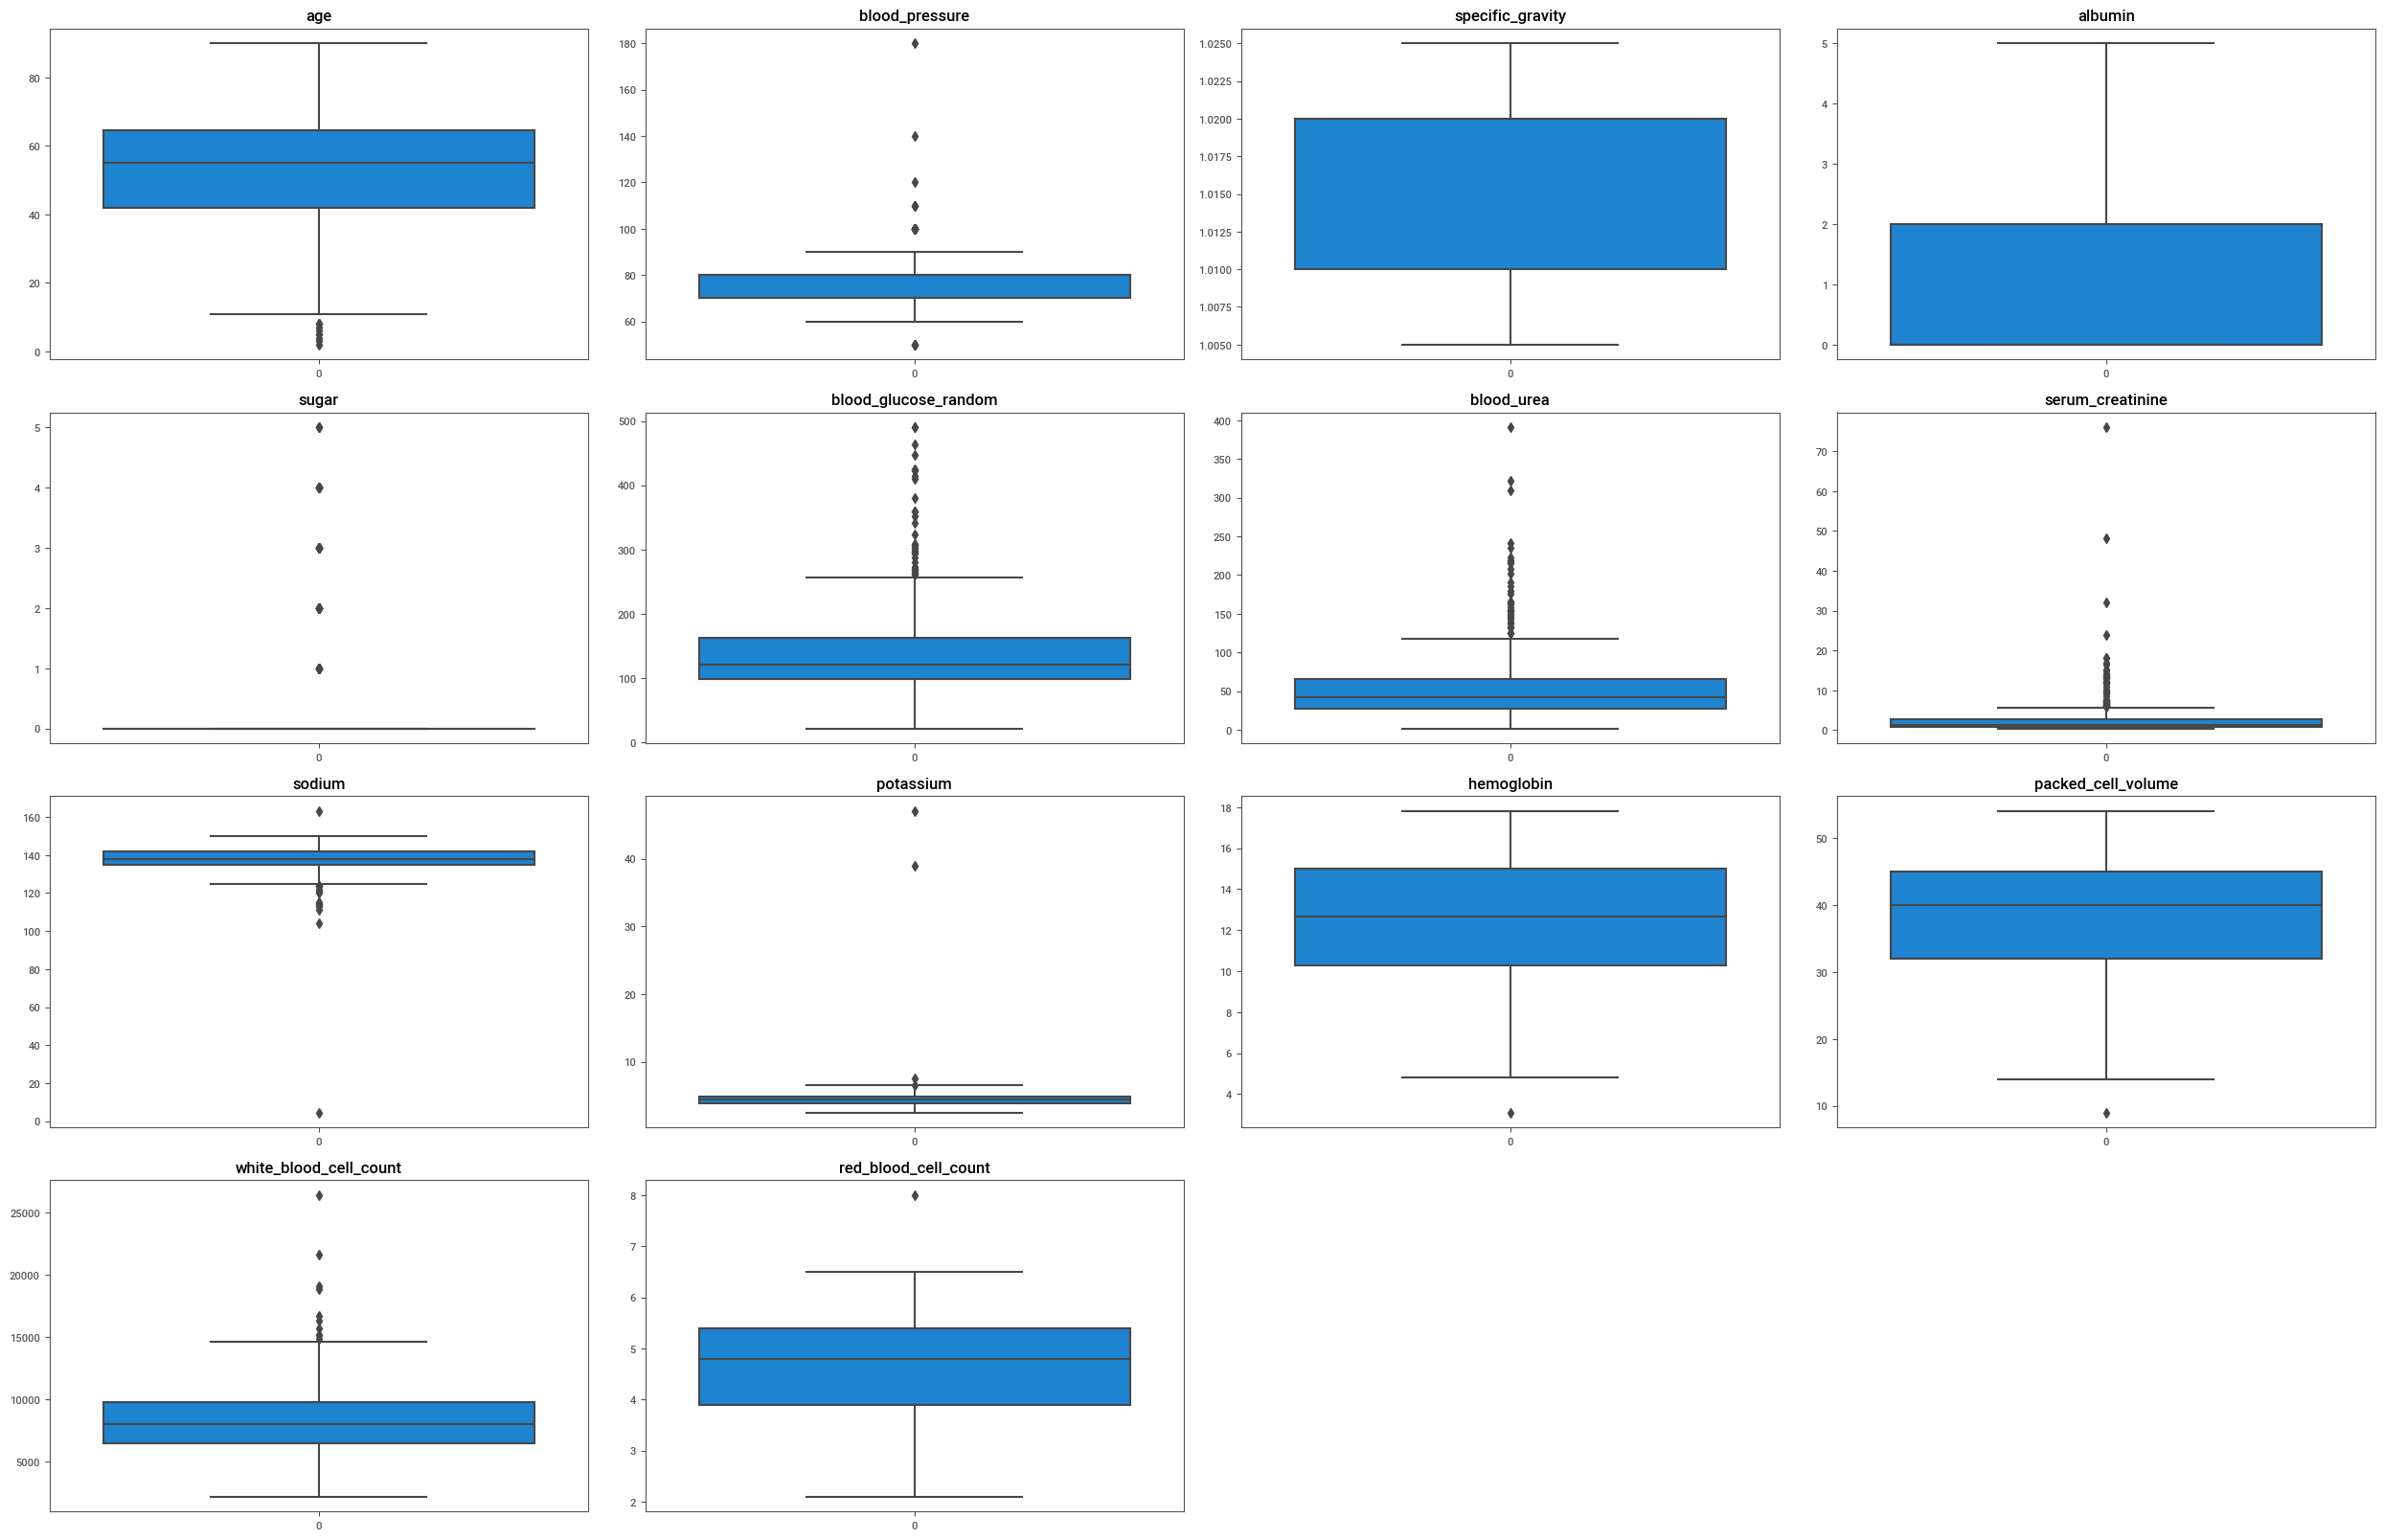

In [ ]:
# plot for outliers detection

plt.figure(figsize=(25,20))
for i in range(len(num_cols)):
    plt.subplot(5,4,i+1)
    sns.boxplot(df[num_cols[i]])
    plt.title(num_cols[i])

plt.tight_layout()

In [ ]:
#let us numerically draw conclusions
#creating function that can calculate interquartile range of the data
def calc_interquartile(data, column):
    global lower, upper
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(data[column], 25), np.percentile(data[column], 75)
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    #remove the outliers from the columns
    upper_outliers = data[data[column] > upper]
    lower_outliers = data[data[column] < lower]
    print('Lower outliers', lower_outliers.shape[0])
    print('Upper outliers', upper_outliers.shape[0])
    return print('total outliers', upper_outliers.shape[0] + lower_outliers.shape[0])


Total outliers in  age
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


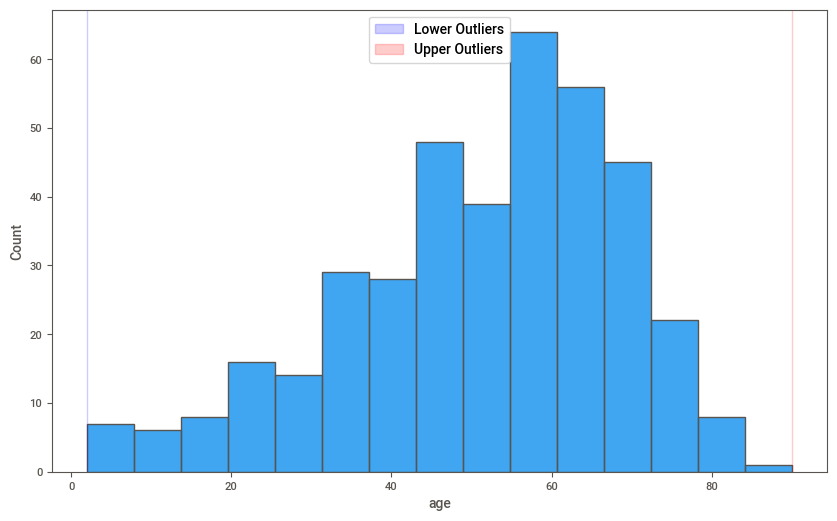

Total outliers in  blood_pressure
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


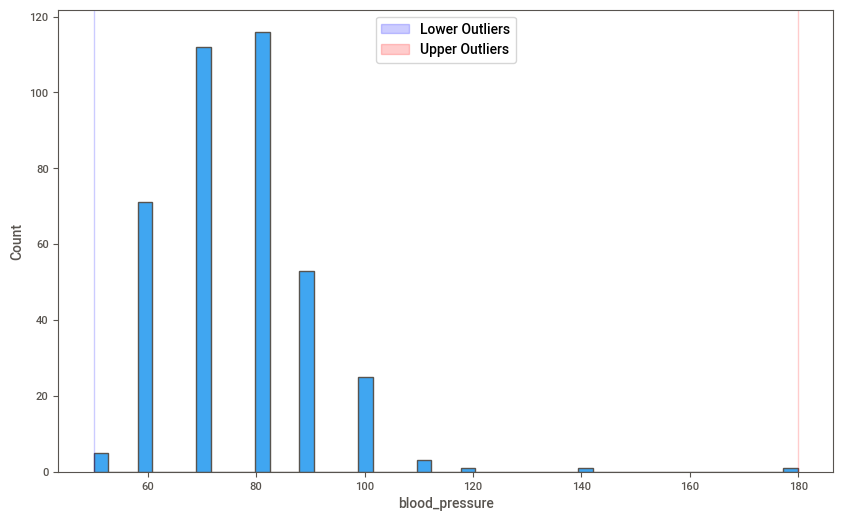

Total outliers in  specific_gravity
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


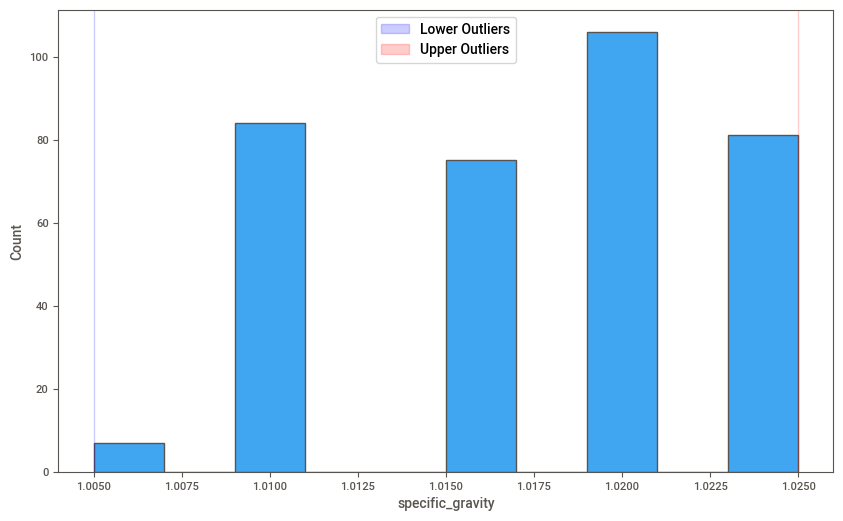

Total outliers in  albumin
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


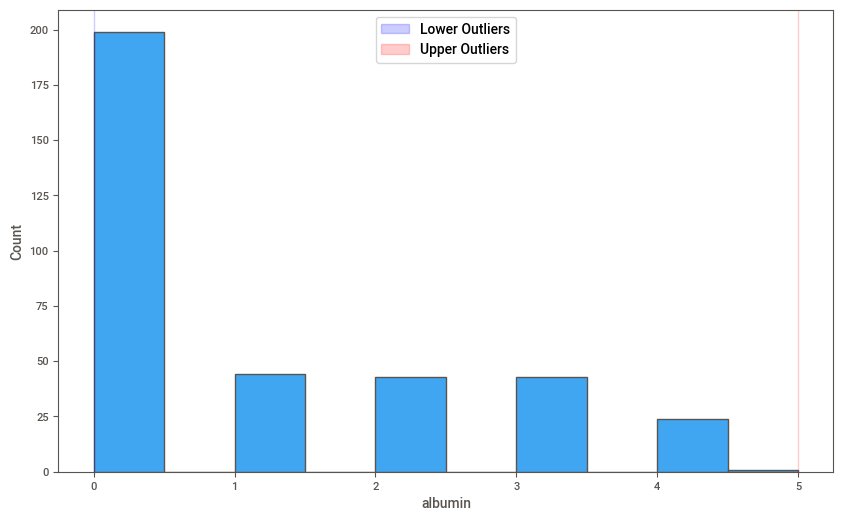

Total outliers in  sugar
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


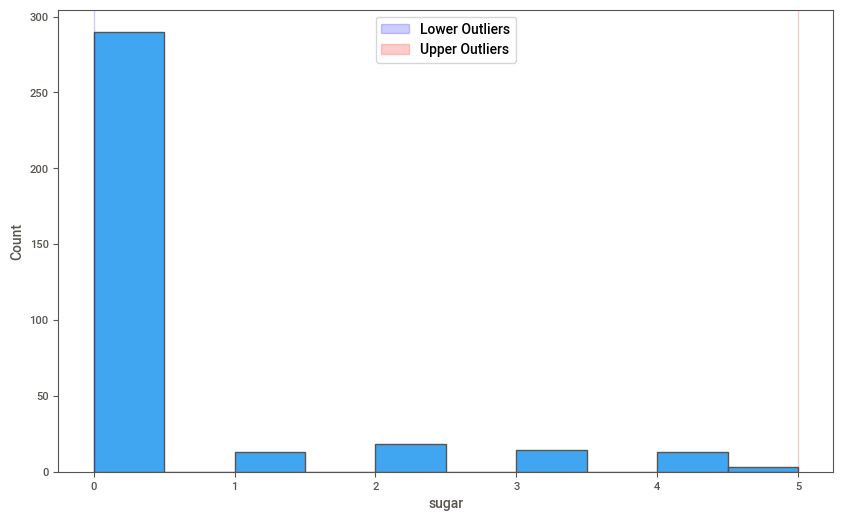

Total outliers in  blood_glucose_random
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


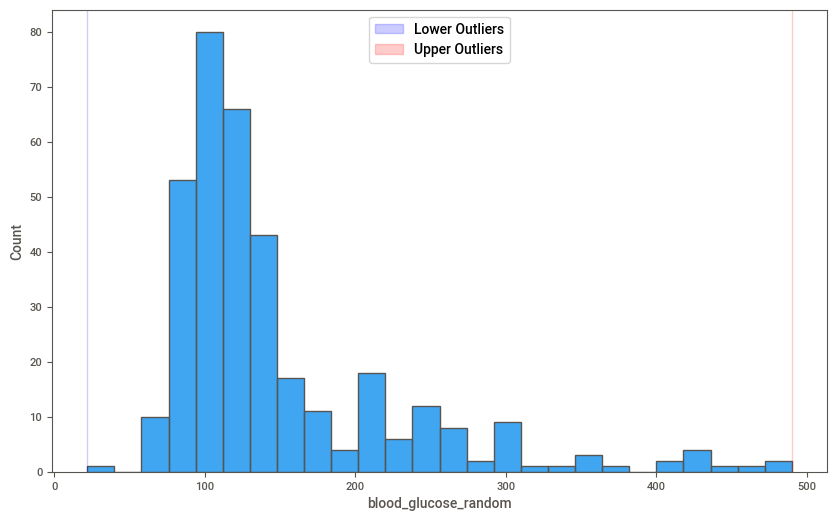

Total outliers in  blood_urea
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


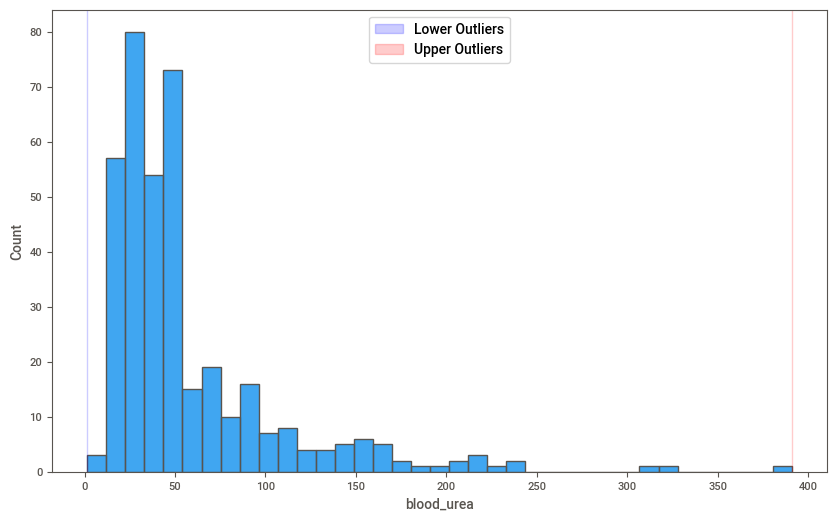

Total outliers in  serum_creatinine
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


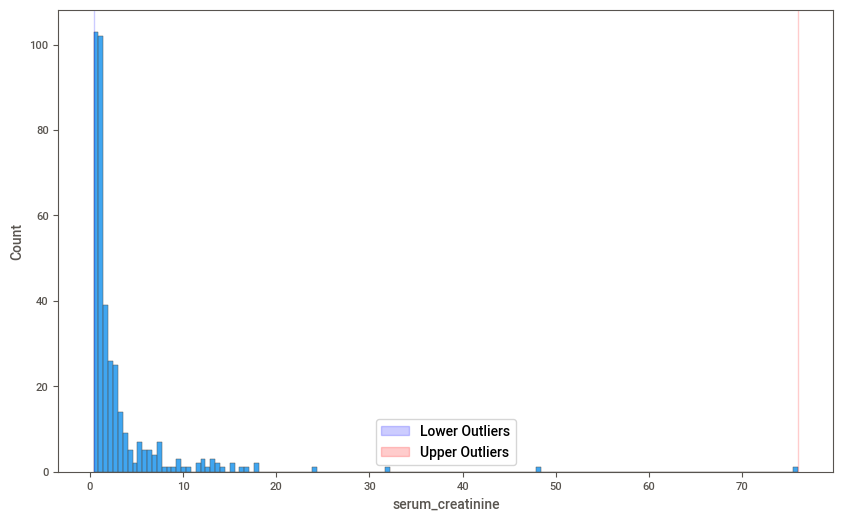

Total outliers in  sodium
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


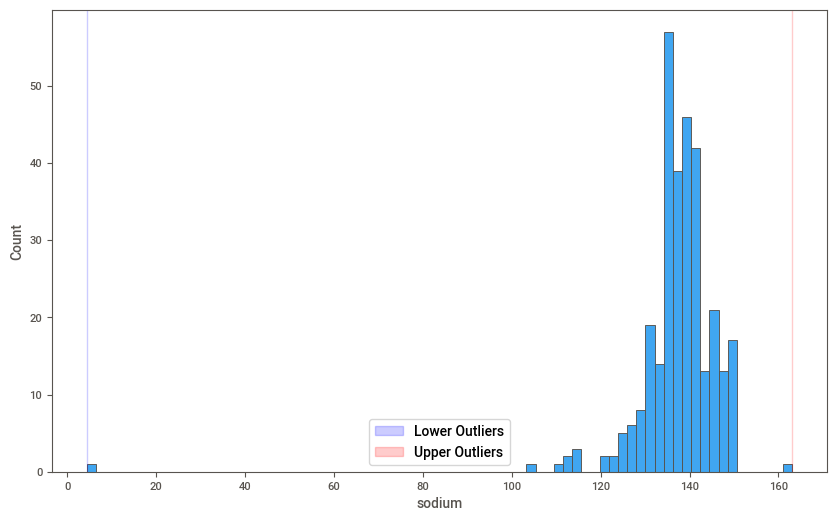

Total outliers in  potassium
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


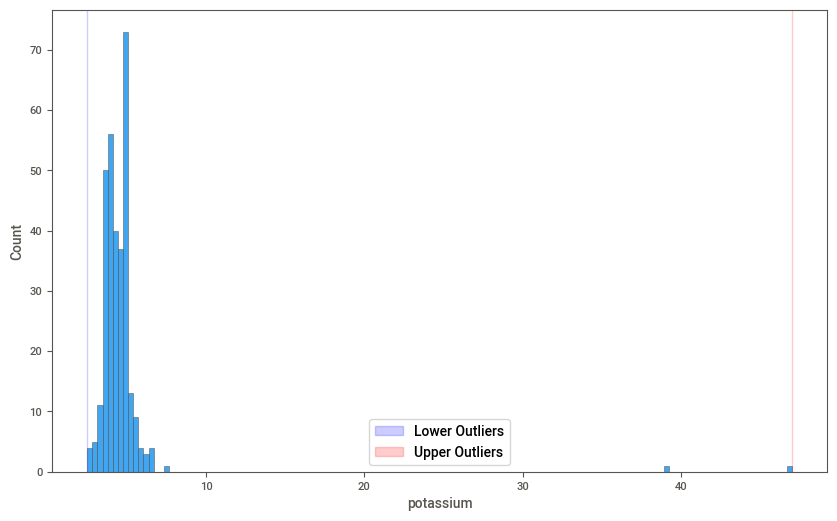

Total outliers in  hemoglobin
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


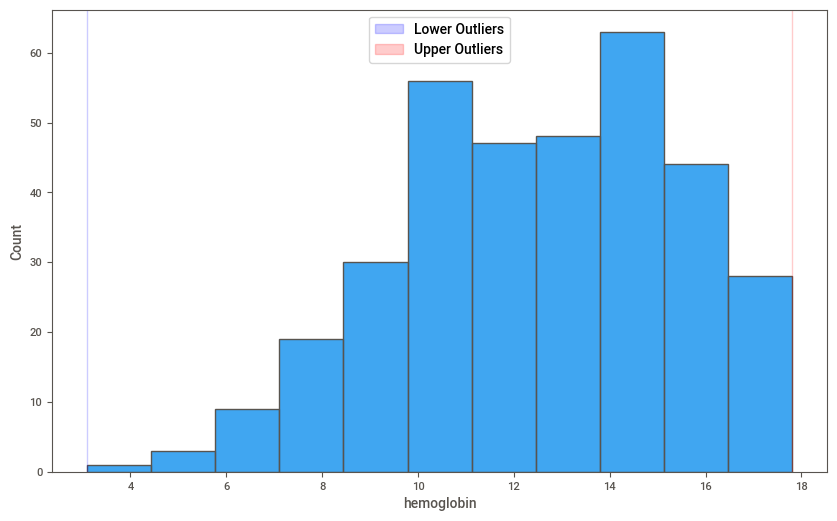

Total outliers in  packed_cell_volume
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


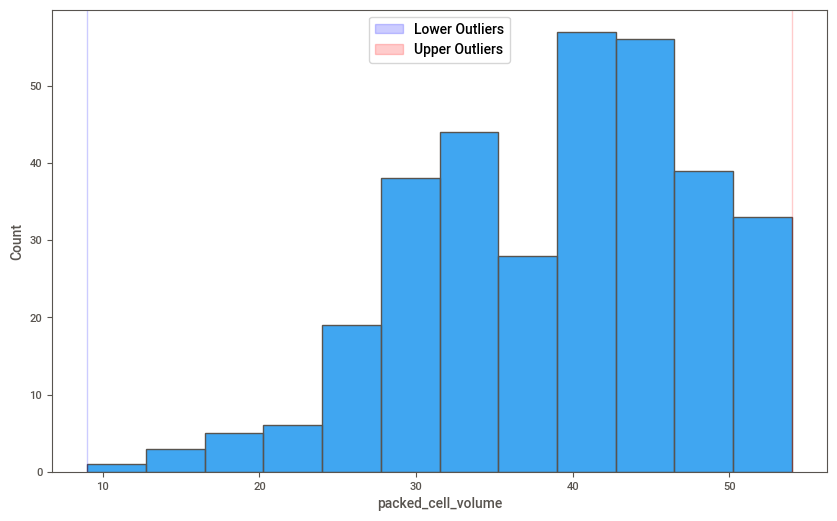

Total outliers in  white_blood_cell_count
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


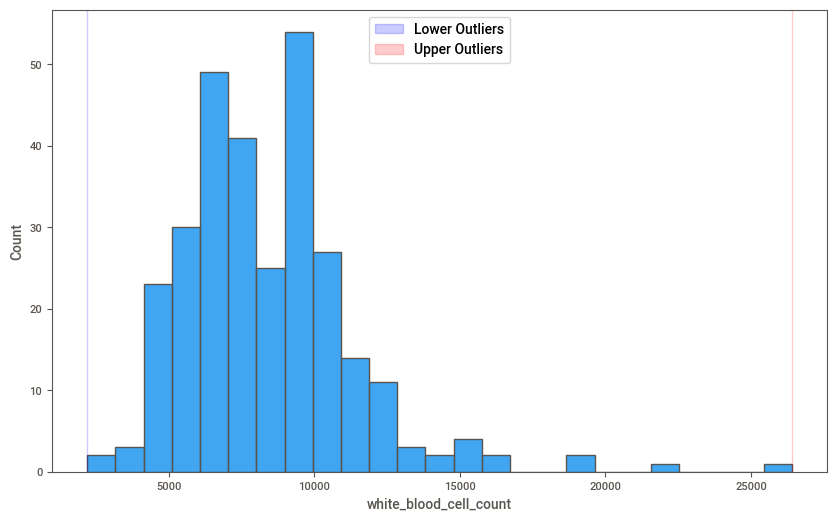

Total outliers in  red_blood_cell_count
Lower outliers 0
Upper outliers 0
total outliers 0
nan nan


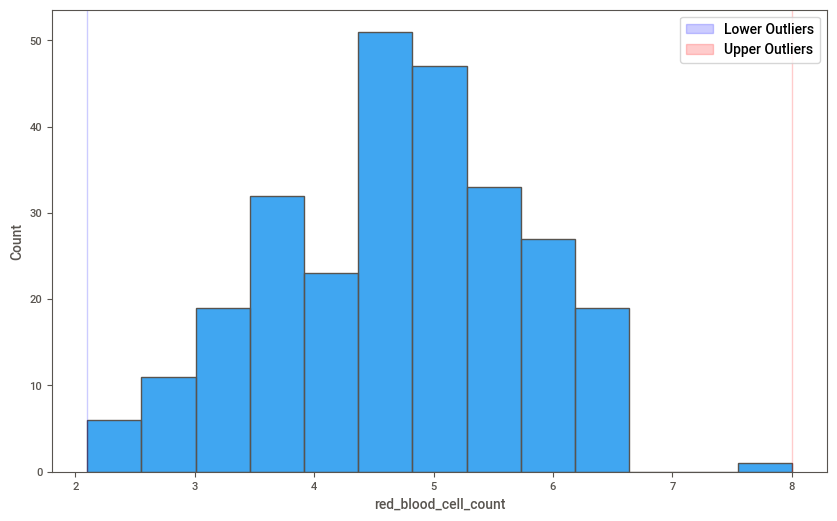

In [ ]:
#plotting outliers graph for each feature
#for  col in df.select_dtypes('float'):
for  col in num_cols:
  print('Total outliers in ', col)
  calc_interquartile(df, col)
  plt.figure(figsize = (10,6))
  sns.histplot(df[col], kde=False)
  print(upper, lower)
  plt.axvspan(xmin = lower,xmax= df[col].min(),alpha=0.2, color='blue', label='Lower Outliers')
  plt.axvspan(xmin = upper,xmax= df[col].max(),alpha=0.2, color='red', label='Upper Outliers')
  plt.legend()
  plt.show()

pas de valeurs abbérantes

In [ ]:
 # General Exploration for Categorical Variables:

def cat_summary(dataframe, plot=False):
    for col_name in cat_cols:
        print("############## Unique Observations of Categorical Data ###############")
        print("The unique number of "+ col_name+": "+ str(dataframe[col_name].nunique()))

        print("############## Frequency of Categorical Data ########################")
        print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                            "Ratio": dataframe[col_name].value_counts()/len(dataframe)}))
        if plot == True:
            rgb_values = sns.color_palette("Set2", 6)
            sns.set_theme(style="darkgrid")
            ax = sns.countplot(x=dataframe[col_name], data=dataframe, palette=rgb_values)
            for p in ax.patches:
                ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
            plt.show()

############## Unique Observations of Categorical Data ###############
The unique number of red_blood_cells: 2
############## Frequency of Categorical Data ########################
          red_blood_cells   Ratio
normal                201  0.5025
abnormal               47  0.1175


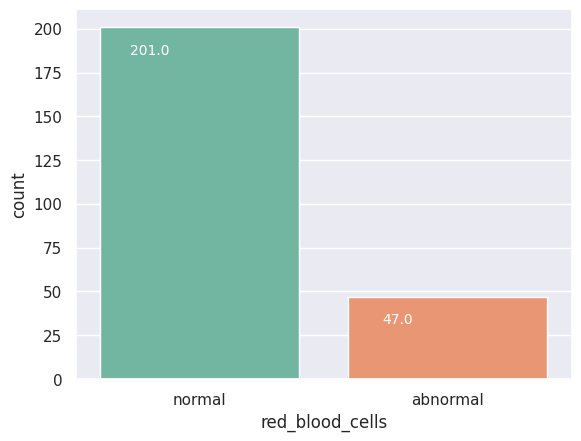

############## Unique Observations of Categorical Data ###############
The unique number of pus_cell: 2
############## Frequency of Categorical Data ########################
          pus_cell   Ratio
normal         259  0.6475
abnormal        76  0.1900


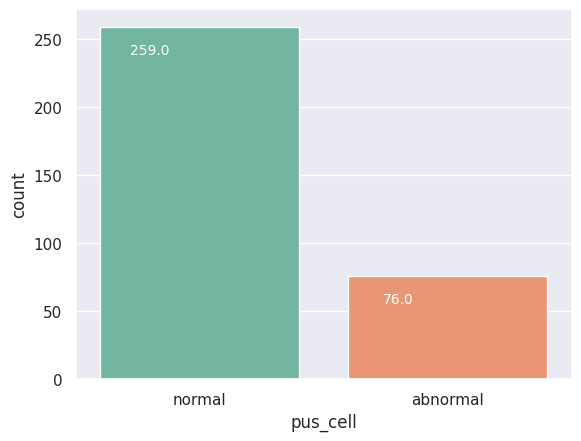

############## Unique Observations of Categorical Data ###############
The unique number of pus_cell_clumps: 2
############## Frequency of Categorical Data ########################
            pus_cell_clumps  Ratio
notpresent              354  0.885
present                  42  0.105


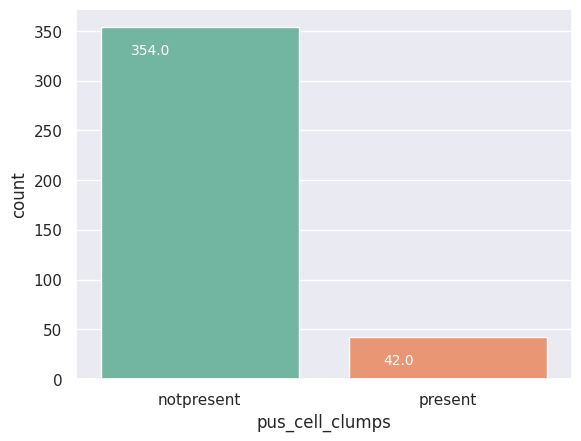

############## Unique Observations of Categorical Data ###############
The unique number of bacteria: 2
############## Frequency of Categorical Data ########################
            bacteria  Ratio
notpresent       374  0.935
present           22  0.055


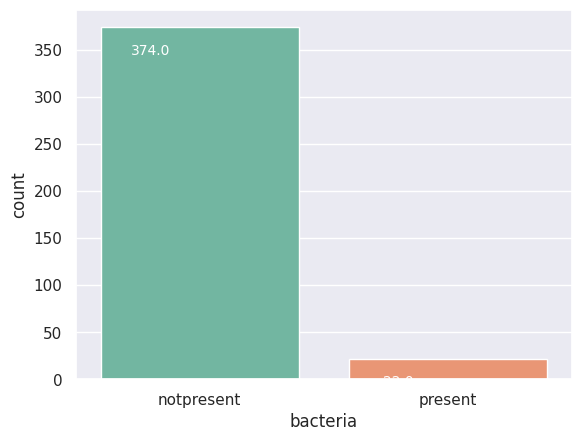

############## Unique Observations of Categorical Data ###############
The unique number of hypertension: 2
############## Frequency of Categorical Data ########################
     hypertension   Ratio
no            251  0.6275
yes           147  0.3675


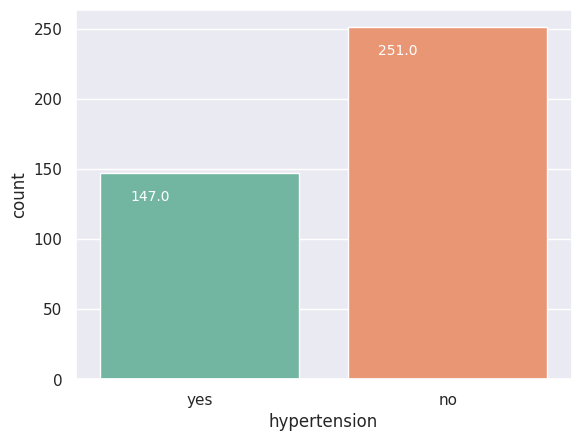

############## Unique Observations of Categorical Data ###############
The unique number of diabetes_mellitus: 2
############## Frequency of Categorical Data ########################
     diabetes_mellitus   Ratio
no                 261  0.6525
yes                137  0.3425


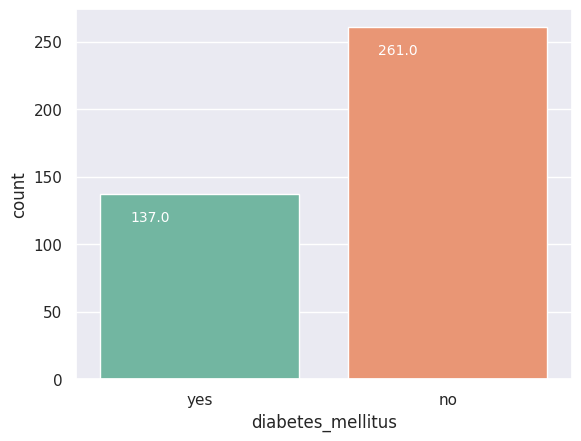

############## Unique Observations of Categorical Data ###############
The unique number of coronary_artery_disease: 2
############## Frequency of Categorical Data ########################
     coronary_artery_disease  Ratio
no                       364  0.910
yes                       34  0.085


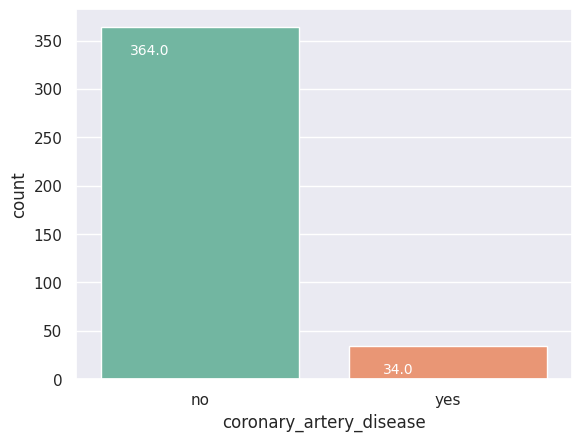

############## Unique Observations of Categorical Data ###############
The unique number of appetite: 2
############## Frequency of Categorical Data ########################
      appetite   Ratio
good       317  0.7925
poor        82  0.2050


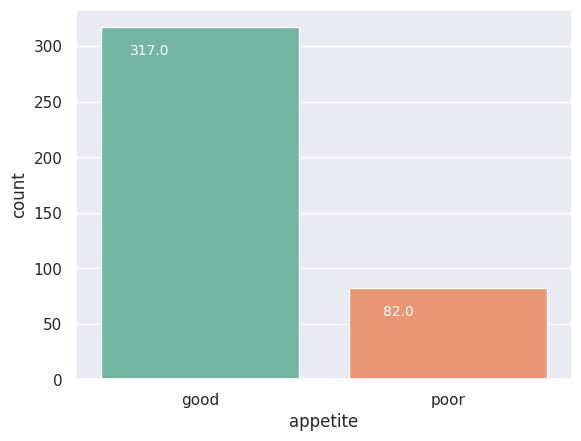

############## Unique Observations of Categorical Data ###############
The unique number of pedal_edema: 2
############## Frequency of Categorical Data ########################
     pedal_edema   Ratio
no           323  0.8075
yes           76  0.1900


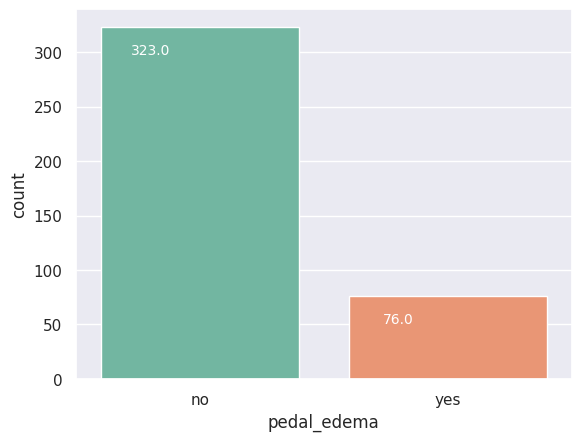

############## Unique Observations of Categorical Data ###############
The unique number of anemia: 2
############## Frequency of Categorical Data ########################
     anemia   Ratio
no      339  0.8475
yes      60  0.1500


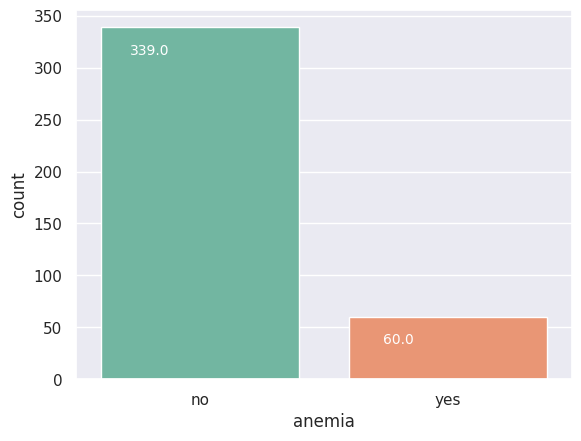

############## Unique Observations of Categorical Data ###############
The unique number of classification: 2
############## Frequency of Categorical Data ########################
        classification  Ratio
ckd                250  0.625
notckd             150  0.375


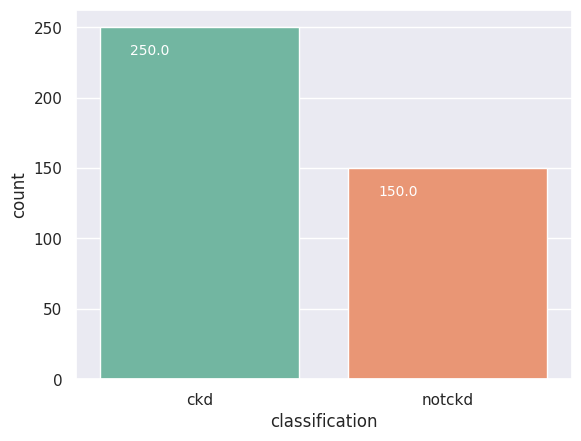

In [ ]:
cat_summary(df, plot=True)

In [ ]:
# General Exploration for Numerical Variables:

def num_summary(dataframe,  plot=False):
    quantiles = [0.25, 0.50, 0.75, 1]
    for col_name in num_cols:
        print("########## Summary Statistics of " +  col_name + " ############")
        print(dataframe[col_name].describe(quantiles).T)

        if plot:
            sns.histplot(data=dataframe, x=col_name  )
            plt.xlabel(col_name)
            plt.title("The distribution of "+ col_name)
            plt.grid(True)
            plt.show(block=True)

########## Summary Statistics of age ############
count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
100%      90.000000
max       90.000000
Name: age, dtype: float64


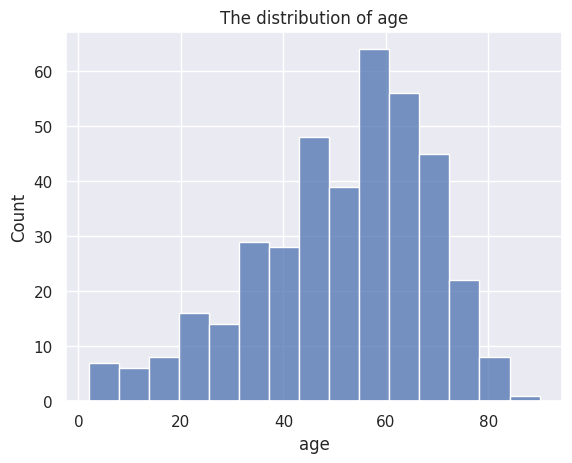

########## Summary Statistics of blood_pressure ############
count    388.000000
mean      76.469072
std       13.683637
min       50.000000
25%       70.000000
50%       80.000000
75%       80.000000
100%     180.000000
max      180.000000
Name: blood_pressure, dtype: float64


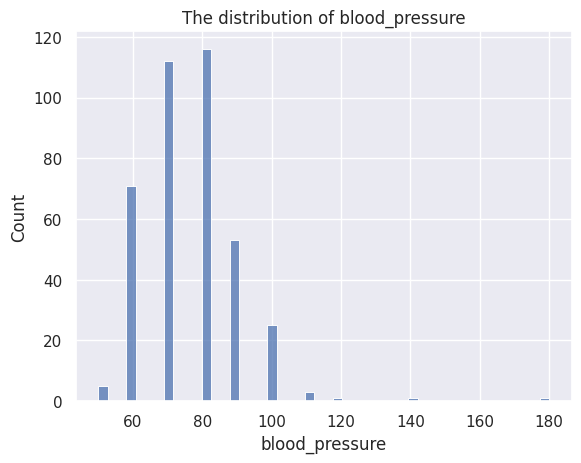

########## Summary Statistics of specific_gravity ############
count    353.000000
mean       1.017408
std        0.005717
min        1.005000
25%        1.010000
50%        1.020000
75%        1.020000
100%       1.025000
max        1.025000
Name: specific_gravity, dtype: float64


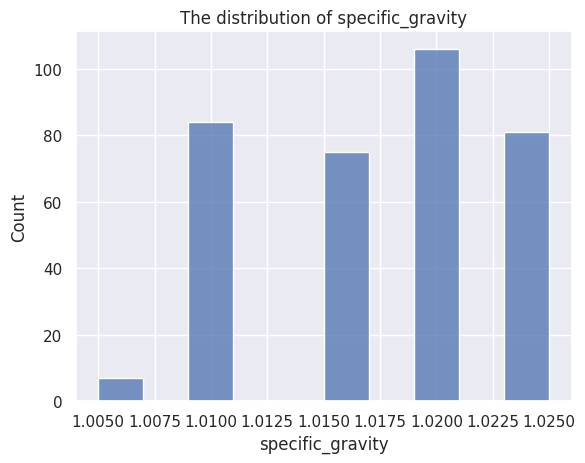

########## Summary Statistics of albumin ############
count    354.000000
mean       1.016949
std        1.352679
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
100%       5.000000
max        5.000000
Name: albumin, dtype: float64


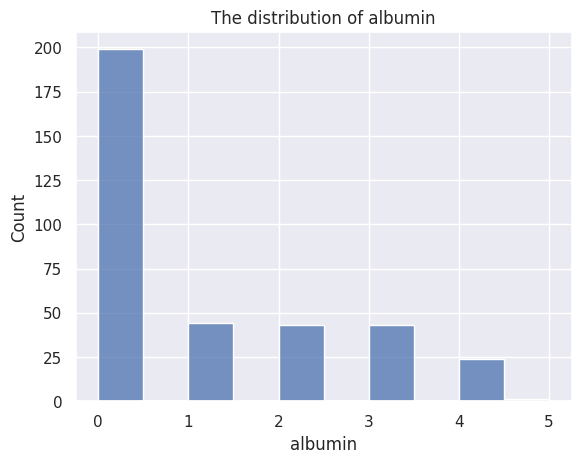

########## Summary Statistics of sugar ############
count    351.000000
mean       0.450142
std        1.099191
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
100%       5.000000
max        5.000000
Name: sugar, dtype: float64


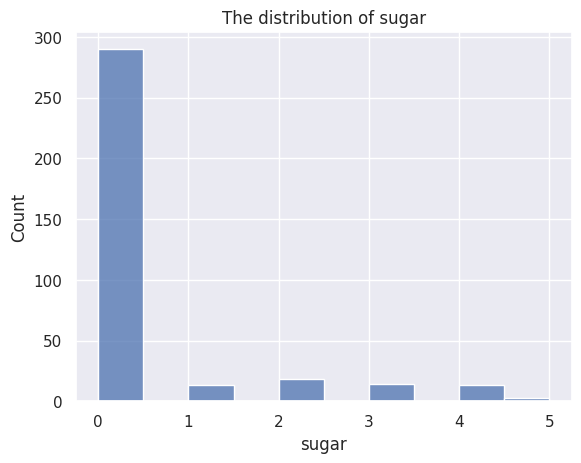

########## Summary Statistics of blood_glucose_random ############
count    356.000000
mean     148.036517
std       79.281714
min       22.000000
25%       99.000000
50%      121.000000
75%      163.000000
100%     490.000000
max      490.000000
Name: blood_glucose_random, dtype: float64


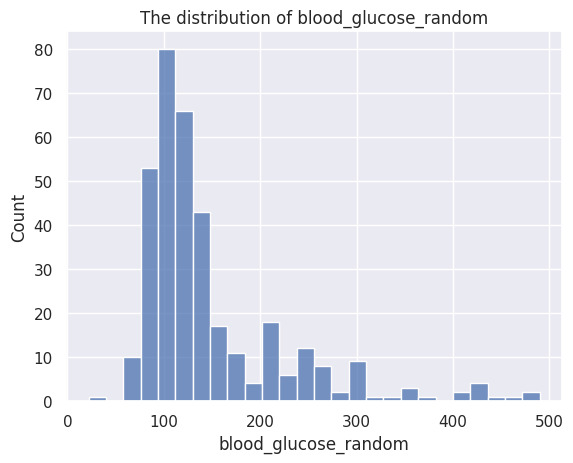

########## Summary Statistics of blood_urea ############
count    381.000000
mean      57.425722
std       50.503006
min        1.500000
25%       27.000000
50%       42.000000
75%       66.000000
100%     391.000000
max      391.000000
Name: blood_urea, dtype: float64


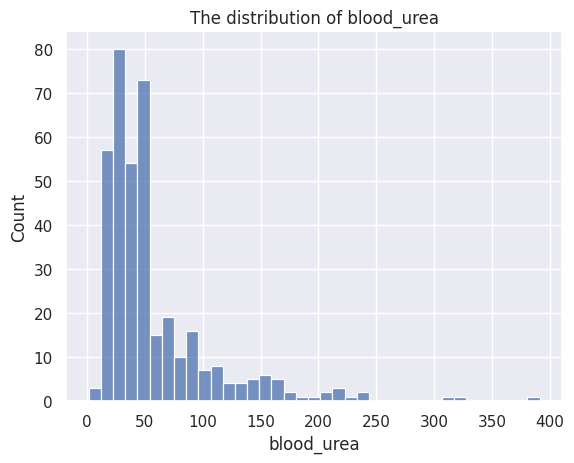

########## Summary Statistics of serum_creatinine ############
count    383.000000
mean       3.072454
std        5.741126
min        0.400000
25%        0.900000
50%        1.300000
75%        2.800000
100%      76.000000
max       76.000000
Name: serum_creatinine, dtype: float64


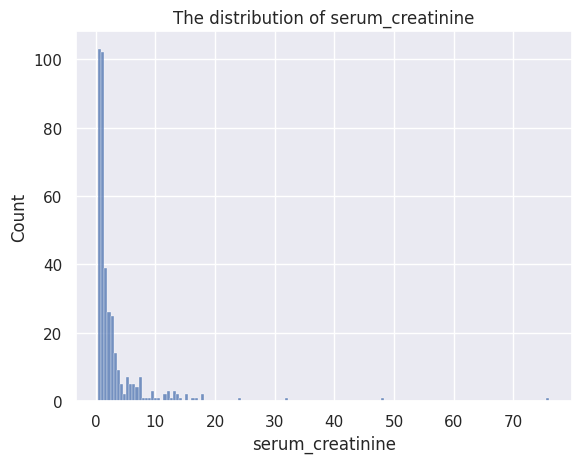

########## Summary Statistics of sodium ############
count    313.000000
mean     137.528754
std       10.408752
min        4.500000
25%      135.000000
50%      138.000000
75%      142.000000
100%     163.000000
max      163.000000
Name: sodium, dtype: float64


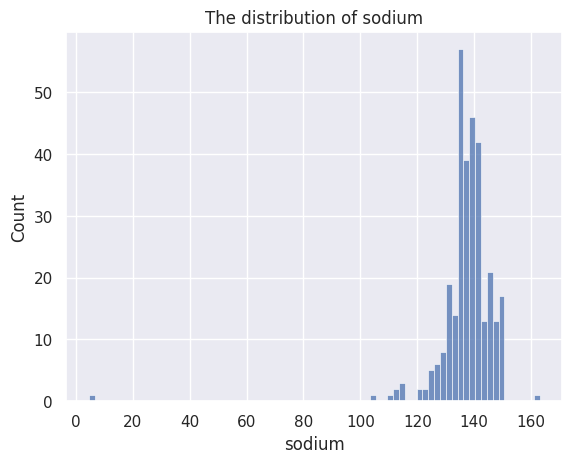

########## Summary Statistics of potassium ############
count    312.000000
mean       4.627244
std        3.193904
min        2.500000
25%        3.800000
50%        4.400000
75%        4.900000
100%      47.000000
max       47.000000
Name: potassium, dtype: float64


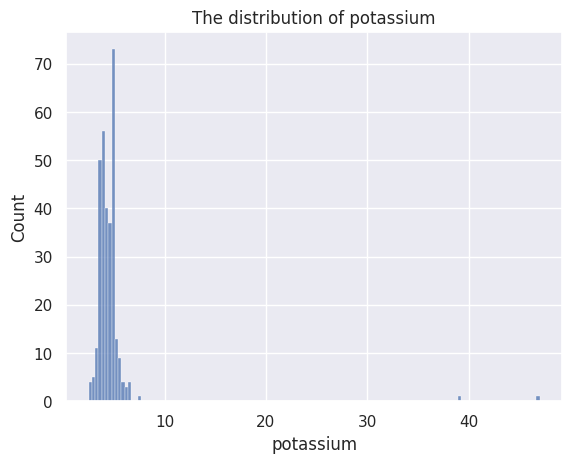

########## Summary Statistics of hemoglobin ############
count    348.000000
mean      12.526437
std        2.912587
min        3.100000
25%       10.300000
50%       12.650000
75%       15.000000
100%      17.800000
max       17.800000
Name: hemoglobin, dtype: float64


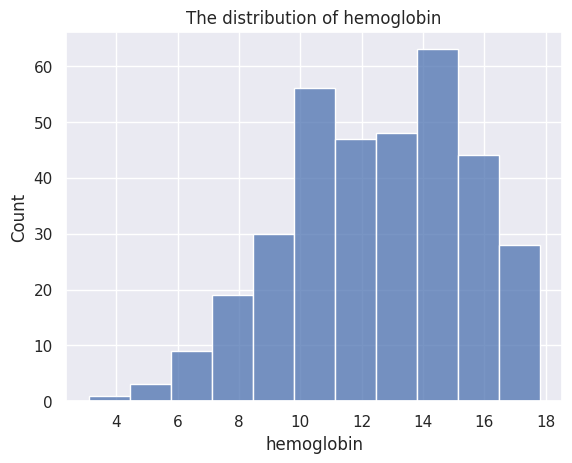

########## Summary Statistics of packed_cell_volume ############
count    329.000000
mean      38.884498
std        8.990105
min        9.000000
25%       32.000000
50%       40.000000
75%       45.000000
100%      54.000000
max       54.000000
Name: packed_cell_volume, dtype: float64


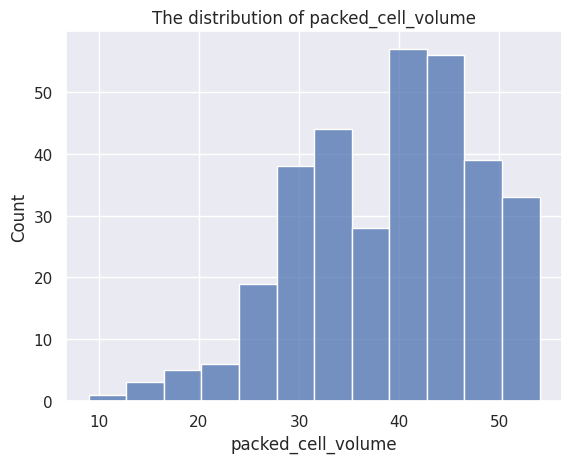

########## Summary Statistics of white_blood_cell_count ############
count      294.000000
mean      8406.122449
std       2944.474190
min       2200.000000
25%       6500.000000
50%       8000.000000
75%       9800.000000
100%     26400.000000
max      26400.000000
Name: white_blood_cell_count, dtype: float64


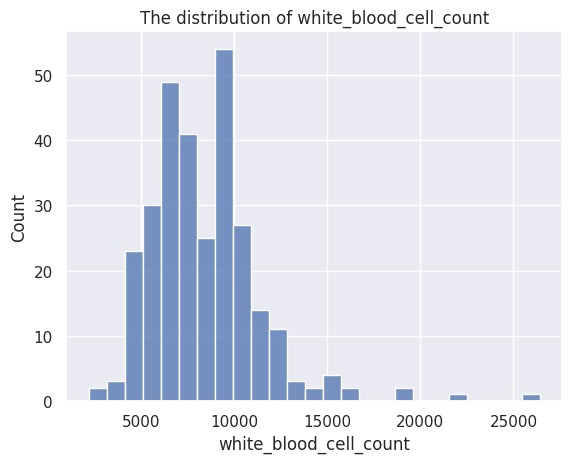

########## Summary Statistics of red_blood_cell_count ############
count    269.000000
mean       4.707435
std        1.025323
min        2.100000
25%        3.900000
50%        4.800000
75%        5.400000
100%       8.000000
max        8.000000
Name: red_blood_cell_count, dtype: float64


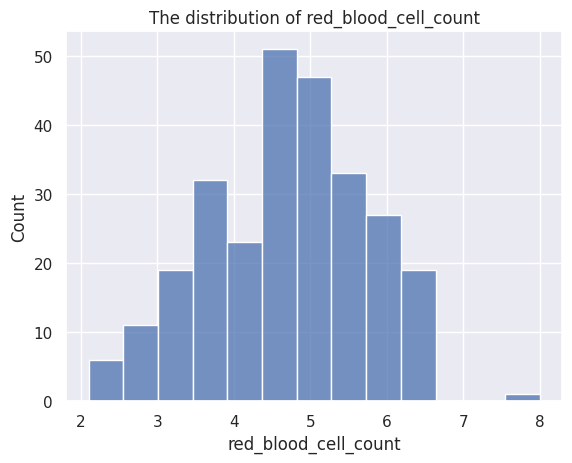

In [ ]:
num_summary(df, plot=True)

Relation Target / Variables

In [ ]:
ckd_df = df[df['classification'] == 'ckd']
notckd_df = df[df['classification'] == 'notckd']

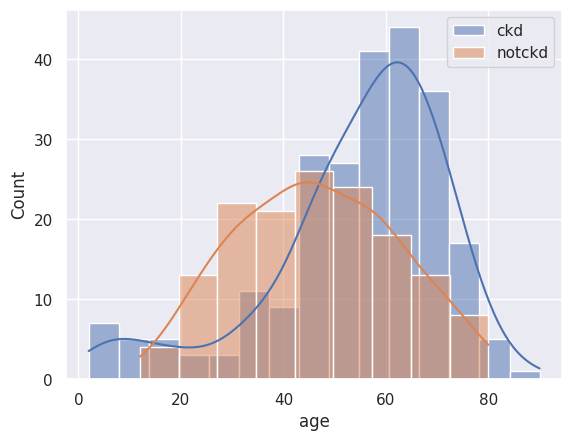

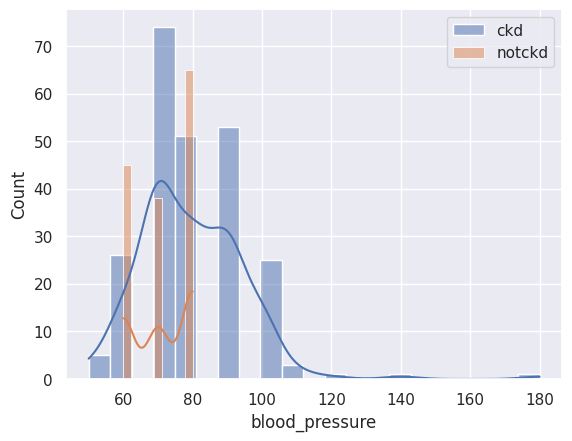

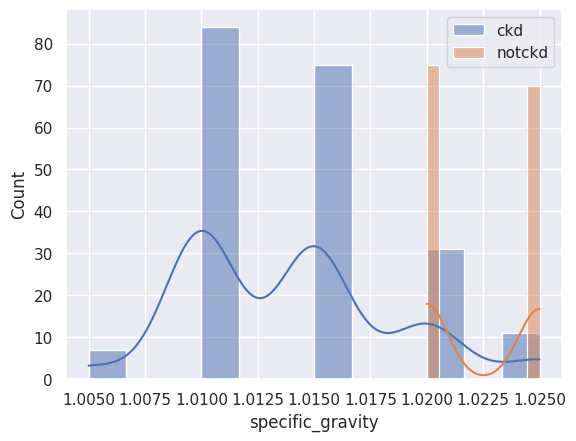

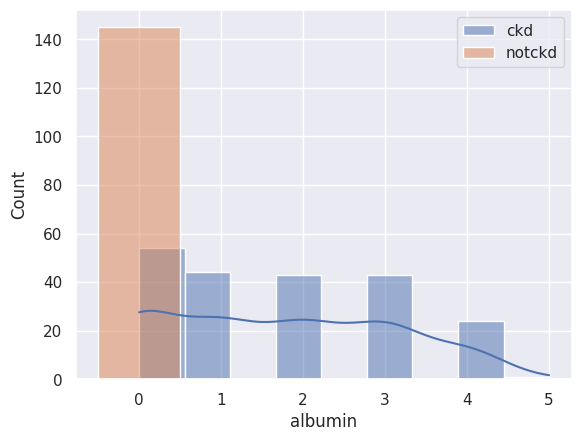

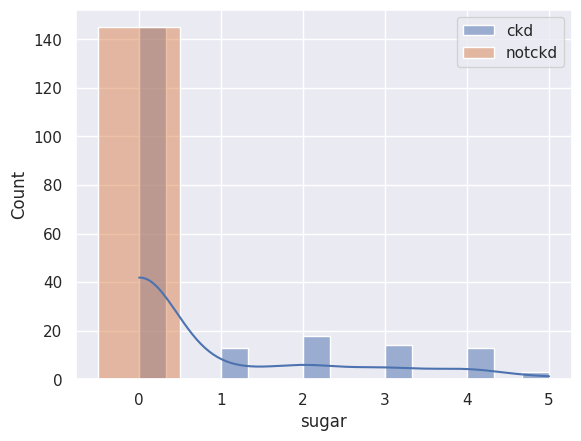

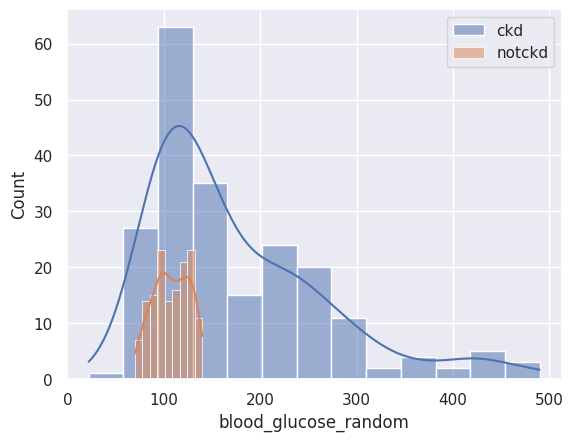

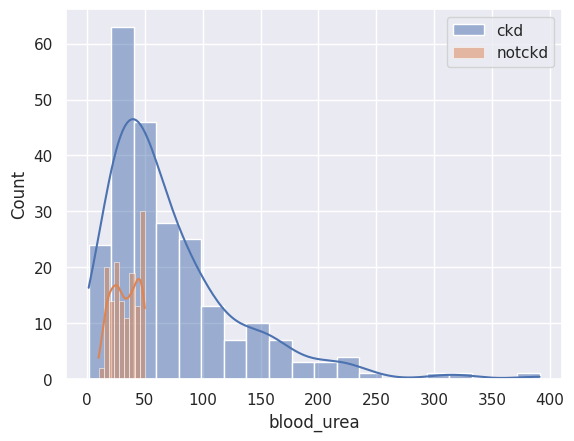

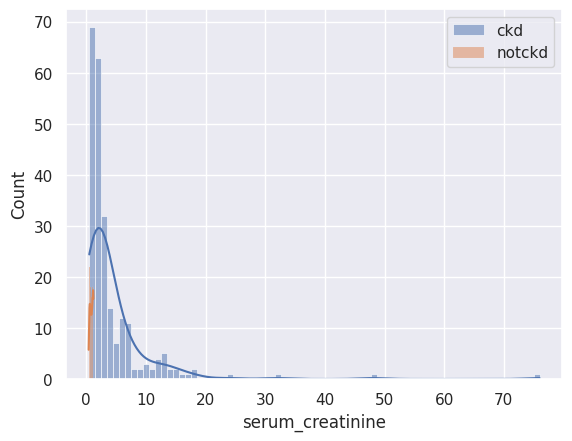

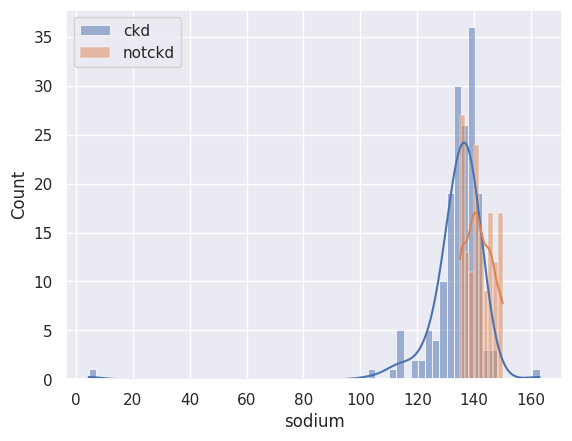

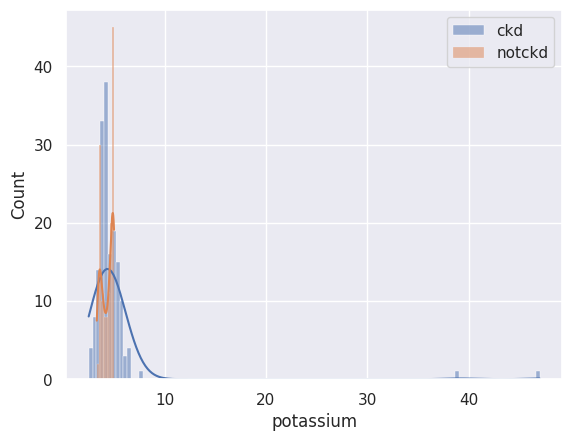

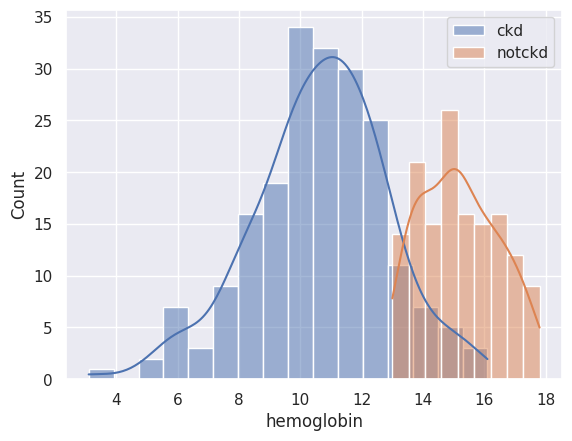

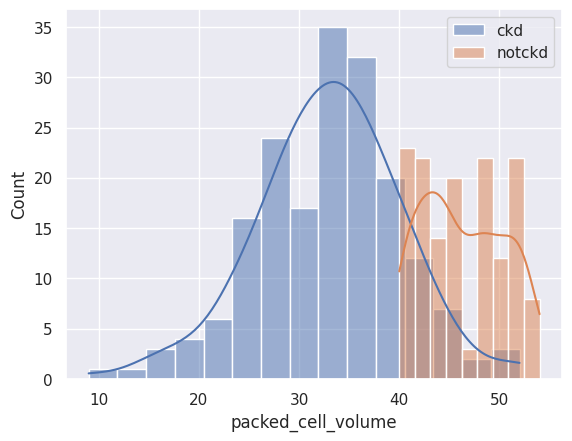

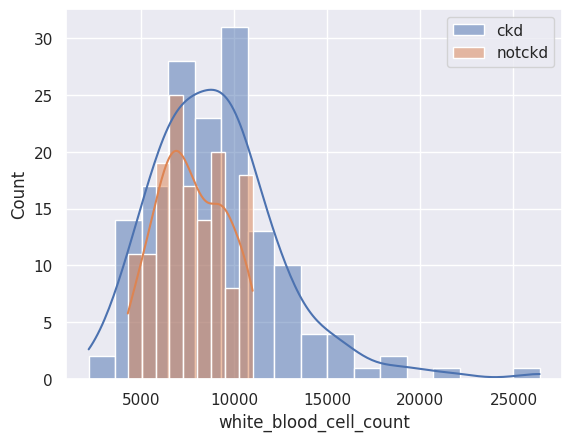

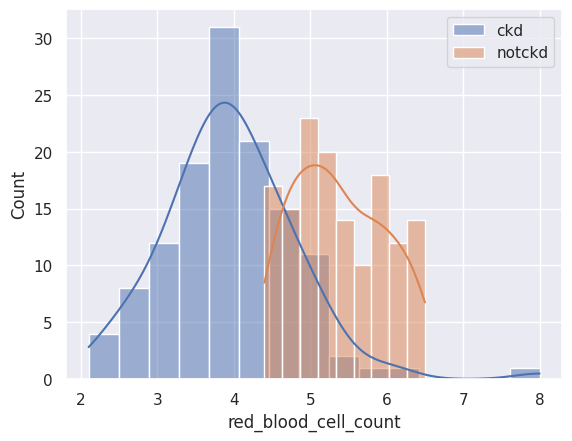

In [ ]:
for col in num_cols:
    plt.figure()
    sns.histplot(ckd_df[col], label='ckd',kde=True)
    sns.histplot(notckd_df[col], label='notckd',kde=True)
    plt.legend()

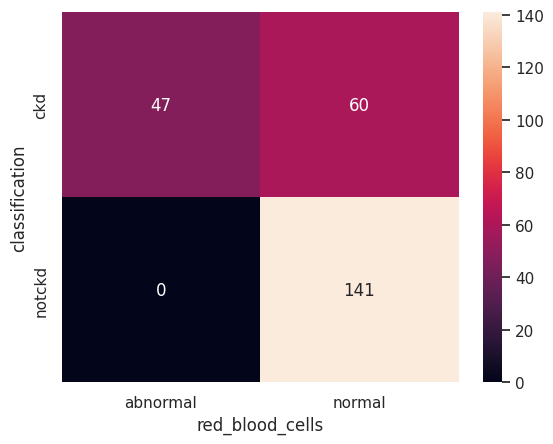

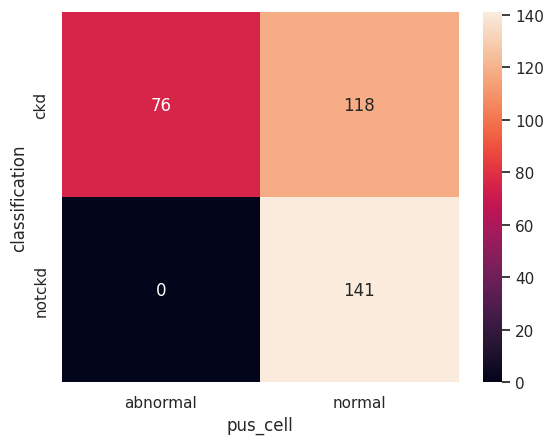

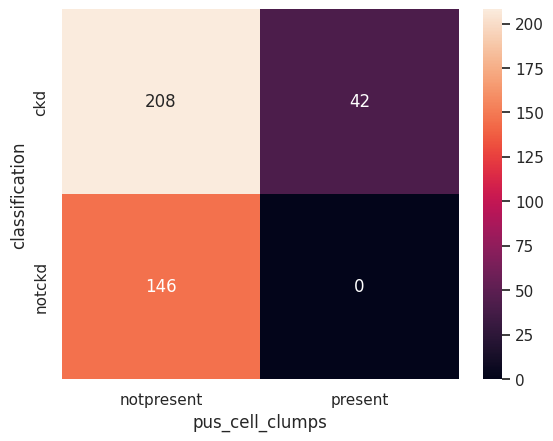

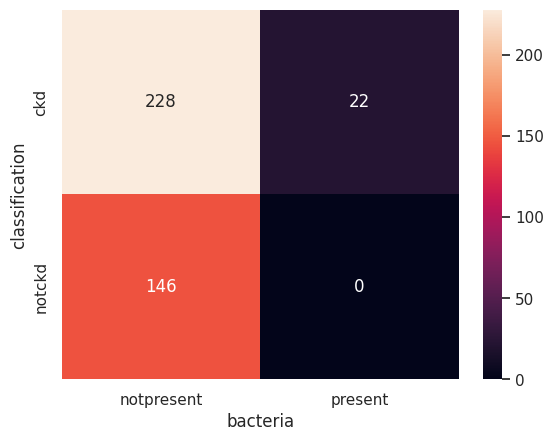

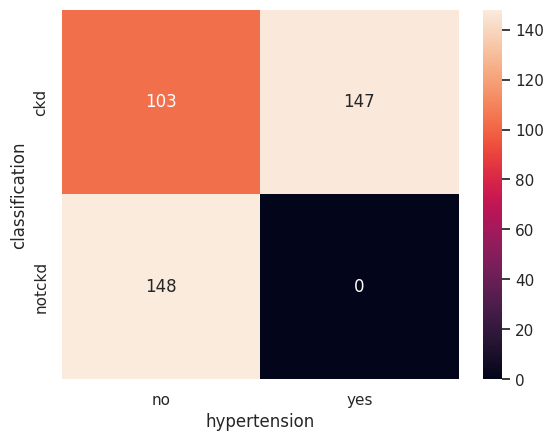

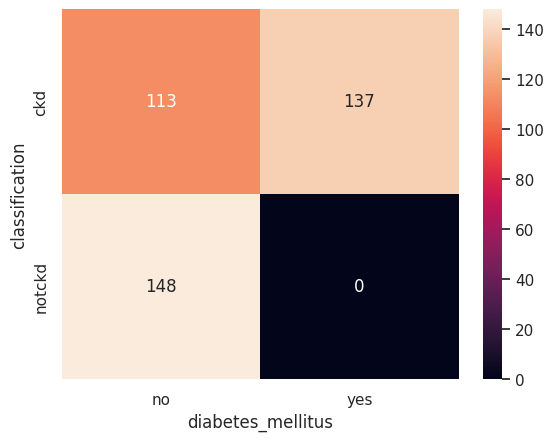

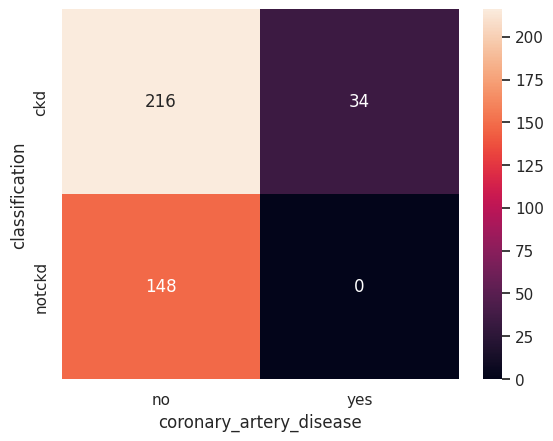

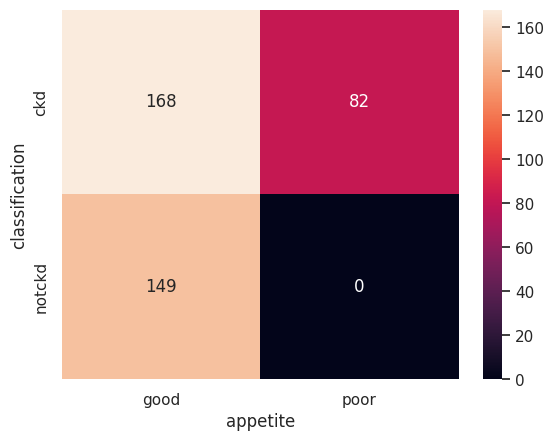

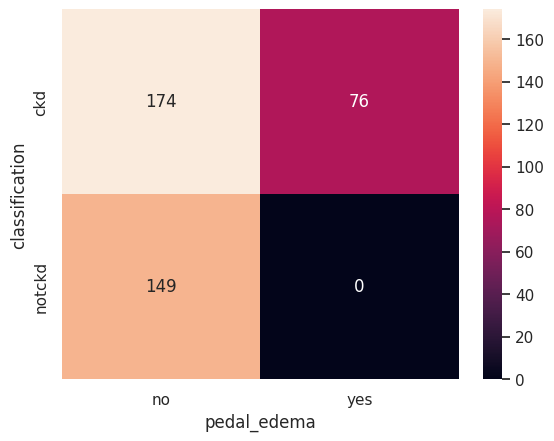

In [ ]:
# Relation Target / categoricals variables
for col in cat_cols[:9]:
    plt.figure()
    sns.heatmap(pd.crosstab(df['classification'], df[col]), annot=True, fmt='d')

In [ ]:
def plot_bar(df, feat_x, feat_y, normalize=True):
    """ Plot with vertical bars of the requested dataframe and features"""

    ct = pd.crosstab(df[feat_x], df[feat_y])
    if normalize == True:
        ct = ct.div(ct.sum(axis=1), axis=0)
    return ct.plot(kind='bar', stacked=True)

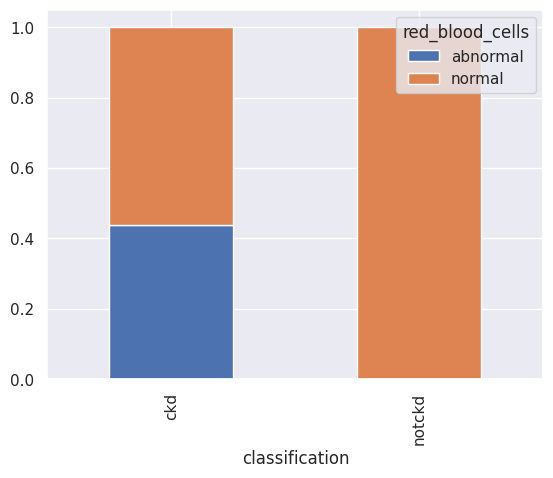

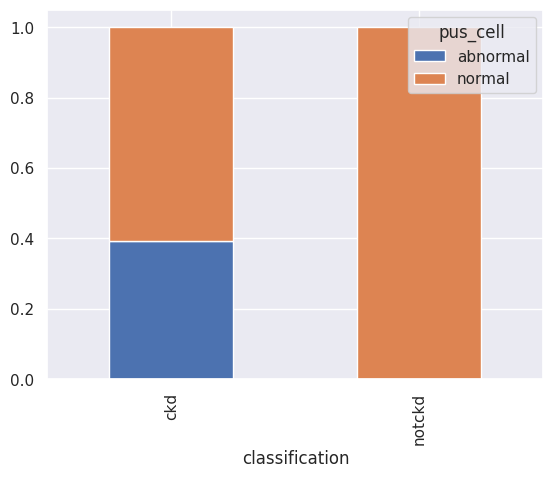

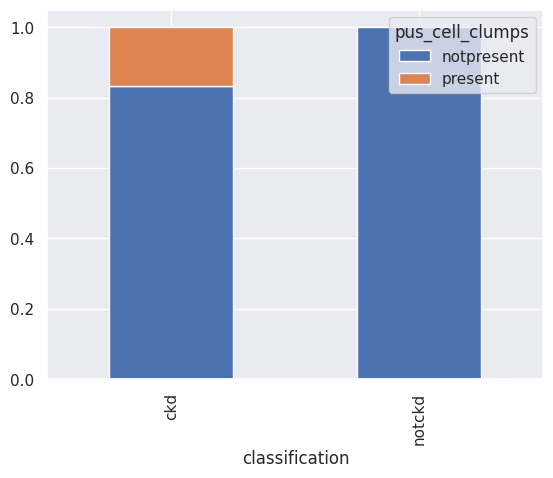

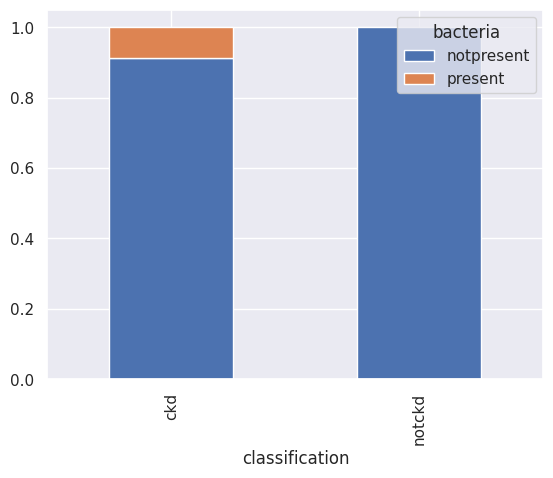

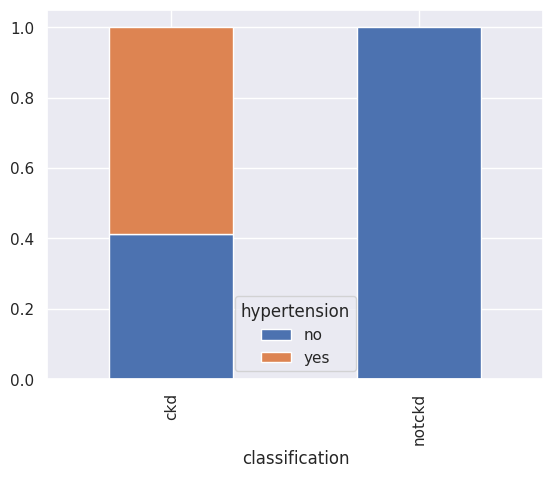

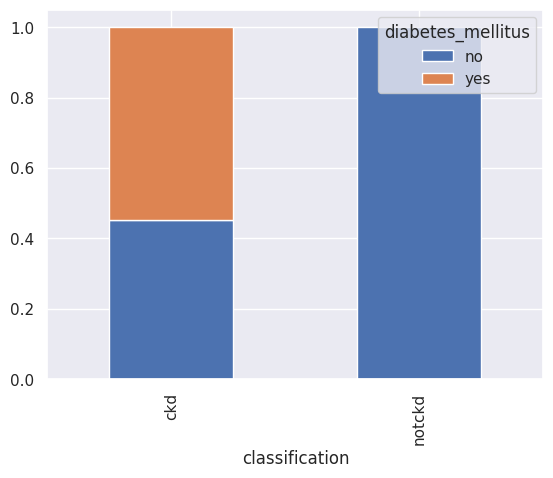

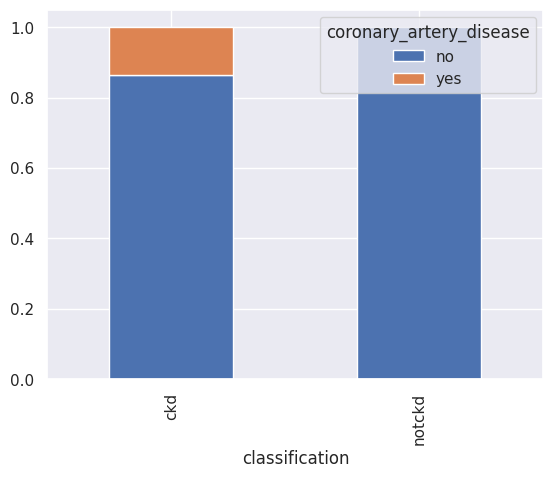

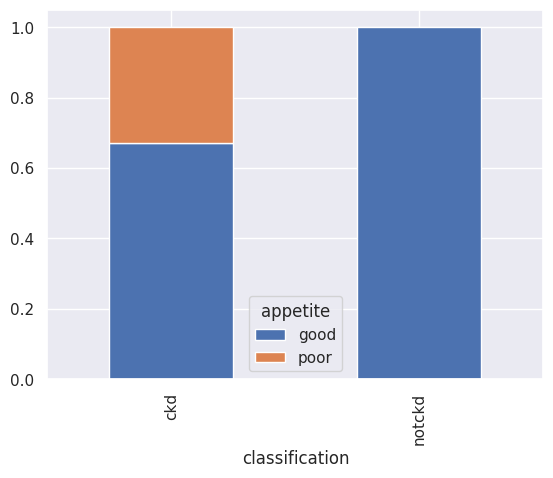

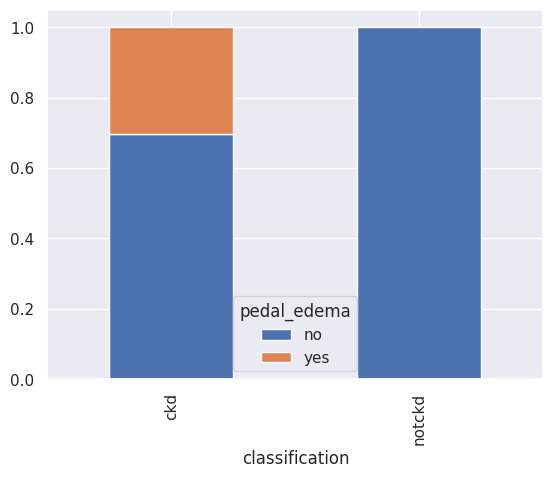

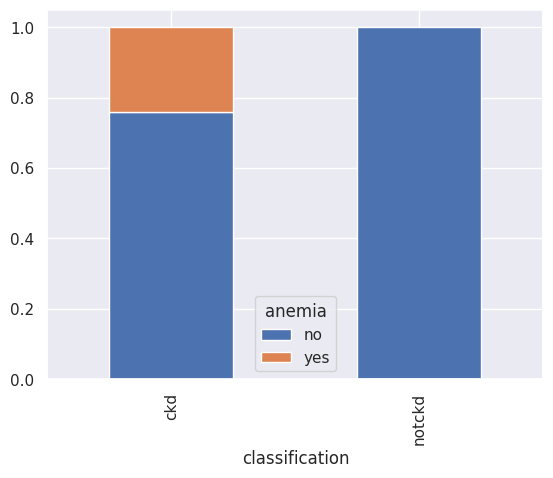

In [ ]:
ll= cat_cols[:]
ll.remove('classification')
for c in ll:
  plot_bar(df,'classification', c )
  plt.show()


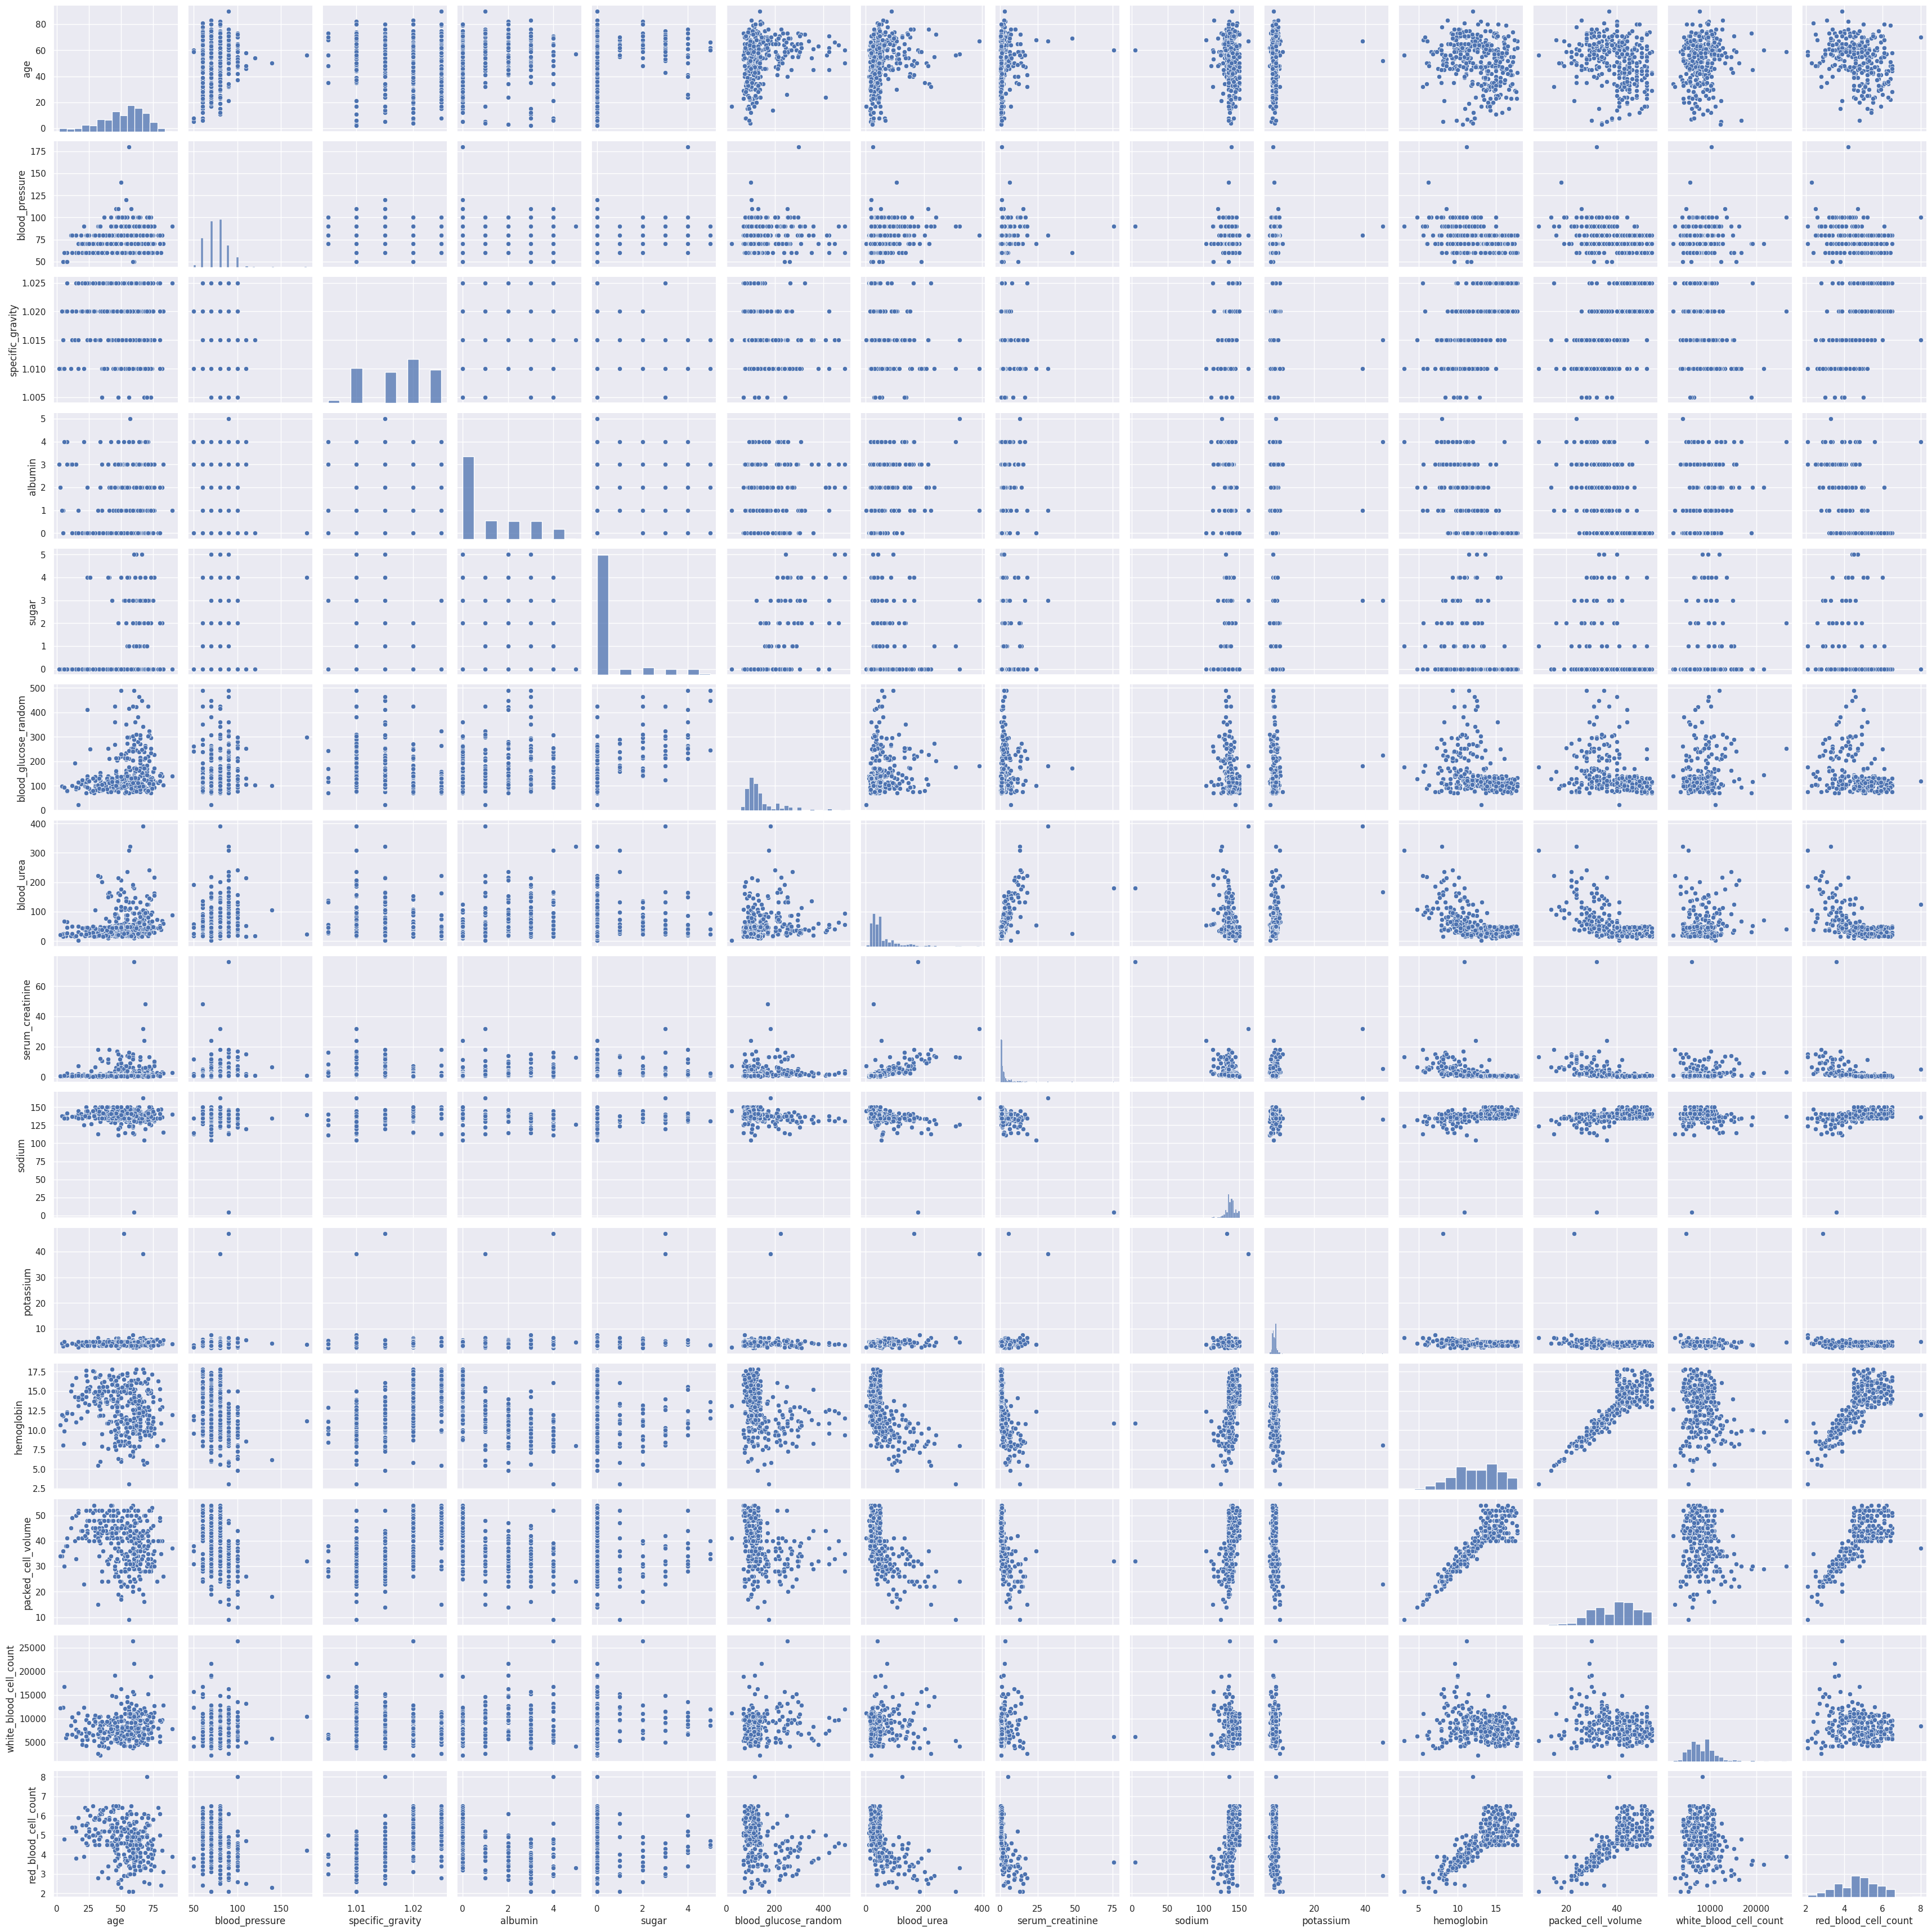

In [ ]:
#Relation Variables / Variables
sns.pairplot(df[num_cols])

<ipython-input-54-60aa61172406>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr(method='pearson')
<ipython-input-54-60aa61172406>:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(correlation, dtype=np.bool))


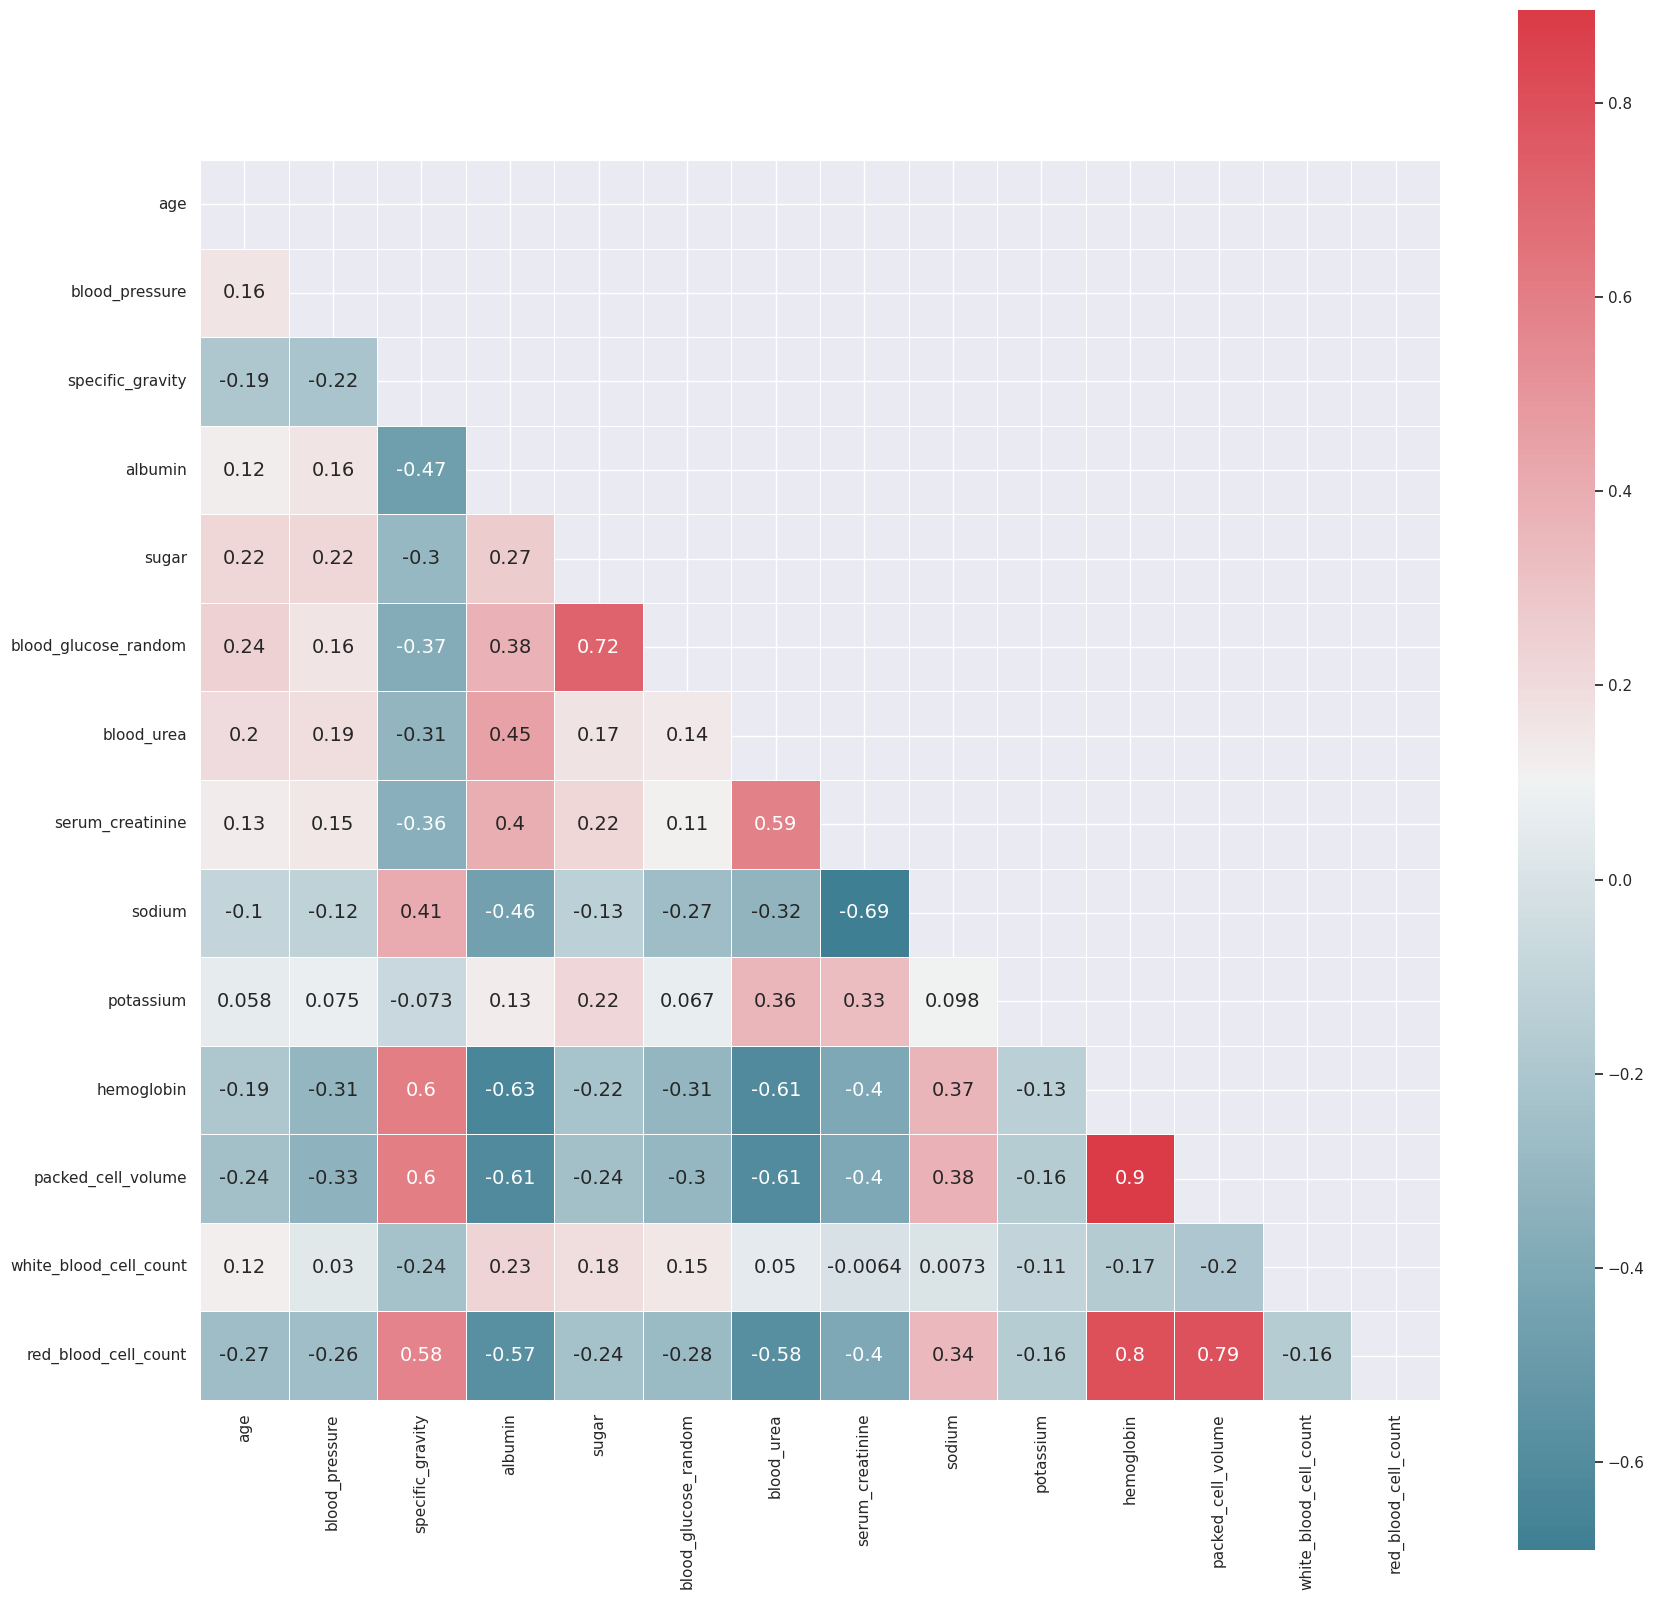

In [ ]:
#Multivariate Analysis - Correlation Between Numerical Features
# calculates the correlations
correlation = df.corr(method='pearson')

# uses the variable ax for single a Axes
fig, ax = plt.subplots()

# sets the figure size in inches
ax.figure.set_size_inches(20, 20)

# generates a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=np.bool))

# generates a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# plots the heatmap
sns.heatmap(correlation, cmap=cmap, mask=mask, square=True, linewidths=.5,
            annot=True, annot_kws={'size':14})

# displays the plot
plt.show()

## PRE-PROCESSING

In [33]:
trainset, testset = train_test_split(df, test_size=0.25, random_state=0)

In [34]:
trainset['classification'].value_counts()

ckd       188
notckd    112
Name: classification, dtype: int64

In [ ]:
testset['classification'].value_counts()

ckd       62
notckd    38
Name: classification, dtype: int64

In [35]:
# Convert nominal values to binary values
#df.replace("?", np.NaN, inplace=True)
def encodage(df):
  conv_value = {"red_blood_cells": {"normal": 1, "abnormal": 0},
                "pus_cell": {"normal": 1, "abnormal": 0},
                "pus_cell_clumps": {"present": 1, "notpresent": 0},
                "bacteria": {"present": 1, "notpresent": 0},
                "hypertension": {"yes": 1, "no": 0},
                "diabetes_mellitus": {"yes": 1, "no": 0},
                "coronary_artery_disease": {"yes": 1, "no": 0},
                "appetite": {"good": 1, "poor": 0},
                "pedal_edema": {"yes": 1, "no": 0},
                "anemia": {"yes": 1, "no": 0},
                "classification": {"ckd": 1, "notckd": 0}}
  df.replace(conv_value, inplace=True)
  return df



In [36]:
def imputation(df):
  numerical_imputation = SimpleImputer(strategy='mean')
  categorical_imputation = SimpleImputer(strategy='most_frequent')
  df[num_cols] =numerical_imputation.fit_transform(df[num_cols])
  df[cat_cols] =categorical_imputation.fit_transform(df[cat_cols])
  return  df

In [37]:
def normalisation(df):
  scaler = StandardScaler()
  df[num_cols] = scaler.fit_transform(df[num_cols])
  return df

In [38]:
def preprocessing(df):
  df = encodage(df)
  df = imputation(df)
  df = normalisation(df)
  X = df.drop('classification', axis=1)
  y = df['classification']
  print(y.value_counts())
  return X, y


In [39]:
X_train, y_train = preprocessing(trainset)

1.0    188
0.0    112
Name: classification, dtype: int64


In [40]:
X_test, y_test = preprocessing(testset)

1.0    62
0.0    38
Name: classification, dtype: int64


###  3.Apply logistic regression, and print the confusion matrix to validate your model.

In [41]:
logistic_regression = LogisticRegression()
param_grid = {'C': [0.1, 1, 10, 100],
              'max_iter': [100, 500, 1000],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'solver': ['lbfgs', 'liblinear', 'sag', 'saga']}
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
t0 = time.time()
grid_search.fit(X_train, y_train)
log_reg_fit = time.time() - t0





/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [42]:
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(" complexity and bandwidth selected and model fitted in %.3f s" % log_reg_fit)
print(grid_search.best_estimator_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy for our training dataset with tuning is : 99.00%
 complexity and bandwidth selected and model fitted in 12.773 s
LogisticRegression(C=1)


In [43]:
#features extraction
#logreg = LogisticRegression(C= 1, max_iter= 100, penalty= 'l2', solver= 'lbfgs')   #build our logistic model
logreg = LogisticRegression(C=1)
logreg.fit(X_train, y_train)  #fitting training data
y_pred  = logreg.predict(X_test)    #testing model’s performance


<Axes: xlabel='Predicted', ylabel='Actual'>

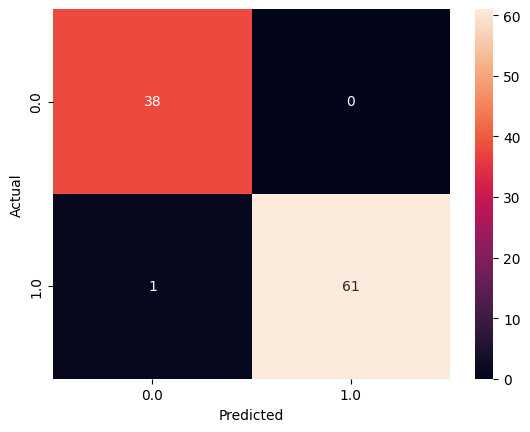

In [44]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### 4.  Apply KNN and choose the optimal number of neighbors

In [45]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

t0 = time.time()
grid.fit(X_train,y_train)
knn_fit = time.time() - t0

print(grid.best_params_)
accuracy = grid.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(" complexity and bandwidth selected and model fitted in %.3f s" % knn_fit)
print(grid.best_estimator_)


{'n_neighbors': 5, 'weights': 'uniform'}
Accuracy for our training dataset with tuning is : 97.33%
 complexity and bandwidth selected and model fitted in 6.183 s
KNeighborsClassifier()


In [48]:
#knn=KNeighborsClassifier(n_neighbors=5,weights= "uniform") #build our knn classifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train) #Training KNN classifier
y_pred=knn.predict(X_test)  #Testing
#print('Acuuracy=',accuracy(y_pred,y_test))

<Axes: xlabel='Predicted', ylabel='Actual'>

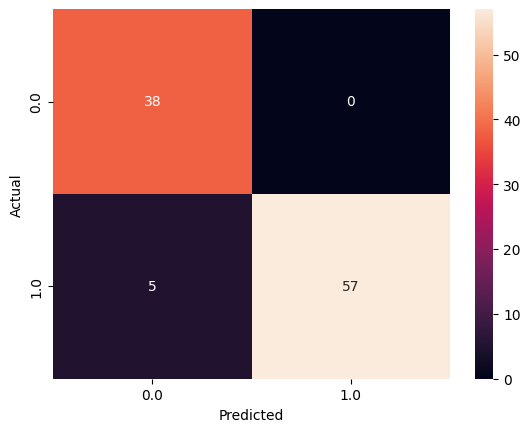

In [49]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### 5. Apply decision tree, plot it and calculate the accuracy.

In [51]:
model = DecisionTreeClassifier()
parameters = {'splitter' : ['best', 'random'],
'criterion' : ['gini', 'entropy'],
'max_features': ['log2', 'sqrt','auto'],
'max_depth': [2, 3, 5, 10, 17],
'min_samples_split': [2, 3, 5, 7, 9],
'min_samples_leaf': [1,5,8,11],
'random_state' : [0,1,2,3,4,5]
}

grid_search_dt = GridSearchCV(estimator = model,param_grid = parameters,scoring = 'accuracy',cv = 5,verbose = 1)
t0 = time.time()
grid_search_dt.fit(X_train, y_train)
dt_fit = time.time() - t0



Fitting 5 folds for each of 7200 candidates, totalling 36000 fits


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

In [52]:
print(grid_search_dt.best_params_)
accuracy = grid_search_dt.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(" complexity and bandwidth selected and model fitted in %.3f s" % dt_fit)
print(grid_search_dt.best_estimator_)

{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0, 'splitter': 'best'}
Accuracy for our training dataset with tuning is : 98.33%
 complexity and bandwidth selected and model fitted in 209.187 s
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       random_state=0)


In [53]:
#applying tree algorithm
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2', random_state=0)
tree.fit(X_train, y_train)   #fitting our model
y_pred=tree.predict(X_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.98


<Axes: xlabel='Predicted', ylabel='Actual'>

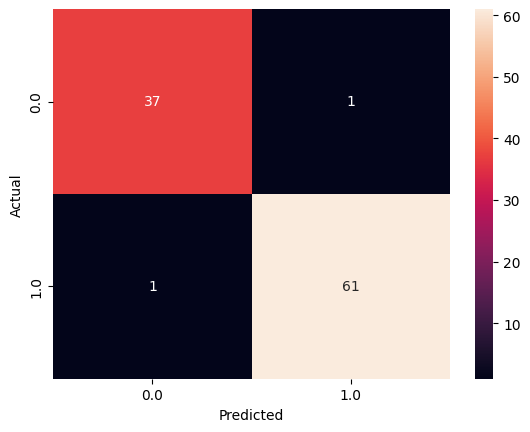

In [54]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

### 6. Apply random forest, calculate the new accuracy and compare it with the previous result.

In [55]:
rf=RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [10, 20, 50, 100,200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : list(range(4, 15)),
    'criterion' :['gini', 'entropy'],
}
Grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
t0 = time.time()
Grid_rf.fit(X_train, y_train)
rf_fit = time.time() - t0

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

In [ ]:
print(Grid_rf.best_params_)
accuracy = Grid_rf.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )
print(" complexity and bandwidth selected and model fitted in %.3f s" % rf_fit)
print(Grid_rf.best_estimator_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 10}
Accuracy for our training dataset with tuning is : 99.33%
RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=10,
                       random_state=42)


In [ ]:
clf=RandomForestClassifier(max_depth=8, max_features='auto', n_estimators=10,random_state=42)
clf.fit(X_train, y_train)  #Training our model
y_pred=clf.predict(X_test)  #testing our model
print("Accuracy:",accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


<Axes: xlabel='Predicted', ylabel='Actual'>

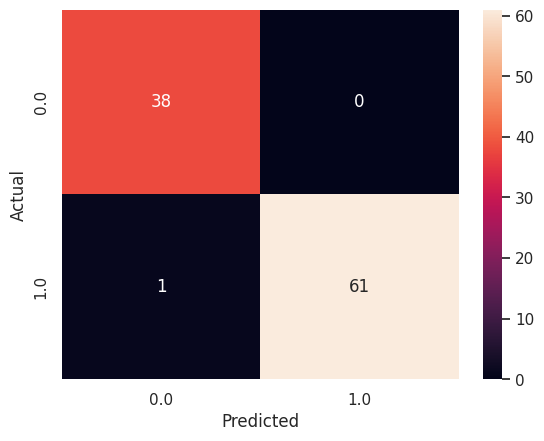

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#  Part2: unsupervised learning

## 1. Drop out the target variable (named “classification”)

In [58]:
df2=X_train

## 2. Use hierarchical clustering to identify the inherent groupings within your data.

In [68]:
df2.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia'],
      dtype='object')

In [90]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df2)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



 ## 3.Plot the clusters.

In [91]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

0
0    0
1    0
2    0
3    0
4    0
..  ..
295  0
296  0
297  0
298  0
299  0

[300 rows x 1 columns]

## 4. Plot the dendrogram

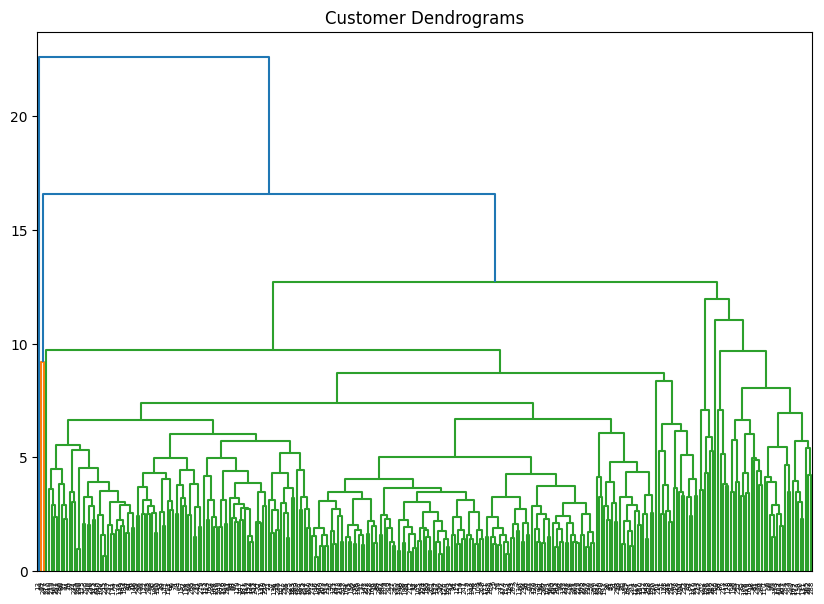

In [92]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df2, method="complete"))

In [75]:
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(df2)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

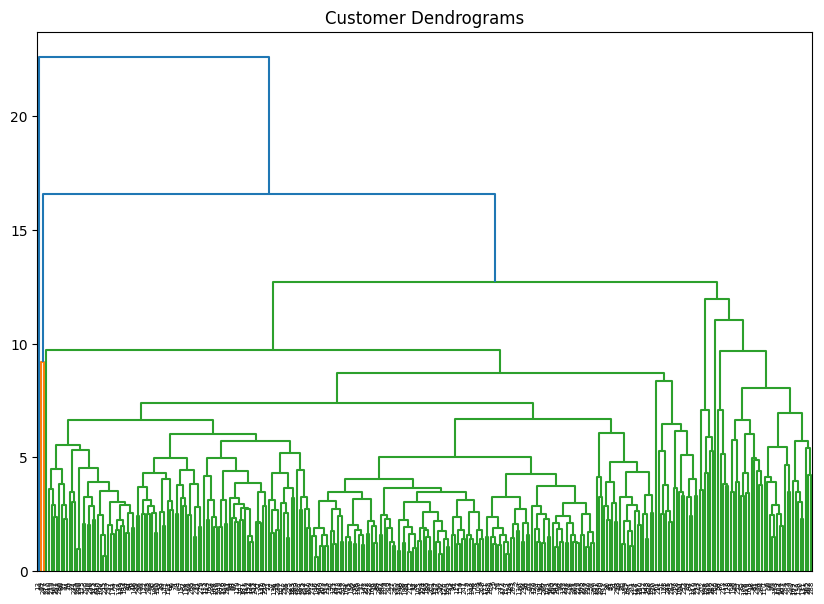

In [77]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(df2, method="complete"))

## - Use k-means clustering and select the optimal k.

In [93]:

#creating list for scoring
avg_withinSS = []
number_of_cluster = np.arange(2,25) # Number of Clusters
#create loop to run the algorithm
for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state = 2022)
    kmeans.fit(df2)
    centroids = kmeans.cluster_centers_

    D_k = cdist(df2, centroids, 'euclidean')
    cIdx = np.argmin(D_k, axis=1)
    dist = np.min(D_k, axis=1)
    avg_withinSS.append(sum(dist)/df2.shape[0])

#creating plot for elbow method visualization
fig = px.line(x=number_of_cluster, y=avg_withinSS, markers=True)
fig.update_xaxes(title_text='Number of Clusters')
fig.update_yaxes(title_text='Average Within Sum of Square')
fig.update_layout(width=900)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang